# Test 

## Notation: 

The telescoping term is denoted as 
$\Xi^{l,p}_t=\cases{\theta_t^{l,p}& for $l=l_0$ and $p=p_0$\\
\left[\theta_t^{l,p}-\theta_t^{l-1,p}\right]& for $l>l_0$ and $p=p_0$\\
\left[\theta_t^{l,p}-\theta_t^{l,p-1}\right]& for $l=l_0$ and $p>p_0$\\
\left[\left[\theta_t^{l,p}-\theta_t^{l-1,p}\right]-\left[\theta_t^{l,p-1}-\theta_t^{l-1,p-1}\right]\right]& for $(l,p)$ in $\{l_0,l_0+1,\cdots,l_{max}\}\times \{p_0,p_0+1,\cdots,p_{max}\}$},$
for $t\in \mathbb{N}$.


The number of SGD steps labeled by $p$ is $S_p=S_0 2^p$. The probability distributions are $\mathbb{P}_P(p)\propto \log(p+1)^2(p+1)S_p^{-1/2}$, and $\mathbb{P}_L(l)\propto \log(l+1)^2(l+1)\Delta_l^{\beta}$ for $p>p_0$ and $l>l_0$, where $\beta$ takes the values $\{1,1/2\}$ depending on whether we use a constant diffusion function or not. 



### Error of the Unbiased estimator
The general error of the unbiased estimator is $\text{MSE}=\sum_{l,p=l_0,0}\frac{1}{\mathbb{P}_L(l)\mathbb{P}_P(p)}\mathbb{E}((\Xi_t^{l,p})^2)$. For the special cases $p=0, l>l_0$ we assume the following relation  $\mathbb{E}((\Xi_t^{l,0})^2)\leq C_L \Delta_l^\beta$. Similarly we assume $\mathbb{E}((\Xi_t^{0,p})^2)\leq C_P N_p^{-1/2}$ for $l=0, p>0$.

### Specific choice of probability functions:
The methodology I'll be using here for the choice of probability distribution (of the randomization of the unbiased estimators) is considering the probabilities for the different discretizations independently. For the discretization in time we have a MSE of(assuming the truncation is good enough so that the estimator is virtually unbiased)
$\text{MSE}_{p=0}=\sum_{l=l_0}^{l{max}}\frac{1}{\mathbb{P}_L(l)}\mathbb{E}((\Xi_t^{l,0})^2)=\sum_{l=l_0+1}^{l{max}}\frac{C_L\Delta_l^\beta}{P_L(l)}+C_{L0}/\mathbb{P}_L(l0)$
with 
$\mathbb{P}_L(l)=\cases{P_{L0} & if $l=l_0$\\
P_L(q+l-l_0) \log(q+l-l_0)^2 \Delta_l^\beta & if $l>l_0$}$ such that $l_0\geq 0$. The normalization of the pdf gives 
$P_{L0}=1-P_L \sum_{l=l_0+1}^{lmax}(q+l-l_0)\log (q+l-l_0)^2 \Delta_l^\beta$ which along the condition $\frac{P_{L}}{P_{L0}}=\frac{C_L }{C_{L0}}\frac{1}{(q+1)\log(q+1)^2}$ outputs the solution 
$P_{L0}=\left(1+\frac{C_L \sum_{l=l_0+1}^{lmax}(q+l-l_0)\log (q+l-l_0)^2 \Delta_l^\beta }{C_{L0}(q+1)\log(q+1)^2}\right)^{-1}.$
Now for the SGD steps "discretization" we have an error $\text{MSE}_{l=l_0}=\sum_{p=0}^{p{max}}\frac{1}{\mathbb{P}_p(p)}\mathbb{E}((\Xi_t^{l_0,p})^2)=\sum_{p=1}^{p{max}}\frac{C_P S_p^{-\beta}}{P_p(p)}+C_{P0}/\mathbb{P}_P(0)$, where $S_p=s_0 2^{p}$, 
$\mathbb{P}_P(p)=\cases{P_{P0} & if $p=0$\\
P_P(p+q) \log(p+q)^2 S_p^{-\beta} & if $p>0$}$, $q>0$. The normalization of the pdf gives 
$P_{P0}=1-P_P \sum_{p =1}^{pmax}(p+q)\log (p+q)^2 S_p^{-\beta}$ which along the condition $\frac{P_{P}}{P_{P0}}=\frac{C_P}{C_{P0}}\frac{ 1}{(q+1)\log(q+1)^2}$ outputs the solution 
$P_{P0}=\left(1+\frac{C_P}{C_{P0}}\frac{ \sum_{p=1}^{pmax}(p+q)\log (p+q)^2 S_p^{-\beta} }{(q+1)\log(q+1)^2}\right)^{-1}.$



This notebook is created to showcase the most important results of the test, describe the experiments and compare to the theoretical results (some of them conjetured)

In [1]:
import sys
sys.path.insert(len(sys.path), '/Users/alvarem/Google Drive/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge')
import PF_functions_def as pff
#from  import LDAPManager PF_functions_def as pff
import bridge as bdg
import multiprocessing
import time
import math
import numpy as np
import matplotlib.pyplot as plt 
#import progressbar
from scipy import linalg as la
from scipy.sparse import identity
from scipy.sparse import rand
from scipy.sparse import diags
from scipy.sparse import triu
import copy
#from sklearn.linear_model import LinearRegression
from scipy.stats import ortho_group
from scipy.stats import multivariate_normal
import seaborn as sns
import pandas as pd

# OU process

The first part of this document is dedicated to the testing of the Unbiased estimator for a Ornstein-Uhlenbeck process hidden model. The test include but are not limited to: 
- The evaluation of the smoothing distribution.
- The score function.
- The filtering distribution.
- Comparison of the smoothing distribution of the Girsanov approach (vanilla) and backward approach.
- Coupling of the conditional particle filters.
- Computation of the hyperparameters for the Unbiased estimators

### Coupling of the conditional Particle filter using diffusion bridges

In the following we have the construction of the hidden realization of the diffusion, observations and setting of the parameters 

[ 1.82404509 -1.50391304 -0.85978712 -2.89614741 -1.88324856]


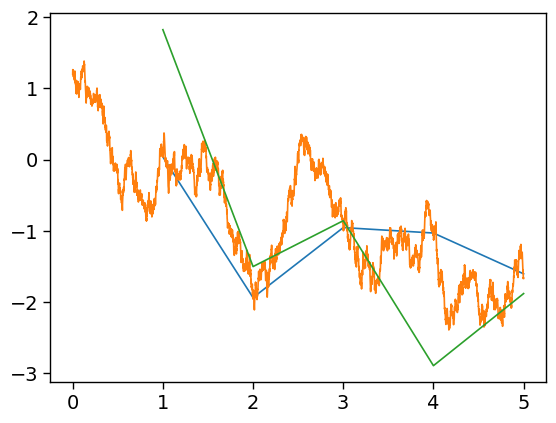

In [308]:
x0_sca=1.2
x0=x0_sca
l=10
T=5
t0=0
l_d=0
d=2**(l_d)
theta_true=-0.3
sigma_true=1.2
np.random.seed(7)
collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
resamp_coef=1
l_max=10
x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
times=np.array(range(t0,int(T/d)+1))*d
l_times=np.arange(t0,T,2**(-l))
l_max_times=np.arange(t0,T,2**(-l_max))
plt.plot(times[1:],x_reg,label="True signal")
plt.plot(l_max_times,x_true[:-1],label="True complete signal")
sd_true=1
np.random.seed(3)
d_times=np.array(range(t0+d,int(T/d)+1))*d
obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
plt.plot(d_times, obs,label="Observations")
print(obs)

In the following we have a the sampling of several coupled particle filters depending on the level $l$ (from $l0$ to L_max), number of particles $N$, number of MCMC samples $B$ and number of samples $samples$.

In [313]:
theta=theta_true
sigma=sigma_true
theta_aux=theta+0.2
sigma_aux=sigma
sd=sd_true
start=time.time()
B=500
#B=5
samples=5
# interactive 1 samples=100
N=50
x0=x0_sca+np.zeros(N)
seed=2
l0=2
L_max=8
#L_max=3
eLes=np.array(range(l0,L_max+1))
mcmc_mean=np.zeros((len(eLes),samples,2,int(T/d)))
pf_diffs=np.zeros((len(eLes),samples,int(T/d)))
pf_l=np.zeros((len(eLes),samples,2,int(T/d)))
ori_pf_l=np.zeros((len(eLes),samples,int(T/d)))
resamp_coef=1
for k in range(len(eLes)):
    l=eLes[k] 
    for i in range(samples):
        np.random.seed(i+10000)
        #print("Seed feeded to PF_bridge is: ",seed)
        [log_weights,int_Gs,x_pr]=bdg.PF_bridge(t0,x0,T,bdg.b_ou_1d,theta,bdg.Sig_ou_1d,sigma,bdg.b_ou_aux,theta_aux,\
        bdg.Sig_ou_aux,sigma_aux,bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_aux,sigma_aux]],bdg.H_quasi_normal,\
        [bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],bdg.sampling_ou, [theta_aux,sigma_aux],obs,bdg.log_g_normal_den,sd,\
        bdg.ou_trans_den,[theta_aux,sigma_aux],bdg.ou_trans_den,resamp_coef,l,d, N,seed)
        #x_mean=np.sum(pff.norm_logweights(log_weights,ax=1)*x_pr,axis=-1)
        weights=pff.norm_logweights(log_weights[-1,:])
        #ori_pf_l[k,i]=np.sum(((pff.norm_logweights(log_weights,ax=1))*x_pr),axis=1)
        ori_pf_l[k,i]=np.mean((x_pr),axis=1)
        #print(weights.shape)
        index=np.random.choice(np.array(range(N)))
        cond_path=x_pr[:,index]
        cond_path_0=cond_path
        cond_path_1=cond_path
        cond_log_weights=log_weights[:,index]
        cond_int_G=int_Gs[:,index]
        seeds_cond=np.zeros((int(T/d),2),dtype=int)
        seeds_cond[:,0]=seed+np.array(range(int(T/d)))*int(int(2**l*d-1))
        seeds_cond[:,1]=index*np.ones(int(T/d))
        seeds_cond_0=seeds_cond
        seeds_cond_1=seeds_cond

        ch_paths=np.zeros((B,2,int(T/d)))
        comp_pf_diffs=np.zeros((B,int(T/d)))
        comp_pf_l=np.zeros((B,2,int(T/d)))
        ch_weights=np.zeros((B,2,int(T/d)))

        ch_whole_paths=np.zeros((B,2,int(T/d)))
        ch_whole_weights=np.zeros((B,2,int(T/d)))

        seed+=(int(T/d))*int(int(2**l*d-1))
        cond_whole_path=cond_path
        cond_whole_log_weights=cond_log_weights
        for b in range(B):
            print("The sample is: ",i," The batch is: ",b)
            print("The level is: ",l)
            """
            C_Cond_PF_bridge_back_samp(x_cond_0,x_cond_1,\
            seeds_cond_0,seeds_cond_1,t0,x0,T,b,A_0,A_1,Sig,fi_0,fi_1,b_til,A_til_0,A_til_1,Sig_til,fi_til_0,\
            fi_til_1,r,r_pars_0,r_pars_1,H,H_pars_0,H_pars_1,sample_funct,sample_pars,obs,\
            log_g_den,g_den_par_0,g_den_par_1, aux_trans_den,atdp_0,atdp_1,\
            prop_trans_den, ind_prop_trans_par_0,ind_prop_trans_par_1, l, d,N,seed,crossed=False):
            """
            #[log_weights_0,log_weights_1,x_pr_0,x_pr_1,new_lw_cond_0,new_lw_cond_1\
            #,new_int_G_cond_0,new_int_G_cond_1,new_x_cond_0,new_x_cond_1,new_seeds_cond_0 ,new_seeds_cond_1]
            # The first 4 argument of the C_cond_pf... function are irrelevant, they are a 
            # vestige of the previous version of the function.
            [log_weights_0,log_weights_1,x_pr_0,x_pr_1,cond_log_weights_0,cond_log_weights_1,\
            cond_int_G_0,cond_int_G_1,cond_path_0,cond_path_1,seeds_cond_0,seeds_cond_1]=\
            bdg.C_Cond_PF_bridge_back_samp(\
            cond_path_0,cond_path_1,seeds_cond_0,seeds_cond_1,t0,x0,\
            T,bdg.b_ou_1d,theta,theta,bdg.Sig_ou_1d,sigma,sigma,bdg.b_ou_aux,theta_aux,theta_aux,\
            bdg.Sig_ou_aux,sigma_aux,sigma_aux,bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_aux,sigma_aux]],\
            [bdg.ou_sd,[theta_aux,sigma_aux]],bdg.H_quasi_normal,\
            [bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],[bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],\
            bdg.rej_max_coup_ou, [theta_aux,sigma_aux,theta_aux,sigma_aux],obs,bdg.log_g_normal_den,sd,sd,\
            bdg.ou_trans_den,[theta_aux,sigma_aux],[theta_aux,sigma_aux],bdg.ou_trans_den,\
            [theta_aux,sigma_aux],[theta_aux,sigma_aux],l,d, N,seed,crossed=False)

            seed+=int((int(T/d))*int(int(2**l*d-1)))
            ch_paths[b]=[cond_path_0,cond_path_1]
            comp_pf_diffs[b]=np.sum((x_pr_0*pff.norm_logweights(log_weights_0,ax=1)\
            -x_pr_1*pff.norm_logweights(log_weights_1,ax=1)),axis=1)
            #comp_pf_diffs[b]=np.mean((x_pr_0\
            #-x_pr_1)**2,axis=1)
            comp_pf_l[b,1]=np.sum((pff.norm_logweights(log_weights_1,ax=1)*x_pr_1),axis=1)
            comp_pf_l[b,0]=np.sum((pff.norm_logweights(log_weights_0,ax=1)*x_pr_0),axis=1)           
    
        mcmc_mean[k,i]=np.mean(ch_paths,axis=0)
        pf_diffs[k,i]=np.mean(comp_pf_diffs**2,axis=0)
        pf_l[k,i]=np.mean(comp_pf_l,axis=0)
    #mcmc_mean[i,1]=np.mean(ch_whole_paths,axis=0)
end=time.time()
print(end-start)

The sample is:  0  The batch is:  0
The level is:  2
The sample is:  0  The batch is:  1
The level is:  2
The sample is:  0  The batch is:  2
The level is:  2
The sample is:  0  The batch is:  3
The level is:  2
The sample is:  0  The batch is:  4
The level is:  2
The sample is:  0  The batch is:  5
The level is:  2
The sample is:  0  The batch is:  6
The level is:  2
The sample is:  0  The batch is:  7
The level is:  2
The sample is:  0  The batch is:  8
The level is:  2
The sample is:  0  The batch is:  9
The level is:  2
The sample is:  0  The batch is:  10
The level is:  2
The sample is:  0  The batch is:  11
The level is:  2
The sample is:  0  The batch is:  12
The level is:  2
The sample is:  0  The batch is:  13
The level is:  2
The sample is:  0  The batch is:  14
The level is:  2
The sample is:  0  The batch is:  15
The level is:  2
The sample is:  0  The batch is:  16
The level is:  2
The sample is:  0  The batch is:  17
The level is:  2
The sample is:  0  The batch is:  18
T

Now we compute the $\textbf{Kalman filter}$ (it's valid to compute the KF here since we are using Gaussian observations and a OU process hich is also Gaussian), the $\textbf{Kalman smoother}$ and the $\textbf{ gradient}$ of the log likelihood. Additionally we compute the smoother we obtain using Particle Gibbs. Note that to get a good approximation of the smoother we either need a large number $B$ or $samples$.

-0.3 1.2 1
[0 1 2 3 4 5] (7, 5, 2, 5)
[ 1.82404509 -1.50391304 -0.85978712 -2.89614741 -1.88324856]


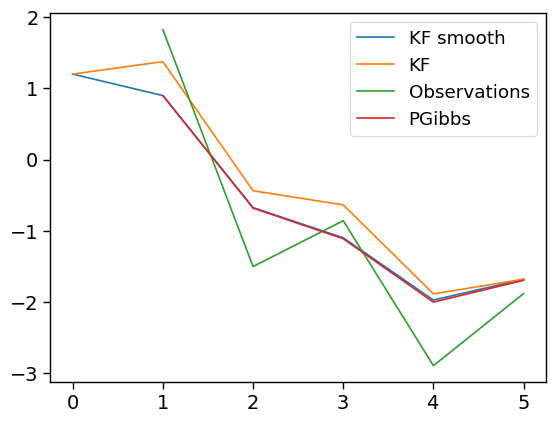

In [314]:
dim=1
dim_o=1
x0=np.zeros(N)+x0
print(theta, sigma,sd)
K=np.array([[np.exp(d*theta)]])
G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
H=np.array([[1]])
D=np.array([[sd]])
#print(K,G**2,H,D)
Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
Grad_R=np.zeros((3,1,1),dtype=float)
Grad_R[0,0,0]=Grad_R_theta
Grad_R[1,0,0]=Grad_R_sigma_s
Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
#print(Grad_K,Grad_R,Grad_S)
x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
#KF(xin,dim,dim_o,K,G,H,D,obs)
x_kf_2=bdg.KF(x0[0],dim,dim_o,K,G,H,D,obs)[0]
Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
d_times=np.array(range(t0,int(T/d)+1))*d
#weights=pff.norm_logweights(lws,ax=2)
#PF_mean=np.mean(np.sum(x_prs*weights,axis=-1),axis=0)
l=L_max
l_times=np.arange(t0,T,2**(-l))
l_max_times=np.arange(t0,T,2**(-l_max))
#print(times, l_times)
x_mean=np.mean(mcmc_mean,axis=1)[-1,1]
#print(x_mean.shape)
#plt.plot(d_times[1:],PF_mean,label="PF")
#plt.plot(d_times[1:],x_reg,label="True signal")
#plt.plot(l_max_times,x_true[:-1],label="True complete signal")
plt.plot(d_times,x_kf_smooth[:,0],label="KF smooth")
plt.plot(d_times,x_kf[:,0],label="KF")
plt.plot(d_times[1:], obs,label="Observations")
print(d_times, mcmc_mean.shape)
plt.plot(d_times[1:], x_mean.T,label="PGibbs")
print(obs)
plt.legend()    

Now we compara the different computations of the bias and their confidence intervals.

(7, 5, 2, 5)
[[ 1.37039826 -0.45702816 -0.64544197 -1.88787369 -1.67949695]
 [ 1.36949809 -0.45582989 -0.64487053 -1.88625356 -1.67798855]]
[[ 1.2       ]
 [ 1.37511104]
 [-0.43869522]
 [-0.63694889]
 [-1.8872836 ]
 [-1.68139308]]


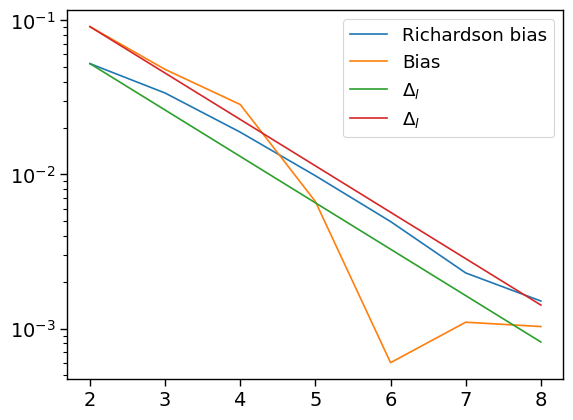

In [315]:
print(pf_l.shape)
i=3
print((np.mean(pf_l,axis=1)[-1]))
r_bias_eles=np.abs(np.mean(pf_l[:,:,0]-pf_l[:,:,1],axis=1))[:,-1]
bias_eles=np.abs(np.mean(pf_l[:,:,1],axis=1)[:,i]-x_kf[i+1,0])
bias_eles_2=np.abs(np.mean(pf_l[:,:,1],axis=1)[:,i]-x_kf_2[i+1,0])
var_eles=np.var(pf_l[:,:,1]-x_kf[1:,0],axis=1)[:,i]
bias_eles_up=bias_eles+np.sqrt(var_eles)*1.96/np.sqrt(samples)
bias_eles_lb=bias_eles-np.sqrt(var_eles)*1.96/np.sqrt(samples)
ori_bias_eles=np.abs(np.mean(ori_pf_l[:,:],axis=1)[:,i]-x_kf[i+1,0])
var_ori_bias_eles=np.var(ori_pf_l[:,:]-x_kf[1:,0],axis=1)[:,i]
ori_bias_eles_up=ori_bias_eles+np.sqrt(var_ori_bias_eles)*1.96/np.sqrt(samples)
ori_bias_eles_lb=ori_bias_eles-np.sqrt(var_ori_bias_eles)*1.96/np.sqrt(samples)
#plt.plot(eLes, ori_bias_eles_up)
#plt.plot(eLes,ori_bias_eles_lb)
#print(bias_eles_lb)
#plt.plot(eLes,ori_bias_eles,label="Original PF bias")
#plt.plot(eLes,bias_eles_2,label="Second PF bias")
#plt.plot(eLes,bias_eles_up)
#plt.plot(eLes,bias_eles_lb)
plt.plot(eLes,r_bias_eles,label="Richardson bias")
print(x_kf)
plt.plot(eLes,bias_eles, label="Bias")
plt.plot(eLes,2**(eLes[0])/2**(eLes)*r_bias_eles[0],label="$\Delta_l$")
plt.plot(eLes,2**(eLes[0])/2**(eLes)*bias_eles[0],label="$\Delta_l$")
plt.yscale("log")
plt.legend()
#print(PF_mean-x_kf[1:,0])
# RESULTS OF THE TEST:
# The kalman filter coincides with the particle filter, at least visually. 

From the plots it is evident that both Richardson bias and the bias follow the rates $\Delta_l$.

In the following we check the second of the difference of the averages (in the Particle Gibbs chain sense) 
of the sampled paths

[0.92916946 0.91630564 0.90672854 0.9088217  0.9045641  0.89214013
 0.89834429]
0.8981667689666047


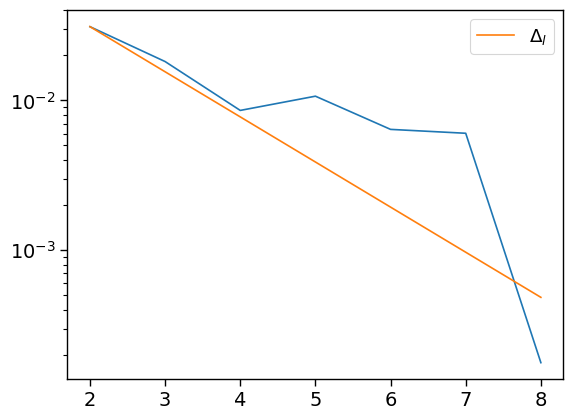

In [316]:

"""
error_wpf=np.mean(pf_diffs,axis=1)[:,-1] # wpf stands for whole particle filter(not just the chosen conditional sample)
error_wpf_sum=np.sum(np.mean(pf_diffs,axis=1),axis=-1)
plt.plot(eLes,error_wpf,label="Error_wpf")
plt.plot(eLes,error_wpf_sum,label="Error_wpf_sum")
plt.plot(eLes, 2**(eLes[0])/2**(eLes)*error_wpf[0],label="$\Delta_l$")
plt.plot(eLes, 2**(eLes[0])/2**(eLes)*error_wpf_sum[0],label="$\Delta_l$")
#plt.plot(eLes, 2**(eLes[0]/2)/2**(eLes/2)*error_wpf[0],label="$\Delta_l^{1/2}$")
#plt.plot(eLes, 2**(eLes[0]/2)/2**(eLes/2)*error_wpf_sum[0],label="$\Delta_l^{1/2}$")
"""
"""
error=np.mean((mcmc_mean[:,:,0,-1]-mcmc_mean[:,:,1,-1])**2,axis=1)
error_sum=np.sum(np.mean((mcmc_mean[:,:,0,:]-mcmc_mean[:,:,1,:])**2,axis=1),axis= -1)
plt.plot(eLes,error,label="Error")
var_error=np.var((mcmc_mean[:,:,0,-1]-mcmc_mean[:,:,1,-1])**2,axis=1)
var_error_sum=np.var(np.sum((mcmc_mean[:,:,0]-mcmc_mean[:,:,1])**2,axis=-1),axis=1)
error_up=error+np.sqrt(var_error)*1.96/np.sqrt(samples)  
error_lb=error-np.sqrt(var_error)*1.96/np.sqrt(samples)
error_sum_up=error_sum+np.sqrt(var_error_sum)*1.96/np.sqrt(samples)
error_sum_lb=error_sum-np.sqrt(var_error_sum)*1.96/np.sqrt(samples)
#MSE=np.mean((x_mean-x_kf[1:,0])**2,axis=1)[:,comp]
plt.plot(eLes, 2**(eLes[0])/2**(eLes)*error[0],label="$\Delta_l$")
plt.plot(eLes,error_sum,label="Error sum")
#plt.plot(eLes,error_up,label="Error up")
#plt.plot(eLes,error_sum_up,label="Error sum up")
#plt.plot(eLes,error_sum_lb,label="Error sum lb")
#plt.plot(eLes,error_lb,label="Error lb")
"""
"""
sm_r_bias=np.abs(np.mean((mcmc_mean[:,:,0,-1]-mcmc_mean[:,:,1,-1]),axis=1))
var_sm_r_bias=np.var((mcmc_mean[:,:,0,-1]-mcmc_mean[:,:,1,-1]),axis=1)
var_sm_r_bias=np.var(np.sum((mcmc_mean[:,:,0]-mcmc_mean[:,:,1]),axis=-1),axis=1)
sm_r_bias_up=sm_r_bias+np.sqrt(var_sm_r_bias)*1.96/np.sqrt(samples)  
sm_r_bias_lb=sm_r_bias-np.sqrt(var_sm_r_bias)*1.96/np.sqrt(samples)
plt.plot(eLes, 2**(eLes[0]/2)/2**(eLes/2)*sm_r_bias[0],label="$\Delta_l^{1/2}$")
plt.plot(eLes,sm_r_bias,label="sm_r_bias")
plt.plot(eLes,sm_r_bias_up,label="sm_r_bias ub")
plt.plot(eLes,sm_r_bias_lb,label="sm_r_bias lb")

"""
# mcmc_mean=np.zeros((len(eLes),samples,2,int(T/d)))
i=0
lev=1
bias=np.abs(np.mean((mcmc_mean[:,:,lev,i]),axis=1)-x_kf_smooth[i+1,0])
plt.plot(eLes,bias)
plt.plot(eLes, 2**(eLes[0])/2**(eLes)*bias[0],label="$\Delta_l$")
print(np.mean((mcmc_mean[:,:,1,i]),axis=1))
print(x_kf_smooth[i+1,0])
plt.yscale("log")
plt.legend()


The result indicates that both the sum of the errors and the error at the final time follow the rate $\Delta_l$, as expected.

### Comparison of the bias of the backward sampling vs vanilla sampling

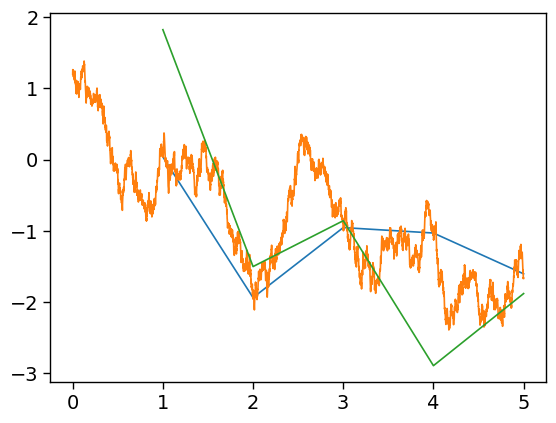

In [257]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=5
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    plt.plot(times[1:],x_reg,label="True signal")
    plt.plot(l_max_times,x_true[:-1],label="True complete signal")
    sd_true=1
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    plt.plot(d_times, obs,label="Observations")
    theta=theta_true
    sigma=sigma_true
    theta_aux=theta+0.2
    sigma_aux=sigma
    sd=sd_true
    fd=1e-4
    theta_fd=theta_true+fd*0.5
    sigma_fd=sigma_true+fd*0.5
    sigma_aux_fd=sigma_aux+fd*0.5
    start=time.time()
    B=500*15*3
    samples=30
    # interactive 1 samples=100
    N=50
    x0=x0_sca+np.zeros(N)
    l0=3
    L_max=9
    eLes=np.array(range(l0,L_max+1))

In the next line comment and uncomment depending on the desired file, Prl_Grad_chain_ch_paths_v13 correspond to the backward sampling while Prl_Grad_chain_new_ch_paths_v1 corersponds to the vanilla sampling.

In [258]:
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata"
ch_paths_file=np.reshape(np.loadtxt(path+"/Prl_Grad_chain_ch_paths_v5.txt",dtype=float),(len(eLes),samples,int(T/d))) 
Grads_file=np.reshape(np.loadtxt(path+"/Prl_Grad_chain_Grads_v5.txt",dtype=float),(len(eLes),samples,3))
#ch_paths_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observationsdata/Prl_Grad_chain_new_ch_paths_v1.txt",dtype=float),(len(eLes),samples,int(T/d))) 
#Grads_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observationsdata/Prl_Grad_chain_new_Grads_v1.txt",dtype=float),(len(eLes),samples,3))


[ 1.82404509 -1.50391304 -0.85978712 -2.89614741 -1.88324856]


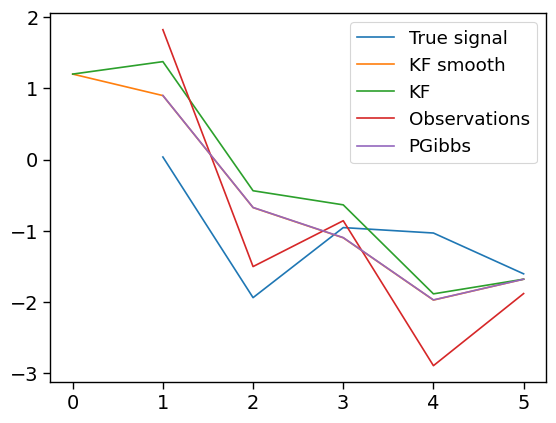

In [259]:
dim=1
dim_o=1
theta,sigma,sd=theta,sigma,sd
K=np.array([[np.exp(d*theta)]])
G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
H=np.array([[1]])
D=np.array([[sd]])
#print(K,G**2,H,D)
Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
Grad_R=np.zeros((3,1,1),dtype=float)
Grad_R[0,0,0]=Grad_R_theta
Grad_R[1,0,0]=Grad_R_sigma_s
Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
#print(Grad_K,Grad_R,Grad_S)
x_kf,x_kf_smooth,Grad_log_lik_an=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
#KF(xin,dim,dim_o,K,G,H,D,obs)
x_kf_2=bdg.KF(x0[0],dim,dim_o,K,G,H,D,obs)[0]
Grad_log_lik_an[1,0,0]=2*Grad_log_lik_an[1,0,0]*sigma
#"""
d_times=np.array(range(t0,int(T/d)+1))*d
#weights=pff.norm_logweights(lws,ax=2)
#PF_mean=np.mean(np.sum(x_prs*weights,axis=-1),axis=0)
l=L_max
l_times=np.arange(t0,T,2**(-l))
l_max_times=np.arange(t0,T,2**(-l_max))
#print(times, l_times)
x_mean=np.mean(ch_paths_file,axis=1)[-1]
#print(x_mean.shape)
#plt.plot(d_times[1:],PF_mean,label="PF")
plt.plot(d_times[1:],x_reg,label="True signal")
#plt.plot(l_max_times,x_true[:-1],label="True complete signal")
plt.plot(d_times,x_kf_smooth[:,0],label="KF smooth")
plt.plot(d_times,x_kf[:,0],label="KF")
plt.plot(d_times[1:], obs,label="Observations")
plt.plot(d_times[1:], x_mean.T,label="PGibbs")
plt.legend()
print(obs)

[-1.71427193 -1.69895723 -1.68853857 -1.68528153 -1.68241883 -1.6802583
 -1.6813638 ]
-1.6813930784387132


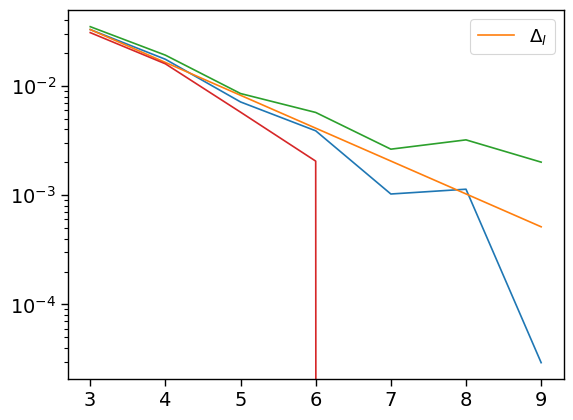

In [260]:
# mcmc_mean=np.zeros((len(eLes),samples,2,int(T/d)))
i=4
lev=1
bias=np.abs(np.mean((ch_paths_file[:,:,i]),axis=1)-x_kf_smooth[i+1,0])
var_bias=np.var((ch_paths_file[:,:,i]-x_kf_smooth[i+1,0]),axis=1)
bias_up=bias+np.sqrt(var_bias)*1.96/np.sqrt(samples)
bias_lb=bias-np.sqrt(var_bias)*1.96/np.sqrt(samples)

plt.plot(eLes,bias)
plt.plot(eLes, 2**(eLes[0])/2**(eLes)*bias[0],label="$\Delta_l$")
plt.plot(eLes,bias_up)
plt.plot(eLes,bias_lb)
print(np.mean((ch_paths_file[:,:,i]),axis=1))

print(x_kf_smooth[i+1,0])
plt.yscale("log")
plt.legend()


In [261]:
Grid_p=1
thetas=np.array([theta])
sigmas=np.array([sigma])
sds=np.array([sd])
Grid=np.stack((thetas,sigmas,sds))
theta_aux=thetas+0.2
sigma_aux=sigmas
[theta_0,sigma_0,sd_0]=[theta,sigma,sd]
Grads_eles=np.zeros((len(eLes),3))
dim=1
dim_o=1
for i in range(len(eLes)):
        l_dis=eLes[i]
        #K=np.array([[np.exp(d*theta)]])
        K=np.array([[(1+theta/2**l_dis)**(2**l_dis*d)]])
        #G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        G=np.array([[sigma*np.sqrt(((1+theta/2**l_dis)**(2*2**l_dis*d)-1)/(2*theta+theta**2/2**l_dis))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        #Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_sigma_s=G[0,0]**2/sigma**2
        #Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R_theta=-G[0,0]**2*(2+2*theta/2**l_dis)/(2*theta+theta**2/2**l_dis)\
        +(sigma**2/(2*theta+theta**2/2**l_dis))*(1+theta/2**l_dis)**(2*2**l_dis*d-1)*2*d
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*(1+theta/2**l_dis)**(2**l_dis*d-1)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads_eles[i]=Grad_log_lik[:,0,0]

The gradient is:  [[0.01158316]]
[-0.0196547  -0.00622277  0.00320697  0.00799933  0.0110455   0.01378507
  0.01368793]


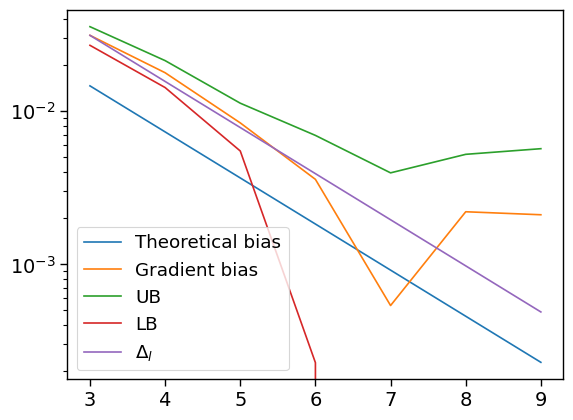

In [265]:
par_n=2
print("The gradient is: ",Grad_log_lik_an[par_n])
print(np.mean(Grads_file[:,:,par_n],axis=1))
grad_bias=np.abs(np.mean(Grads_file[:,:,par_n]-Grad_log_lik_an[par_n],axis=1))
var_grad_bias=np.var(Grads_file[:,:,par_n]-Grad_log_lik_an[par_n],axis=1)
grad_bias_up=grad_bias+np.sqrt(var_grad_bias)*1.96/np.sqrt(samples)
grad_bias_lb=grad_bias-np.sqrt(var_grad_bias)*1.96/np.sqrt(samples)
theo_bias=np.abs(Grads_eles[:,par_n]-Grad_log_lik_an[par_n,0,0])
plt.plot(eLes,theo_bias,label="Theoretical bias")
plt.plot(eLes,grad_bias,label="Gradient bias")
plt.plot(eLes,grad_bias_up,label="UB")
plt.plot(eLes,grad_bias_lb,label="LB")
plt.plot(eLes,2**(eLes[0])/2**(eLes)*grad_bias[0],label="$\Delta_l$")
#plt.plot(eLes,r_grad_bias,label="Richardson gradient bias")
plt.yscale("log")
plt.legend()

As can be seen comparing the bias plots for the same paremeter and different sampling method the bias keeps the same behaviour(same rates same magnitudes) which is expected.

### Coupling of the $\textbf{Gradient}$ of the conditional Particle filter using diffusion bridges

In [266]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=3
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.25
    sigma_true=0.8
    np.random.seed(40)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    #plt.plot(times[1:],x_reg,label="True signal")
    #plt.plot(l_max_times,x_true[:-1],label="True complete signal")
    sd_true=1.2
    np.random.seed(67)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    theta=theta_true
    sigma=sigma_true
    theta_aux=theta+0.2
    sigma_aux=sigma
    sd=sd_true
    fd=1e-4
    theta_fd_0=theta_true+fd
    theta_fd_1=theta_true+fd*0.5
    sigma_fd_0=sigma_true+fd
    sigma_fd_1=sigma_true+fd*0.5
    sigma_aux_fd_0=sigma_aux+fd
    sigma_aux_fd_1=sigma_aux+fd*0.5
    start=time.time()
    B=500*15*2
    samples=30
    # interactive 1 samples=100
    N=50
    x0=x0_sca+np.zeros(N)
    seed=2985
    l0=2
    L_max=10
    eLes=np.array(range(l0,L_max+1))

mcmc_mean=np.zeros((len(eLes),samples,2,int(T/d)))
mcmc=np.zeros((len(eLes),samples,B,2,int(T/d)))
grads_mean=np.zeros((len(eLes),samples,2,3))
pf_diffs=np.zeros((len(eLes),samples,int(T/d)))
pf_l=np.zeros((len(eLes),samples,2,int(T/d)))
ori_pf_l=np.zeros((len(eLes),samples,int(T/d)))
resamp_coef=1

In [268]:
#np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_pars_v43.txt",dtype=float),(len(eLes),samples,2,SGD_steps+1,3))   
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata"
ch_paths_file=np.reshape(np.loadtxt(path+"/Prl_C_Grad_chain_ch_paths_v4.txt",dtype=float),(len(eLes),samples,2,int(T/d)))   
Grads_file=np.reshape(np.loadtxt(path+"/Prl_C_Grad_chain_Grads_v4.txt",dtype=float),(len(eLes),samples,2,3))

-0.25 0.8 1.2
[3.38931729 2.58113606 0.40794512]


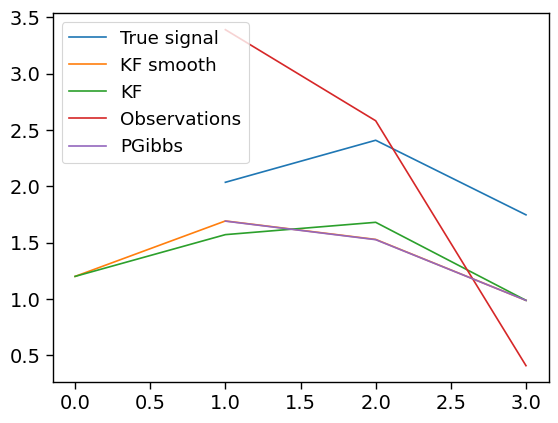

In [269]:
dim=1
dim_o=1
print(theta, sigma,sd)
K=np.array([[np.exp(d*theta)]])
G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
H=np.array([[1]])
D=np.array([[sd]])
#print(K,G**2,H,D)
Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
Grad_R=np.zeros((3,1,1),dtype=float)
Grad_R[0,0,0]=Grad_R_theta
Grad_R[1,0,0]=Grad_R_sigma_s
Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
#print(Grad_K,Grad_R,Grad_S)
x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
#KF(xin,dim,dim_o,K,G,H,D,obs)
x_kf_2=bdg.KF(x0[0],dim,dim_o,K,G,H,D,obs)[0]
Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
d_times=np.array(range(t0,int(T/d)+1))*d
#weights=pff.norm_logweights(lws,ax=2)
#PF_mean=np.mean(np.sum(x_prs*weights,axis=-1),axis=0)
l=L_max
l_times=np.arange(t0,T,2**(-l))
l_max_times=np.arange(t0,T,2**(-l_max))
#print(times, l_times)
x_mean=np.mean(ch_paths_file,axis=1)[-1,1]
#print(x_mean.shape)
#plt.plot(d_times[1:],PF_mean,label="PF")
plt.plot(d_times[1:],x_reg,label="True signal")
#plt.plot(l_max_times,x_true[:-1],label="True complete signal")
plt.plot(d_times,x_kf_smooth[:,0],label="KF smooth")
plt.plot(d_times,x_kf[:,0],label="KF")
plt.plot(d_times[1:], obs,label="Observations")
plt.plot(d_times[1:], x_mean.T,label="PGibbs")
print(obs)
plt.legend() 

In [270]:
Grid_p=1
thetas=np.array([theta])
sigmas=np.array([sigma])
sds=np.array([sd])
Grid=np.stack((thetas,sigmas,sds))
theta_aux=thetas+0.2
sigma_aux=sigmas
fd_rate=1e-4
[theta_fd,sigma_fd,sd_fd]=np.array([thetas,sigmas,sds])+fd_rate*(np.zeros((3,Grid_p))+1)
print(thetas,sigmas)
print(Grid.shape)
[theta_0,sigma_0,sd_0]=[theta,sigma,sd]
Grads_eles=np.zeros((len(eLes),3))
dim=1
dim_o=1

for i in range(len(eLes)):
        l_dis=eLes[i]

        #K=np.array([[np.exp(d*theta)]])
        K=np.array([[(1+theta/2**l_dis)**(2**l_dis*d)]])
        #G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        G=np.array([[sigma*np.sqrt(((1+theta/2**l_dis)**(2*2**l_dis*d)-1)/(2*theta+theta**2/2**l_dis))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        #Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_sigma_s=G[0,0]**2/sigma**2
        #Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R_theta=-G[0,0]**2*(2+2*theta/2**l_dis)/(2*theta+theta**2/2**l_dis)\
        +(sigma**2/(2*theta+theta**2/2**l_dis))*(1+theta/2**l_dis)**(2*2**l_dis*d-1)*2*d
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*(1+theta/2**l_dis)**(2**l_dis*d-1)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads_eles[i]=Grad_log_lik[:,0,0]


[-0.25] [0.8]
(3, 1)


[[0.30456855]]
[0.24702173 0.27418453 0.28687493 0.29687653 0.30067177 0.30290193
 0.302971   0.30486483 0.30711727]
[0.28495566 0.29491249 0.29980604 0.30223183 0.3034395  0.30404204
 0.30434298 0.30449337 0.30456855]
(9,)


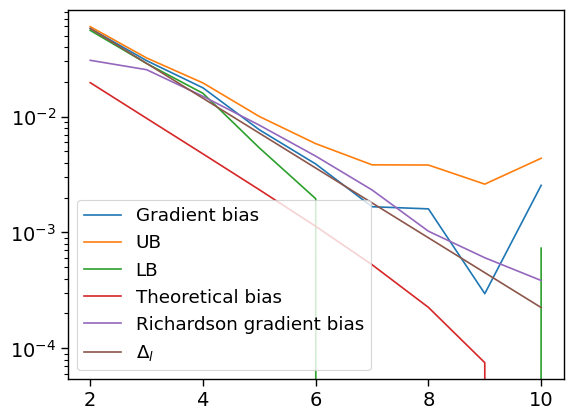

In [271]:
par_n=2
lev=1 # lev in {0,1}
print(Grad_log_lik[par_n])
print((np.mean(Grads_file[:,:,lev,par_n],axis=1)))
print(Grads_eles[:,par_n])
grad_bias=np.abs(np.mean(Grads_file[:,:,lev,par_n]-Grad_log_lik[par_n,0],axis=1))
r_grad_bias=np.abs(np.mean(Grads_file[:,:,0,par_n]-Grads_file[:,:,1,par_n],axis=1))
theo_bias=np.abs(Grads_eles[:,par_n]-Grad_log_lik[par_n,0,0])
print(theo_bias.shape)
var_grad_bias=np.var(Grads_file[:,:,lev,par_n]-Grad_log_lik[par_n],axis=1)
grad_bias_up=grad_bias+np.sqrt(var_grad_bias)*1.96/np.sqrt(samples)
grad_bias_lb=grad_bias-np.sqrt(var_grad_bias)*1.96/np.sqrt(samples)
plt.plot(eLes,grad_bias,label="Gradient bias")
plt.plot(eLes,grad_bias_up,label="UB")
plt.plot(eLes,grad_bias_lb,label="LB")
plt.plot(eLes,theo_bias,label="Theoretical bias")

plt.plot(eLes,r_grad_bias,label="Richardson gradient bias")
plt.plot(eLes,2**(eLes[0])/2**(eLes)*grad_bias[0],label="$\Delta_l$")

plt.yscale("log")
plt.legend()

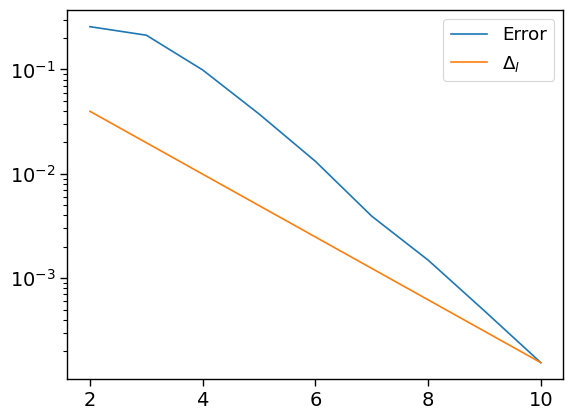

In [272]:
par_n=0
#print(Grads_file[:,:,0,par_n])
#print(Grads_file[:,:,1,par_n])
s_error=np.mean((Grads_file[:,:,0,par_n]-Grads_file[:,:,1,par_n])**2,axis=1)
#s_error_sum=np.mean(np.mean((grads_mean[:,:,0]-grads_mean[:,:,1])**2,axis=1),axis=-1)
plt.plot(eLes,s_error,label="Error")
#plt.plot(eLes,s_error_sum,label="Error_sum")
plt.plot(eLes, 2**(eLes[-1])/2**(eLes)*s_error[-1],label="$\Delta_l$")
plt.legend()
plt.yscale("log")

### Backward sampling compared to vanilla sampling

In the following we show a comparation of the variance of the mean of the smoothing distribution when computing the samples in a backward fashion compared to vanilla sampling (with the path degeneracy problem.)

In [273]:
N=10
x0_sca=1.2
x0=x0_sca+np.zeros(N)
l=6
alpha=0
T=10
t0=0
l_d=0
d=2**(l_d)
theta=-0.3
sigma=1.2
sd=0.55
#sigma_aux=0.2
theta_aux=theta-0.2
sigma_aux=sigma
#print(theta)
np.random.seed(1)
collection_input=[ bdg.b_ou_1d,theta,bdg.Sig_ou_1d,sigma]
resamp_coef=1
l_max=10
x_true=bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
# x_reg stands for x regular
obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd)
np.random.seed(3)
#print(x_pr)
n_steps=int(2**l*(T-t0))
dt=2**(-l)
x=np.zeros((n_steps+1,N))
x[0]=x0
x_pr=np.random.normal(x0,np.sqrt(sigma**2*(T-t0)),N)
x[-1]=x_pr
int_G=np.zeros(N)
t_test=2.

In [10]:
start=time.time()
B=50
samples=400
seed=0
mcmc_mean=np.zeros((samples,2,int(T/d)))
resamp_coef=1
l=2
for i in range(samples):

    np.random.seed(i)
    #print("Seed feeded to PF_bridge is: ",seed)
    
    [log_weights,int_Gs,x_pr]=bdg.PF_bridge(t0,x0,T,bdg.b_ou_1d,theta,bdg.Sig_ou_1d,sigma,bdg.b_ou_aux,theta_aux,bdg.Sig_ou_aux,sigma_aux,\
    bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_aux,sigma_aux]],bdg.H_quasi_normal,[bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],\
    bdg.sampling_ou, [theta_aux,sigma_aux],obs,bdg.log_g_normal_den,sd,\
    bdg.ou_trans_den,[theta_aux,sigma_aux], bdg.ou_trans_den,\
    resamp_coef,l,d, N,seed)
    #x_mean=np.sum(pff.norm_logweights(log_weights,ax=1)*x_pr,axis=-1)
    weights=pff.norm_logweights(log_weights[-1])
    #print(weights.shape)
    index=np.random.choice(np.array(range(N)),p=weights)
    cond_path=x_pr[:,index]
    cond_log_weights=log_weights[:,index]
    cond_int_G=int_Gs[:,index]
    seeds_cond=np.zeros((int(T/d),2),dtype=int)
    seeds_cond[:,0]=seed+np.array(range(int(T/d)))*int(int(2**l*d-1))
    seeds_cond[:,1]=index*np.ones(int(T/d))

    ch_paths=np.zeros((B,int(T/d)))
    ch_weights=np.zeros((B,int(T/d)))

    ch_whole_paths=np.zeros((B,int(T/d)))
    ch_whole_weights=np.zeros((B,int(T/d)))

    seed+=(int(T/d))*int(int(2**l*d-1))
    cond_whole_path=cond_path
    cond_whole_log_weights=cond_log_weights
    
    for b in range(B):
        print("sample iteration: ",i," chain iteration: ",b)


        [resamp_log_weights,int_Gs,x_pr,new_seeds]=bdg.Cond_PF_bridge(cond_whole_log_weights,cond_int_G,cond_whole_path,seeds_cond,\
        t0,x0,T,bdg.b_ou_1d,theta,bdg.Sig_ou_1d,sigma,bdg.b_ou_aux,theta_aux,bdg.Sig_ou_aux,sigma_aux,\
        bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_aux,sigma_aux]],bdg.H_quasi_normal,[bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],\
        bdg.sampling_ou, [theta_aux,sigma_aux],obs,bdg.log_g_normal_den,sd,\
        bdg.ou_trans_den,[theta_aux,sigma_aux],bdg.ou_trans_den,\
        resamp_coef,l,d, N,seed)
    
        weights=pff.norm_logweights(resamp_log_weights[-1])
        index=np.random.choice(np.array(range(N)),p=weights)
        #print("x_pr's shape: ",x_pr.shape)   
        cond_whole_path=x_pr[:,index]
        #print("cond_path's shape: ",cond_path.shape)
        cond_whole_log_weights=resamp_log_weights[:,index]
        ch_whole_paths[b]=cond_whole_path
        ch_whole_weights[b]=cond_whole_log_weights
        
        [log_weights,x_pr,cond_log_weights,int_Gs_cond,cond_path,seeds_cond]=\
        bdg.Cond_PF_bridge_back_samp(cond_log_weights,cond_int_G,cond_path,seeds_cond,t0,x0,\
        T,bdg.b_ou_1d,theta,bdg.Sig_ou_1d,sigma,bdg.b_ou_aux,theta_aux,bdg.Sig_ou_aux,sigma_aux,\
        bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_aux,sigma_aux]],bdg.H_quasi_normal,\
        [bdg.ou_sd,[theta_aux,sigma_aux],theta_aux],\
        bdg.sampling_ou, [theta_aux,sigma_aux],obs,bdg.log_g_normal_den,sd,\
        bdg.ou_trans_den,[theta_aux,sigma_aux],bdg.ou_trans_den,\
        resamp_coef,l,d, N,seed)

        seed+=int((int(T/d))*int(int(2**l*d-1)))
        ch_paths[b]=cond_path
        ch_weights[b]=cond_log_weights
        #print("seed conditionals are:",seeds_cond)

    mcmc_mean[i,0]=np.mean(ch_paths,axis=0)
    mcmc_mean[i,1]=np.mean(ch_whole_paths,axis=0)

end=time.time()

sample iteration:  0  chain iteration:  0
sample iteration:  0  chain iteration:  1
sample iteration:  0  chain iteration:  2
sample iteration:  0  chain iteration:  3
sample iteration:  0  chain iteration:  4
sample iteration:  0  chain iteration:  5
sample iteration:  0  chain iteration:  6
sample iteration:  0  chain iteration:  7
sample iteration:  0  chain iteration:  8
sample iteration:  0  chain iteration:  9
sample iteration:  0  chain iteration:  10
sample iteration:  0  chain iteration:  11
sample iteration:  0  chain iteration:  12
sample iteration:  0  chain iteration:  13
sample iteration:  0  chain iteration:  14
sample iteration:  0  chain iteration:  15
sample iteration:  0  chain iteration:  16
sample iteration:  0  chain iteration:  17
sample iteration:  0  chain iteration:  18
sample iteration:  0  chain iteration:  19
sample iteration:  0  chain iteration:  20
sample iteration:  0  chain iteration:  21
sample iteration:  0  chain iteration:  22
sample iteration:  0 

710.9908390045166


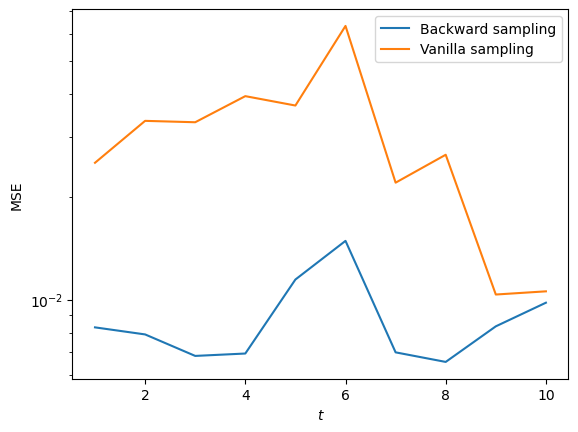

In [11]:
l_dis=l
dim=1
dim_o=1
K=np.array([[(1+theta/2**l_dis)**(2**l_dis*d)]])
#G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
G=np.array([[sigma*np.sqrt(((1+theta/2**l_dis)**(2*2**l_dis*d)-1)/(2*theta+theta**2/2**l_dis))]])
H=np.array([[1]])
D=np.array([[sd]])
#print(K,G**2,H,D)
Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
#Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
Grad_R_sigma_s=G[0,0]**2/sigma**2
#Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
Grad_R_theta=-G[0,0]**2*(2+2*theta/2**l_dis)/(2*theta+theta**2/2**l_dis)\
+(sigma**2/(2*theta+theta**2/2**l_dis))*(1+theta/2**l_dis)**(2*2**l_dis*d-1)*2*d
Grad_R=np.zeros((3,1,1),dtype=float)
Grad_R[0,0,0]=Grad_R_theta
Grad_R[1,0,0]=Grad_R_sigma_s
Grad_K=np.array([[[d*(1+theta/2**l_dis)**(2**l_dis*d-1)]],[[0]],[[0]]],dtype=float)
#print(Grad_K,Grad_R,Grad_S)
x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
#Grads_dis[j,i]=Grad_log_lik[:,0,0]
times=np.arange(t0,T+1,d)
l_times=np.arange(t0,T,2**(-l))
#print(times, l_times)
#plt.plot(times[1:],x_reg,label="True signal")
#plt.plot(times[1:],x_kf_smooth[1:,0],label="KF smooth")
#plt.plot(times,x_kf[:,0],label="KF")
#plt.plot(times[1:], obs,label="Observations")
#plt.title("N=2, and chain of length 50, with 50 samples")
MSE=np.mean((x_kf_smooth[1:,0]-mcmc_mean)**2,axis=0)
plt.plot(times[1:],MSE[0],label="Backward sampling")
plt.plot(times[1:],MSE[1],label="Vanilla sampling")
plt.yscale("log")
plt.ylabel("MSE")
plt.xlabel("$t$")
#print(MSE)
print(end-start)
plt.legend()
#np.savetxt("MSE_backward_sampling_3.txt",MSE,fmt="%f")
#np.savetxt("MSE_backward_sampling_times_3.txt",times,fmt="%f")
#plt.savefig("MSE_backward_sampling_3.pdf")    


## Vanilla vs Backward (final)

In [437]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=80
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    #plt.plot(times[1:],x_reg,label="True signal")
    #plt.plot(l_max_times,x_true[:-1],label="True complete signal")
    sd_true=0.55
    np.random.seed(4)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    #plt.plot(d_times, obs,label="Observations")
    fd=1e-10
    gamma=0.04
    alpha=0.5
    theta_in=-0.05
    sigma_in=0.5
    sd_in=1.5
    theta_in_aux=theta_in+0.2   
    sigma_in_aux=sigma_in
    theta_in_fd=theta_in+fd
    sigma_in_fd=sigma_in+fd
    sigma_in_aux_fd=sigma_in_aux+fd
    start=time.time()
    mcmc_links=10
    SGD_steps=2**10
    #SGD_steps=2**1
    B=mcmc_links*SGD_steps

    samples=70
    #samples=2

    # interactive 1 samples=100
    N=50
    x0=x0_sca+np.zeros(N)
    l=7
    #l=4
    #l=4
    seed=0

In [429]:
v="35"
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata"
SGD_steps=2**8
pars_file_van=np.reshape(np.loadtxt(path+"/Prl_SGD_ou_bridge_van_comparison_pars_v"+v+".txt",dtype=float),(samples,SGD_steps+1,3))
ch_paths_file_van=np.reshape(np.loadtxt(path+"/Prl_SGD_ou_bridge_van_comparison_ch_paths_v"+v+".txt",dtype=float),(samples,SGD_steps*mcmc_links,int(T/d)))
SGD_steps=2**10
ch_paths_file=np.reshape(np.loadtxt(path+"/Prl_SGD_ou_bridge_comparison_ch_paths_v"+v+".txt",dtype=float),(samples,B,int(T/d)))
pars_file=np.reshape(np.loadtxt(path+"/Prl_SGD_ou_bridge_comparison_pars_v"+v+".txt",dtype=float),(samples,SGD_steps+1,3))

In [438]:
Grid_p=11
thetas=np.linspace(-1,1,Grid_p)*0.2-0.3
lsigmas=np.linspace(-1,1,Grid_p)*0.25-0.3
lsds=np.linspace(-1,1,Grid_p)*0.5+0
Grid=np.stack((thetas,lsigmas,lsds))
print(np.log(sigma_in),np.log(sd_in))
theta_aux=thetas+0.2
sigma_aux=np.exp(lsigmas)
print(np.log(sd_true),np.log(sigma_true))

-0.6931471805599453 0.4054651081081644
-0.5978370007556204 0.1823215567939546


In [439]:
[theta_0,sigma_0,sd_0]=np.copy(np.array([theta_true,sigma_true,sd_true]))
x=1
y=2
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
dim_o=1
for i in range(len(Grid[x])):
    par_x=np.exp(Grid[x][i])*(x!=0)+Grid[x][i]*(x==0)
    for j in range(len(Grid[y])):
        #sigma=sigmas[j]
        par_y=np.exp(Grid[y][j])*(y!=0)+Grid[y][j]*(y==0)
        theta=(y==0)*par_y+(x==0)*par_x+ (x!=0)*(y!=0)*theta_0
        sigma=(y==1)*par_y+(x==1)*par_x+ (x!=1)*(y!=1)*sigma_0
        sd=(y==2)*par_y+(x==2)*par_x+ (x!=2)*(y!=2)*sd_0
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma*sigma
        Grad_log_lik[2,0,0]=Grad_log_lik[2,0,0]*sd
        Grads[j,i]=Grad_log_lik[:,0,0]

In [440]:
SGD_steps=20
pars=np.zeros((SGD_steps+1,3))
Grads_test=np.zeros((SGD_steps+1,3))
#alpha=0.0001
#gamma=0.05
theta=theta_in
sigma=sigma_in
alpha_new=0.5
gamma_new=0.04
sd=sd_in
l_dis=l
pars[0]=np.array([theta,sigma,sd])
for b_ind in range(SGD_steps):
    
    #sigma=sigmas[j]
    #print(theta,sigma)
    K=np.array([[(1+theta/2**l_dis)**(2**l_dis*d)]])
    #G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
    G=np.array([[sigma*np.sqrt(((1+theta/2**l_dis)**(2*2**l_dis*d)-1)/(2*theta+theta**2/2**l_dis))]])
    H=np.array([[1]])
    D=np.array([[sd]])
    #print(K,G**2,H,D)
    Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
    #Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
    Grad_R_sigma_s=G[0,0]**2/sigma**2
    #Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
    Grad_R_theta=-G[0,0]**2*(2+2*theta/2**l_dis)/(2*theta+theta**2/2**l_dis)\
    +(sigma**2/(2*theta+theta**2/2**l_dis))*(1+theta/2**l_dis)**(2*2**l_dis*d-1)*2*d
    Grad_R=np.zeros((3,1,1),dtype=float)
    Grad_R[0,0,0]=Grad_R_theta
    Grad_R[1,0,0]=Grad_R_sigma_s
    Grad_K=np.array([[[d*(1+theta/2**l_dis)**(2**l_dis*d-1)]],[[0]],[[0]]],dtype=float)
    #print(Grad_K,Grad_R,Grad_S)
    x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
    Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
    
    Grads_test[b_ind]=Grad_log_lik[:,0,0]
    #print(Grads_test[b_ind,:2])
    theta+=gamma_new*Grads_test[b_ind,0]/(b_ind+1)**(0.5+alpha_new)
    sigma+=gamma_new*Grads_test[b_ind,1]/(b_ind+1)**(0.5+alpha_new)
    sd+=gamma_new*Grads_test[b_ind,2]/(b_ind+1)**(0.5+alpha_new)
    pars[b_ind+1]=np.array([theta,sigma,sd])

[-0.05  0.5   1.5 ]


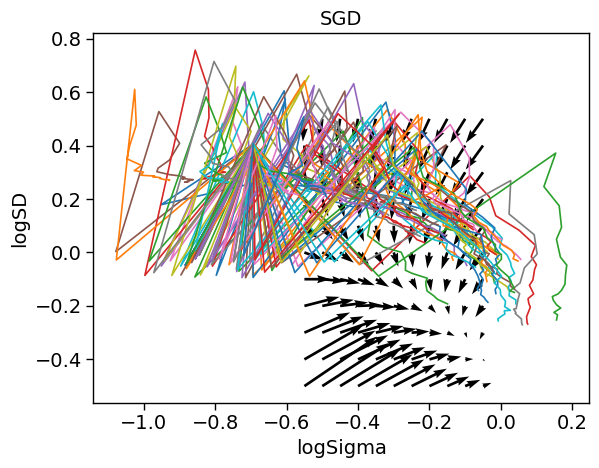

In [441]:
print(pars[0])
a=0
c=0
e=samples
b=SGD_steps
n_pars_file=np.zeros(pars_file.shape)
n_pars=np.zeros(pars.shape)
n_pars_file_van=np.zeros( pars_file_van.shape)
n_pars_file[:,:,1]=np.log(pars_file[:,:,1])
n_pars_file[:,:,2]=np.log(pars_file[:,:,2])
n_pars_file[:,:,0]=pars_file[:,:,0]
n_pars_file_van[:,:,1]=np.log(pars_file_van[:,:,1])
n_pars_file_van[:,:,2]=np.log(pars_file_van[:,:,2])
n_pars_file_van[:,:,0]=pars_file_van[:,:,0]
n_pars[:,1]=np.log(pars[:,1])
n_pars[:,2]=np.log(pars[:,2])
n_pars[:,0]=pars[:,0]

plt.plot(n_pars[a:,x].T,n_pars[a:,y].T)

#plt.plot(n_pars_file_van[c:e,a:b,x].T,n_pars_file_van[c:e,a:b,y].T,label="Vanilla")
plt.plot(n_pars_file[c:e,a:b,x].T,n_pars_file[c:e,a:b,y].T,label="Backward")
#thetas_Grid,sigmas_Grid=np.meshgrid(thetas,sigmas)
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])
#plt.quiver(x_Grid,y_Grid,Grads_dis[:,:,x],Grads_dis[:,:,y])
plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
labels=["Theta","logSigma","logSD"]
plt.xlabel(labels[x])
plt.ylabel(labels[y])
plt.title("SGD")
#plt.legend()
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()

0.2983355435581191 0.3477276107809604


ValueError: x and y must have same first dimension, but have shapes (1023,) and (255,)

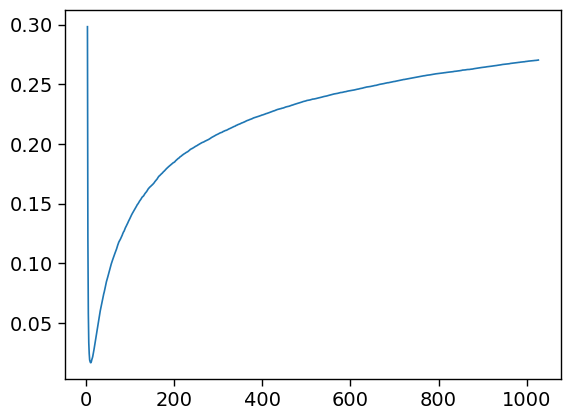

In [443]:
i=2
fontsize=14
mse=np.mean((pars_file-pars[-1])**2,axis=0)[2:,i]
mse_van=np.mean((pars_file_van-pars[-1])**2,axis=0)[2:,i]
print(mse[0],mse_van[0])
plt.plot(np.array(range(mse.shape[0]))+2**2,mse,label="Backward")
plt.plot(np.array(range(mse.shape[0]))+2**2,mse_van,label="Vanilla")
plt.yscale("log")
plt.xscale("log")
print(np.mean((pars_file),axis=0)[-1,i])
labels=[r"$\theta$","$\sigma$","$s$"]
plt.title(labels[i],fontsize=fontsize)
plt.ylabel("MSE",fontsize=fontsize)
plt.xlabel("SGD steps",fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
#plt.savefig("MSE_SGD_sd.pdf")

[[ 0.6788323  0.3034422 -0.0729365 ...  0.3679079  0.3061853  0.3581989]
 [ 0.4103735 -0.2378976 -0.3431142 ...  0.1522407  0.4230831  0.3106175]
 [ 0.6103519  0.0764625 -0.2184959 ...  0.4236689  0.2654421  0.2672048]
 ...
 [ 0.5498226  0.07794   -0.1458936 ...  0.5924946  0.6755218  0.3031889]
 [ 0.702572   0.339582  -0.1232143 ...  0.5787496  0.5553707  0.0901129]
 [ 0.6952492  0.0713631 -0.1488922 ...  0.3042321  0.3396222  0.4108009]]
[0.09684195 0.1445831  0.12718343 0.11775259 0.16107138 0.19914066
 0.17717756 0.16840563 0.17444435 0.15543427 0.14070115 0.13654191
 0.14553244 0.15265565 0.17463708 0.2164459  0.18275618 0.20480086
 0.21381177 0.13144208 0.17704183 0.14296111 0.1731011  0.1566378
 0.17688038 0.13219807 0.16970034 0.11657708 0.14797377 0.2072101
 0.20868035 0.22152536 0.23301838 0.23148908 0.15657819 0.14714611
 0.20016298 0.22857785 0.2313002  0.16060888 0.18469622 0.12856492
 0.11487476 0.11272635 0.13976394 0.1657163  0.11967585 0.1220636
 0.1248596  0.08645686 

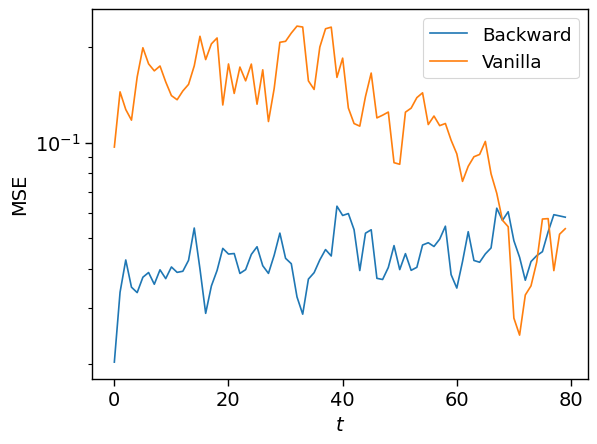

In [435]:
theta=theta_in
sigma=sigma_in
sd=sd_in
K=np.array([[np.exp(d*theta)]])
G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
H=np.array([[1]])
D=np.array([[sd]])
Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
Grad_R=np.zeros((3,1,1),dtype=float)
Grad_R[0,0,0]=Grad_R_theta
Grad_R[1,0,0]=Grad_R_sigma_s
Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
#print(Grad_K,Grad_R,Grad_S)
x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma*sigma
Grad_log_lik[2,0,0]=Grad_log_lik[2,0,0]*sd
Grads[j,i]=Grad_log_lik[:,0,0]
j=1
mse=np.mean((np.mean(ch_paths_file[:,mcmc_links*(j-1):mcmc_links*j],axis=1)-x_kf_smooth[1:,0])**2,axis=0)
mse_van=np.mean((np.mean(ch_paths_file_van[:,mcmc_links*(j-1):mcmc_links*j],axis=1)-x_kf_smooth[1:,0])**2,axis=0)
print(np.mean(ch_paths_file[:,mcmc_links*(j-1):mcmc_links*j],axis=1))
print(mse_van)
print(x_kf_smooth)
plt.ylabel("MSE")
plt.xlabel("$t$")

plt.yscale("log")
plt.plot(mse,label="Backward")
plt.plot(mse_van,label="Vanilla")
plt.legend()
print(mse_van[1])

## Generation hyperparameters for the Unbiased estimator

In the following we study the chain mixing depending on the number of particles N that we employ. 

In [292]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=5
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    sd_true=0.55
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    #plt.plot(times,x_true)
    #plt.plot(d_times,obs)
    #obs=np.array([])
    resamp_coef=1
    N=50
    start=time.time()
    mcmc_links=100
    fd=1e-4
    theta_in=-0.67
    #obs=np.array([theta_in*x0_sca+np.sqrt(1/2)+1])
    theta_in_fd=theta_in+fd
    sigma_in=1.6
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    sd_in=0.7
    gamma=0.5
    alpha=0.5
    seed=2393
    x0=x0_sca+np.zeros(N)
    inputs=[]
    samples=40
    CL=3.170869039225322
    CL0=3.65411163
    CP0=1.9423342
    CP=0.04938815
    s0=16
    pmax=5
    l0=5
    lmax=10
    beta_l=1
    beta_p=1 

### For $N=50$

In [293]:
l=4
N=50
fd_rate=1e-4
mcmc_links=100
gamma=0.5
alpha=0.5
SGD_steps=2**6
#"""
[ch_paths,pars_one_samp]=bdg.SGD_bridge(t0,x0,T,bdg.b_ou_1d,theta_in,theta_in_fd,bdg.Sig_ou_1d,\
sigma_in,sigma_in_fd,bdg.b_ou_aux,theta_in_aux,bdg.Sig_ou_aux,sigma_in_aux,\
sigma_in_aux_fd,bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_in_aux,sigma_in_aux]],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd]],\
bdg.H_quasi_normal,[bdg.ou_sd,[theta_in_aux,sigma_in_aux],theta_in_aux],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd],theta_in_aux],\
bdg.sampling_ou,[theta_in_aux,sigma_in_aux],\
obs,bdg.log_g_normal_den,sd_in, bdg.ou_trans_den,[theta_in_aux,sigma_in_aux],\
bdg.Grad_log_aux_trans_ou_new,bdg.ou_trans_den, bdg.Grad_log_G_new,resamp_coef, l, d,N,seed,fd_rate,\
mcmc_links,SGD_steps,gamma, alpha,bdg.update_pars_ou)  

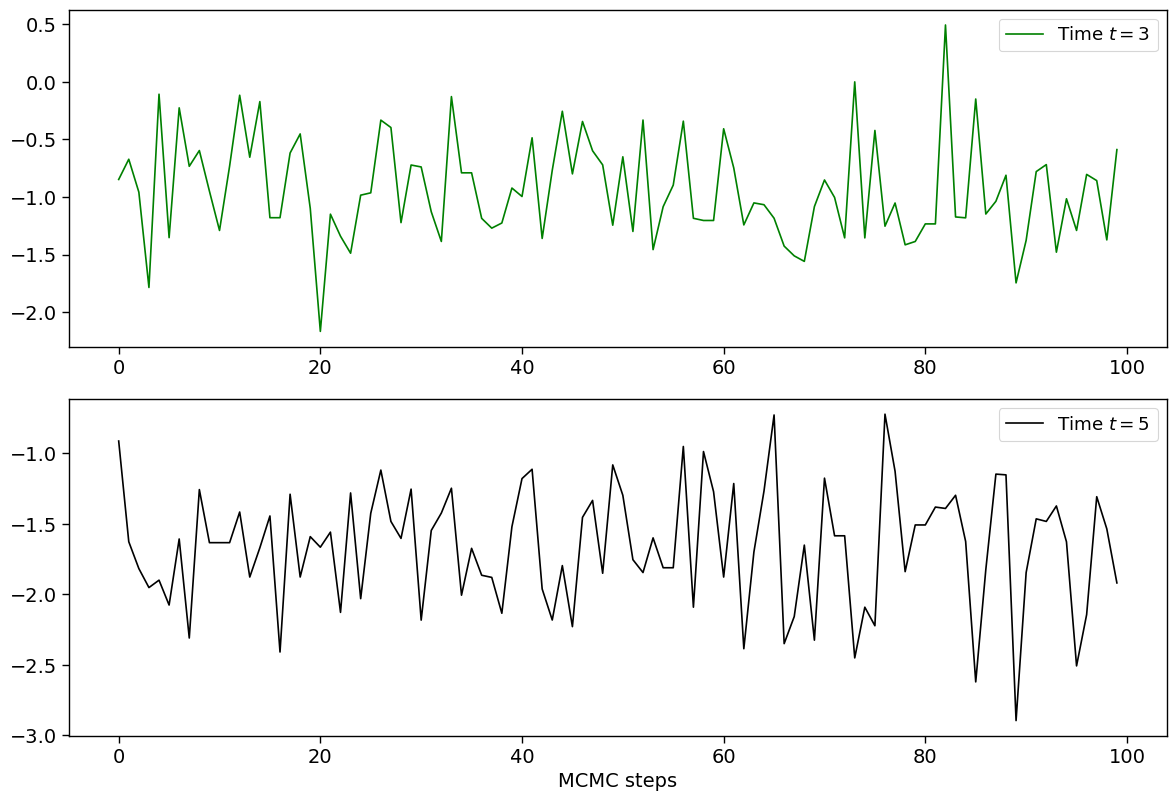

In [296]:

# Sample data for demonstration
a=-100
# Create a figure with vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1,1]})

# Plot in each subplot
#axes[0].plot( ch_paths[a:,0], label='Time $t=1$')
#axes[0].set_title('Plot 1:Time 1')
#axes[0].legend()

#axes[1].plot(ch_paths[a:,1], label='Time $t=2$', color='orange')
#axes[1].set_title('Plot 2: cos(x)')
#axes[1].legend()
axes[0].plot( ch_paths[a:,2], label='Time $t=3$', color='green')
#axes[2].set_title('Plot 3: tan(x)')
axes[0].legend()
#axes[3].plot( ch_paths[a:,3], label='Time $t=4$', color='red')
#axes[3].set_title('Plot 3: tan(x)')
#axes[3].legend()
axes[1].plot( ch_paths[a:,4], label='Time $t=5$', color='black')
#axes[4].set_title('Plot 3: tan(x)')
axes[1].legend()
# Adjust spacing
plt.tight_layout()
# Display the plots
plt.savefig("smoothing samplings_50_v1.pdf")
plt.xlabel("MCMC steps")
plt.show()

### For $N=30$

In [300]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=5
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    sd_true=0.55
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    #plt.plot(times,x_true)
    #plt.plot(d_times,obs)
    #obs=np.array([])
    resamp_coef=1
    N=30
    start=time.time()
    mcmc_links=100
    fd=1e-4
    theta_in=-0.67
    #obs=np.array([theta_in*x0_sca+np.sqrt(1/2)+1])
    theta_in_fd=theta_in+fd
    sigma_in=1.6
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    sd_in=0.7
    gamma=0.5
    alpha=0.5
    seed=2393
    x0=x0_sca+np.zeros(N)
    inputs=[]
    samples=40
    CL=3.170869039225322
    CL0=3.65411163
    CP0=1.9423342
    CP=0.04938815
    s0=16
    pmax=5
    l0=5
    lmax=10
    beta_l=1
    beta_p=1 

In [301]:
l=4
N=30
fd_rate=1e-4
mcmc_links=100
gamma=0.5
alpha=0.5
SGD_steps=2**6
#"""
[ch_paths,pars_one_samp]=bdg.SGD_bridge(t0,x0,T,bdg.b_ou_1d,theta_in,theta_in_fd,bdg.Sig_ou_1d,\
sigma_in,sigma_in_fd,bdg.b_ou_aux,theta_in_aux,bdg.Sig_ou_aux,sigma_in_aux,\
sigma_in_aux_fd,bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_in_aux,sigma_in_aux]],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd]],\
bdg.H_quasi_normal,[bdg.ou_sd,[theta_in_aux,sigma_in_aux],theta_in_aux],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd],theta_in_aux],\
bdg.sampling_ou,[theta_in_aux,sigma_in_aux],\
obs,bdg.log_g_normal_den,sd_in, bdg.ou_trans_den,[theta_in_aux,sigma_in_aux],\
bdg.Grad_log_aux_trans_ou_new,bdg.ou_trans_den, bdg.Grad_log_G_new,resamp_coef, l, d,N,seed,fd_rate,\
mcmc_links,SGD_steps,gamma, alpha,bdg.update_pars_ou)  

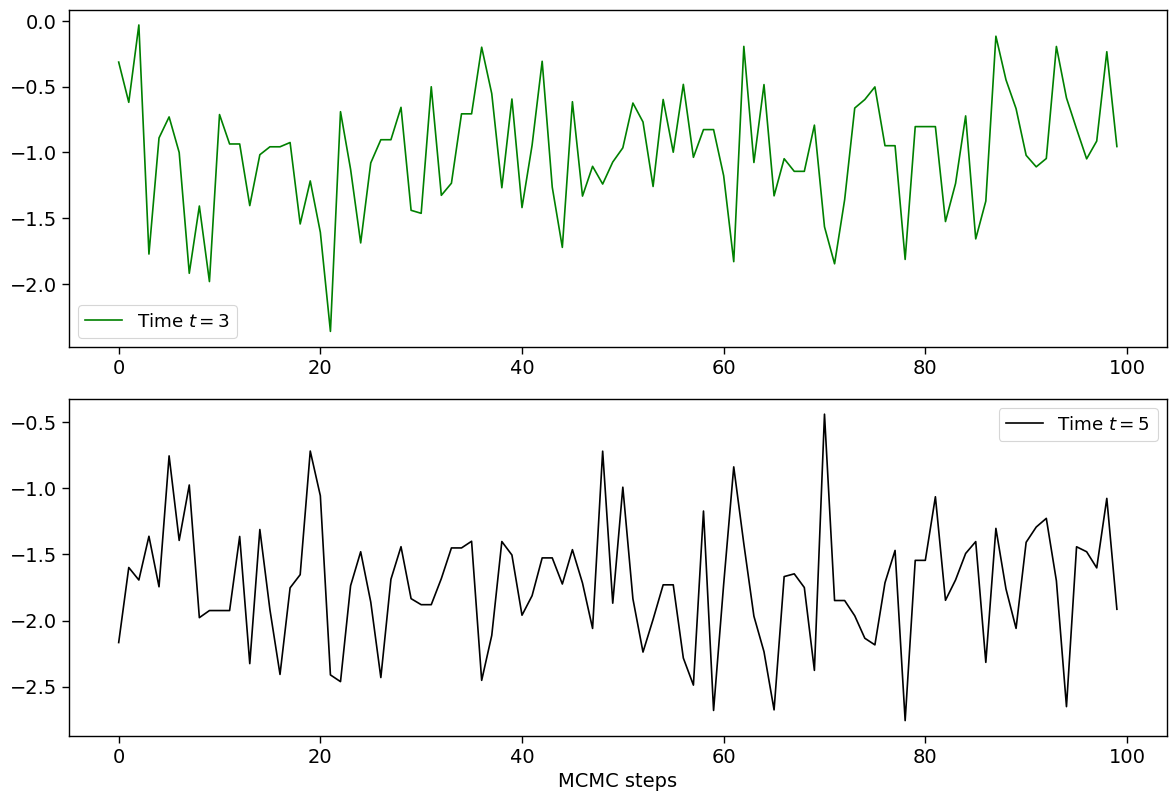

In [302]:

# Sample data for demonstration
a=-100
# Create a figure with vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1,1]})

# Plot in each subplot
#axes[0].plot( ch_paths[a:,0], label='Time $t=1$')
#axes[0].set_title('Plot 1:Time 1')
#axes[0].legend()

#axes[1].plot(ch_paths[a:,1], label='Time $t=2$', color='orange')
#axes[1].set_title('Plot 2: cos(x)')
#axes[1].legend()
axes[0].plot( ch_paths[a:,2], label='Time $t=3$', color='green')
#axes[2].set_title('Plot 3: tan(x)')
axes[0].legend()
#axes[3].plot( ch_paths[a:,3], label='Time $t=4$', color='red')
#axes[3].set_title('Plot 3: tan(x)')
#axes[3].legend()
axes[1].plot( ch_paths[a:,4], label='Time $t=5$', color='black')
#axes[4].set_title('Plot 3: tan(x)')
axes[1].legend()
# Adjust spacing
plt.tight_layout()
# Display the plots
plt.savefig("smoothing samplings_30_v1.pdf")
plt.xlabel("MCMC steps")
plt.show()

## For $N=10$

In [303]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=5
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    sd_true=0.55
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    #plt.plot(times,x_true)
    #plt.plot(d_times,obs)
    #obs=np.array([])
    resamp_coef=1
    N=10
    start=time.time()
    mcmc_links=100
    fd=1e-4
    theta_in=-0.67
    #obs=np.array([theta_in*x0_sca+np.sqrt(1/2)+1])
    theta_in_fd=theta_in+fd
    sigma_in=1.6
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    sd_in=0.7
    gamma=0.5
    alpha=0.5
    seed=2393
    x0=x0_sca+np.zeros(N)
    inputs=[]
    samples=40
    CL=3.170869039225322
    CL0=3.65411163
    CP0=1.9423342
    CP=0.04938815
    s0=16
    pmax=5
    l0=5
    lmax=10
    beta_l=1
    beta_p=1 

In [306]:
l=4
N=10
fd_rate=1e-4
mcmc_links=100
gamma=0.5
alpha=0.5
SGD_steps=2**6
[ch_paths,pars_one_samp]=bdg.SGD_bridge(t0,x0,T,bdg.b_ou_1d,theta_in,theta_in_fd,bdg.Sig_ou_1d,\
sigma_in,sigma_in_fd,bdg.b_ou_aux,theta_in_aux,bdg.Sig_ou_aux,sigma_in_aux,\
sigma_in_aux_fd,bdg.r_quasi_normal_1d,[bdg.ou_sd,[theta_in_aux,sigma_in_aux]],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd]],\
bdg.H_quasi_normal,[bdg.ou_sd,[theta_in_aux,sigma_in_aux],theta_in_aux],\
[bdg.ou_sd,[theta_in_aux,sigma_in_aux_fd],theta_in_aux],\
bdg.sampling_ou,[theta_in_aux,sigma_in_aux],\
obs,bdg.log_g_normal_den,sd_in, bdg.ou_trans_den,[theta_in_aux,sigma_in_aux],\
bdg.Grad_log_aux_trans_ou_new,bdg.ou_trans_den, bdg.Grad_log_G_new,resamp_coef, l, d,N,seed,fd_rate,\
mcmc_links,SGD_steps,gamma, alpha,bdg.update_pars_ou)  

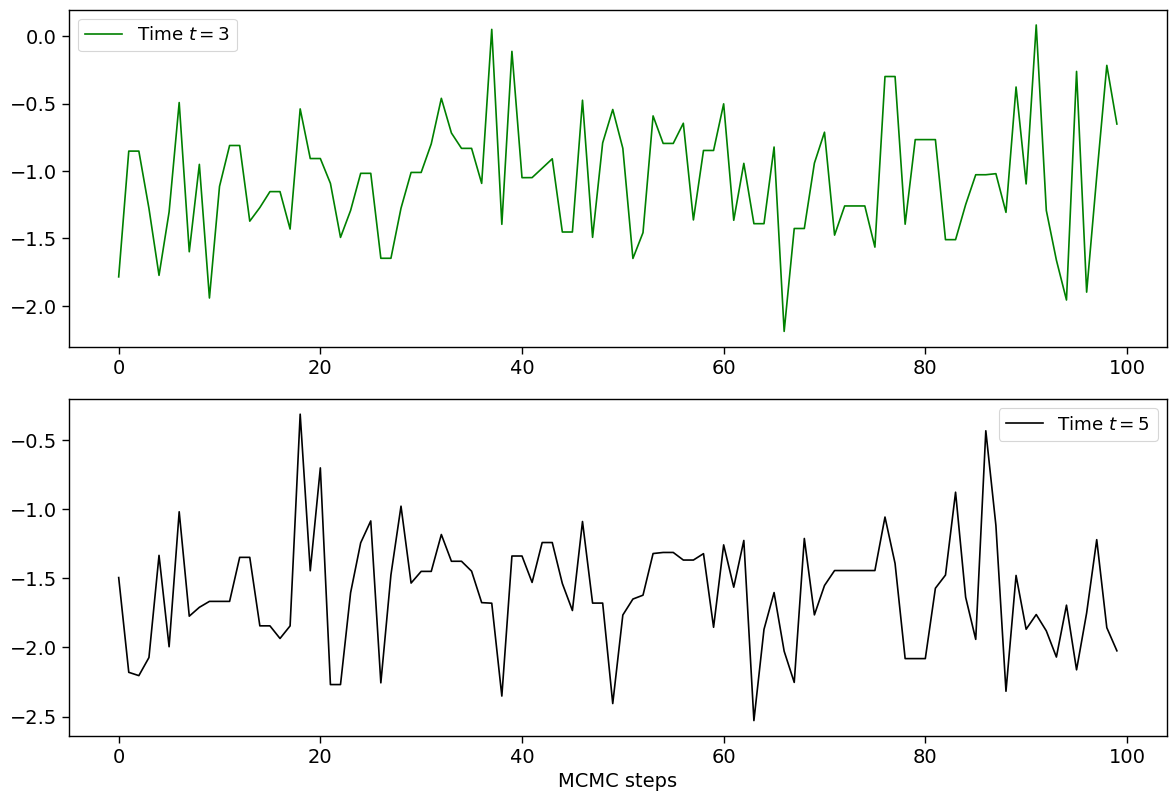

In [307]:

# Sample data for demonstration
a=-100
# Create a figure with vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1,1]})

# Plot in each subplot
#axes[0].plot( ch_paths[a:,0], label='Time $t=1$')
#axes[0].set_title('Plot 1:Time 1')
#axes[0].legend()

#axes[1].plot(ch_paths[a:,1], label='Time $t=2$', color='orange')
#axes[1].set_title('Plot 2: cos(x)')
#axes[1].legend()
axes[0].plot( ch_paths[a:,2], label='Time $t=3$', color='green')
#axes[2].set_title('Plot 3: tan(x)')
axes[0].legend()
#axes[3].plot( ch_paths[a:,3], label='Time $t=4$', color='red')
#axes[3].set_title('Plot 3: tan(x)')
#axes[3].legend()
axes[1].plot( ch_paths[a:,4], label='Time $t=5$', color='black')
#axes[4].set_title('Plot 3: tan(x)')
axes[1].legend()
# Adjust spacing
plt.tight_layout()
# Display the plots
plt.savefig("smoothing samplings_10_v1.pdf")
plt.xlabel("MCMC steps")
plt.show()

We can see that at time $t=2$ the mixing start decreasing quality, so we choose N=50.

### Coupling of the parameters in the time discretization

For the coupling of the parameters we use data stored in a file, the setting for the simulation that yielded the data is under the tag 35913206 in the file Bridge_parallelization.py

In [2]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=10
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=0.8
    sd_true=0.8
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    dim=1
    np.random.seed(1007)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    resamp_coef=1
    N=50
    start=time.time()
    mcmc_links=5
    #mcmc_links=10
    SGD_steps=4
    B=mcmc_links*SGD_steps
    fd=1e-8
    theta_in=-1
    sigma_in=1
    sd_in=1
    theta_in_fd=theta_in+fd
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    #arg_cm=int(sys.argv[1])
    #arg_cm=32
    samples=200*3*20
    seed=4253#+samples*(arg_cm-1)
    #samples=2
    gamma=0.2
    alpha=0.5
    seed=2393
    x0=x0_sca+np.zeros(N)
    l0=2
    L_max=8
    eLes=np.array(range(l0,L_max+1))
    v="rcv2_13"

In the following cell we build a grid for the parameters theta and sigma. 

In [3]:
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
pars_file=np.reshape(\
    np.loadtxt(path+"Observationsdata/data3/Prl_C_SGD_ou_bridge_pars_v"+v+".txt",dtype=float),(len(eLes),samples,2,SGD_steps+1,3)) 
Grads_file=np.reshape(np.loadtxt(path+"Observationsdata/data3/Prl_C_SGD_ou_bridge_Grads_v"+v+".txt",dtype=float),(len(eLes),samples,2,B,3))

In [14]:
#ch_paths_file=np.reshape(np.loadtxt(path+"Observationsdata/data3/Prl_C_SGD_ou_bridge_ch_paths_v"+v+".txt",dtype=float),(len(eLes),samples,2,B,int(T/d)))
#pars_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_pars_v"+v+".txt",dtype=float),(len(eLes),samples,2,SGD_steps+1,3))   
#Grads_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_Grads_v31.txt",dtype=float),(len(eLes),samples,2,B,3))

In [7]:
[theta_0,sigma_0,sd_0]=[theta_in,sigma_in,sd_in]
SGD_steps_an=1000
pars=np.zeros((SGD_steps_an+1,3))
Grads_test=np.zeros((SGD_steps_an+1,3))
gamma_new=0.4
#alpha=0.01
theta=theta_0
sigma= sigma_0
dim_o=dim
sd=sd_0
pars[0,:]=np.array([theta_in,sigma_in,sd_in])
for b_ind in range(SGD_steps_an):
    #sigma=sigmas[j]
    #print(theta,sigma)
    K=np.array([[np.exp(d*theta)]])
    G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
    H=np.array([[1]])
    D=np.array([[sd]])
    #print(K,G**2,H,D)
    Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
    Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
    Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
    Grad_R=np.zeros((3,1,1),dtype=float)
    Grad_R[0,0,0]=Grad_R_theta
    Grad_R[1,0,0]=Grad_R_sigma_s
    Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
    #print(Grad_K,Grad_R,Grad_S)
    x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
    Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
    Grads_test[b_ind]=Grad_log_lik[:,0,0]
    #print(Grads_test[b_ind,:2])
    #print(Grads_test[b_ind,0])
    theta+=gamma_new*Grads_test[b_ind,0]/(b_ind+1)**(0.5+alpha)#*((x==0)+(y==0))
    sigma*=np.exp((gamma_new*sigma*Grads_test[b_ind,1]/(b_ind+1)**(0.5+alpha)))#*((x==1)+(y==1))
    sd*=np.exp((gamma_new*sd*Grads_test[b_ind,2]/(b_ind+1)**(0.5+alpha)))#*((x==2)+(y==2))
    pars[b_ind+1]=np.array([theta,sigma,sd])
print(pars[-1])

[-1.08737463  0.74144529  0.75829263]


In [8]:
Grid_p=19
thetas=np.linspace(-1,1,Grid_p)*0.1+pars[-1,0]
sigmas=np.linspace(-1,1,Grid_p)*0.1 +pars[-1,1]
sds=np.linspace(-1,1,Grid_p)*0.1 +pars[-1,1]
Grid=np.stack((thetas,sigmas,sds))
thetass_aux=thetas+0.2
sigmas_aux=sigmas
fd_rate=1e-4
[theta_fd,sigma_fd,sd_fd]=np.array([thetas,sigmas,sds])+fd_rate*(np.zeros((3,Grid_p))+1)
x=0
y=2
print(sd_in,sigma_in)

1 1


For each point on the grid we compute the Gradient using the funciton KF_Grad_lik, which computes the gradient of the log likelihood analytically for Gaussian processes.

In [9]:
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
sd=pars[-1,2]
dim_o=1
for i in range(len(thetas)):
    theta=thetas[i]
    for j in range(len(sigmas)):
        sigma=sigmas[j]
        #print(theta,sigma)
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

pars_0 is: 
sd is:  0.8
[[1.       0.682917 0.749878 0.762772 0.804002]
 [1.       0.864383 0.747784 0.753997 0.757521]
 [1.       0.721646 0.625014 0.657959 0.694968]
 ...
 [1.       0.946278 0.838847 0.782524 0.711679]
 [1.       0.687639 0.671801 0.582802 0.689069]
 [1.       0.657671 0.709577 0.763002 0.766814]]


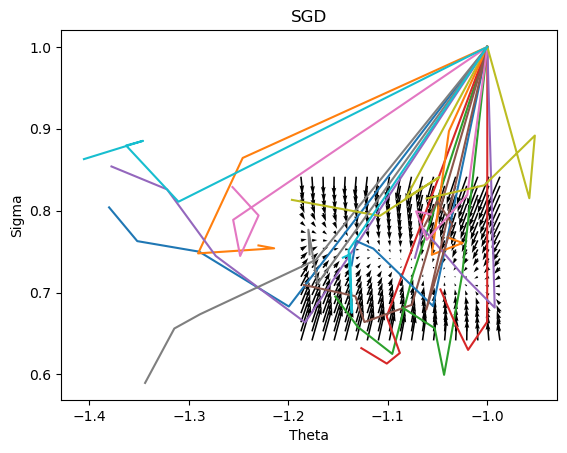

In [10]:
#len(eLes),samples,2,SGD_steps+1,3)
a=0
lev=0
c=0
e=10
#a=SGD_steps-3
print("pars_0 is: ")
print("sd is: ",sd_true)
#plt.plot(pars[a:,0].T,pars[a:,1].T)
print(pars_file[lev,:,1,a:,y])
plt.plot(pars_file[lev,c:e,1,a:,x].T,pars_file[lev,c:e,1,a:,y].T)
plt.plot(pars_file[lev,c:e,0,a:,x].T,pars_file[lev,c:e,0,a:,y].T)
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])
plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
plt.xlabel("Theta")
plt.ylabel("Sigma")
plt.title("SGD")
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()

We run a Gradient asced (not stochastic) to compare with our method

[0.02203046 0.01695795 0.00100304] [0.09151495 0.08162842 0.00484384]


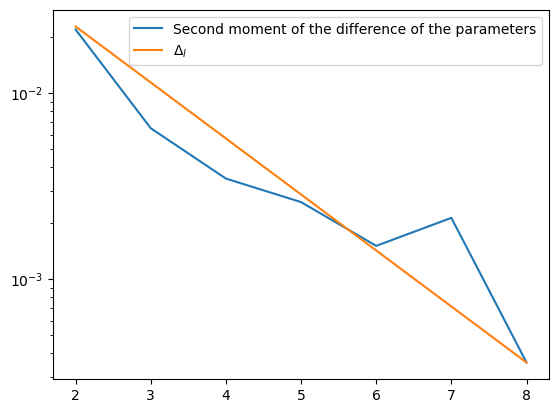

In [11]:
# change i \in {0,1,2} to chekc the behaviour of the different parameters.
i=0
#(len(eLes),samples,2,SGD_steps+1,3)
s0=2**0
sm_pars=np.mean((pars_file[:,:,0,s0]-pars_file[:,:,1,s0])**2,axis=1)
#sm_pars=np.mean((pars_file[:,:,0,-1]-pars_file[:,:,1,-1])**2,axis=1)
plt.plot(eLes,sm_pars[:,i],label="Second moment of the difference of the parameters")
plt.plot(eLes,2**(eLes[-1])/2**(eLes)*sm_pars[-1,i],label="$\Delta_l$")
plt.legend()
plt.yscale("log")
print(sm_pars[0,:],2**(eLes[-1])/2**(eLes[0])*sm_pars[-1]*2**eLes[0])

Here we assume the relation $\mathbb{E}\left(\left[\Xi_t^{l,p}\right]^2\right)=\mathcal{O}(\Delta_l N_p)$, thus, for constant $p=0$ we find the proportionality constant to be $C_L=0.08$  (we multiply by two by observing the plot and making sure the rate is above all points.). We will be taking $l0=2$

For the second moment of the level $l=0$ we have 

[0.01591915 0.08231292 0.00745315]


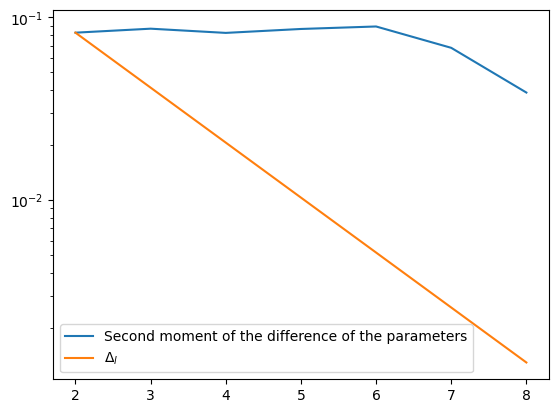

In [12]:
i=1
# len(eLes),samples,2,SGD_steps+1,3
sm_pars=np.var((pars_file[:,:,0,1]),axis=1)
plt.plot(eLes,sm_pars[:,i],label="Second moment of the difference of the parameters")
plt.plot(eLes,2**(eLes[0])/2**(eLes)*sm_pars[0,i],label="$\Delta_l$")
plt.legend()
plt.yscale("log")
#(len(eLes),samples,2,SGD_steps+1,3))   
print(sm_pars[2,:])

we take $C_{L0}=0.08$ (the maximum of all three variances).

We will build the probability distribution of the unbiased estimator independently using either $p=0$ or $l=l_0$. 

For the bias control we have 

[0.33325768 0.13297957 0.02960243] [4.60503371 0.48526534 0.15938099]


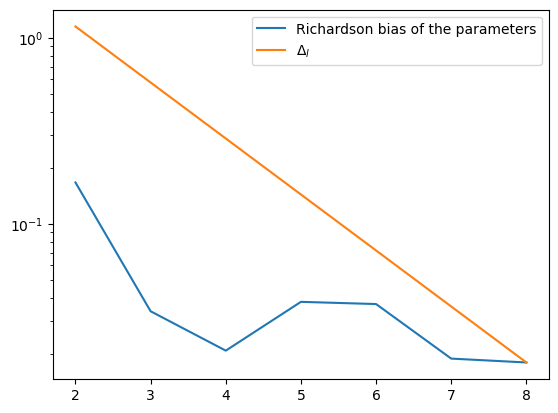

In [13]:
# change i \in {0,1,2} to chekc the behaviour of the different parameters.
i=0
# (len(eLes),samples,2,SGD_steps+1,3)
r_bias_pars=np.abs(np.mean((pars_file[:,:,0,-1]-pars_file[:,:,1,-1]),axis=1))
#sm_pars=np.mean((pars_file[:,:,0,-1]-pars_file[:,:,1,-1])**2,axis=1)
plt.plot(eLes,r_bias_pars[:,i],label="Richardson bias of the parameters")
plt.plot(eLes,2**(eLes[-1])/2**(eLes)*r_bias_pars[-1,i],label="$\Delta_l$")
plt.legend()
plt.yscale("log")
print(r_bias_pars[2,:]*2**eLes[2],2**(eLes[-1])/2**(eLes[2])*r_bias_pars[-1]*2**eLes[2])

for the bias in terms of the time discretization we have bias$=K\Delta_l$, we find $K=3.25545472$. Thus, the bias squared at level $l=9$ is projected to be 

In [173]:
K=3.25545472
print((K/2**9)**2)

4.04281060561e-05


We expect this bias rate to be smaller as we increase the number of SGD step, reaching an assymptotic bias rate for the solutions of the problem at the different discretiation values. Computing this value is beyong to the computational reach since it would take both a large value of time discretizaiton and large number of SGD steps. 

### Coupling of the parameters in the SGD steps discretization

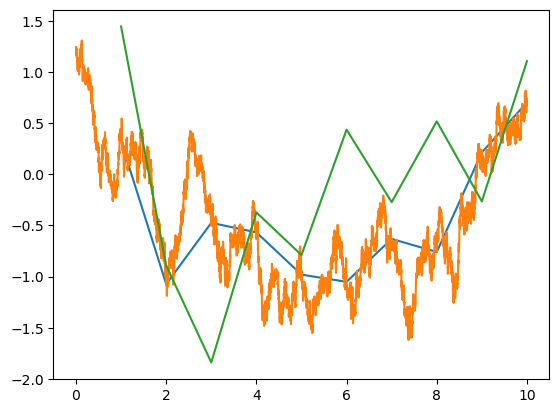

In [23]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=10
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=0.8
    sd_true=0.8
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    np.random.seed(1007)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    resamp_coef=1
    N=50
    start=time.time()
    mcmc_links=5
    SGD_steps=32*16*2*14
    #SGD_steps=2
    B=mcmc_links*SGD_steps
    fd=1e-8
    theta_in=-1
    sigma_in=1
    sd_in=1
    theta_in_fd=theta_in+fd
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    samples=40
    gamma=0.2
    alpha=0.5
    seed=2393
    x0=x0_sca+np.zeros(N)
    pars=np.zeros((samples,2,SGD_steps+1,3))
    Grads=np.zeros((samples,2,B,3))
    ch_paths=np.zeros((samples,2,B,int(T/d)))
    inputs=[]
    l=6
    v="rcv2_12"
    plt.plot(times[1:],x_reg,label="True signal")
    plt.plot(l_max_times,x_true[:-1],label="True complete signal")
    plt.plot(times[1:], obs,label="Observations")

In [25]:
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
pars_file=np.reshape(np.loadtxt(path+"Observationsdata/data3/Prl_C_SGD_ou_bridge_pars_v"+v+".txt",dtype=float),(samples,2,SGD_steps+1,3))   
Grads_file=np.reshape(np.loadtxt(path+"Observationsdata/data3/Prl_C_SGD_ou_bridge_Grads_v"+v+".txt",dtype=float),(samples,2,B,3))
# The previous version was v="57"
#pars_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_pars_v"+v+".txt",dtype=float),(samples,2,SGD_steps+1,3))   
#Grads_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_Grads_v"+v+".txt",dtype=float),(samples,2,B,3))

In [26]:
[theta_0,sigma_0,sd_0]=[theta_in,sigma_in,sd_in]
SGD_steps_an=SGD_steps
pars=np.zeros((SGD_steps_an+1,3))
Grads_test=np.zeros((SGD_steps_an+1,3))
gamma_new=0.2
#alpha=0.01
theta=theta_0
sigma= sigma_0
sd=sd_0
dim=1
dim_o=1
pars[0,:]=np.array([theta,sigma,sd])
for b_ind in range(SGD_steps_an):
    #sigma=sigmas[j]
    #print(theta,sigma)
    K=np.array([[np.exp(d*theta)]])
    G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
    H=np.array([[1]])
    D=np.array([[sd]])
    #print(K,G**2,H,D)
    Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
    Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
    Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
    Grad_R=np.zeros((3,1,1),dtype=float)
    Grad_R[0,0,0]=Grad_R_theta
    Grad_R[1,0,0]=Grad_R_sigma_s
    Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
    #print(Grad_K,Grad_R,Grad_S)
    x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
    Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
    Grads_test[b_ind]=Grad_log_lik[:,0,0]
    #print(Grads_test[b_ind,:2])
    #print(Grads_test[b_ind,0])
    theta+=gamma_new*Grads_test[b_ind,0]/(b_ind+1)**(0.5+alpha)#*((x==0)+(y==0))
    sigma*=np.exp((gamma_new*sigma*Grads_test[b_ind,1]/(b_ind+1)**(0.5+alpha)))#*((x==1)+(y==1))
    sd*=np.exp((gamma_new*sd*Grads_test[b_ind,2]/(b_ind+1)**(0.5+alpha)))#*((x==2)+(y==2))
    pars[b_ind+1]=np.array([theta,sigma,sd])
print(pars[-1])

[-1.07730325  0.79657152  0.73288581]


In [27]:
Grid_p=19
thetas=np.linspace(-1,1,Grid_p)*0.1+pars[-1,0]
sigmas=np.linspace(-1,1,Grid_p)*(pars[-1,1]+0.00021)*0.1 +pars[-1,1]
sds=np.linspace(-1,1,Grid_p)*(pars[-1,2]+0.00021)*0.1 +pars[-1,2]
Grid=np.stack((thetas,sigmas,sds))
thetass_aux=thetas+0.2
sigmas_aux=sigmas
fd_rate=1e-4
[theta_fd,sigma_fd,sd_fd]=np.array([thetas,sigmas,sds])+fd_rate*(np.zeros((3,Grid_p))+1)
x=1
y=2

For each point on the grid we compute the Gradient using the funciton KF_Grad_lik, which computes the gradient of the log likelihood analytically for Gaussian processes.

In [28]:
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
dim_o=1
[theta_0,sigma_0,sd_0]=np.array([theta_true,sigma_true,sd_true])   
[theta_0,sigma_0,sd_0]= pars[-1]
for i in range(len(Grid[x])):
    par_x=Grid[x][i]
    for j in range(len(sigmas)):
        #sigma=sigmas[j]
        par_y=Grid[y][j]
        theta=(y==0)*par_y+(x==0)*par_x+ (x!=0)*(y!=0)*theta_0
        sigma=(y==1)*par_y+(x==1)*par_x+ (x!=1)*(y!=1)*sigma_0
        sd=(y==2)*par_y+(x==2)*par_x+ (x!=2)*(y!=2)*sd_0
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        print(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

1.2 1 1 [[0.34051256]] [[0.45920783]] [[1]] [[0.65957623]] [ 1.44460581 -0.89153308 -1.8401392  -0.37249112 -0.78992596  0.43623298
 -0.27289867  0.51702718 -0.26515992  1.10535545] [[[0.34051256]]

 [[0.        ]]

 [[0.        ]]] [[[0.14042616]]

 [[0.41030749]]

 [[0.        ]]] [[[0.]]

 [[0.]]

 [[1.]]]
1.2 1 1 [[0.34051256]] [[0.45920783]] [[1]] [[0.66772174]] [ 1.44460581 -0.89153308 -1.8401392  -0.37249112 -0.78992596  0.43623298
 -0.27289867  0.51702718 -0.26515992  1.10535545] [[[0.34051256]]

 [[0.        ]]

 [[0.        ]]] [[[0.14042616]]

 [[0.41030749]]

 [[0.        ]]] [[[0.]]

 [[0.]]

 [[1.]]]
1.2 1 1 [[0.34051256]] [[0.45920783]] [[1]] [[0.67586725]] [ 1.44460581 -0.89153308 -1.8401392  -0.37249112 -0.78992596  0.43623298
 -0.27289867  0.51702718 -0.26515992  1.10535545] [[[0.34051256]]

 [[0.        ]]

 [[0.        ]]] [[[0.14042616]]

 [[0.41030749]]

 [[0.        ]]] [[[0.]]

 [[0.]]

 [[1.]]]
1.2 1 1 [[0.34051256]] [[0.45920783]] [[1]] [[0.68401275]] [ 1.4446

We run a Gradient asced (not stochastic) to compare with our method

pars_0 is: 
sd is:  0.8


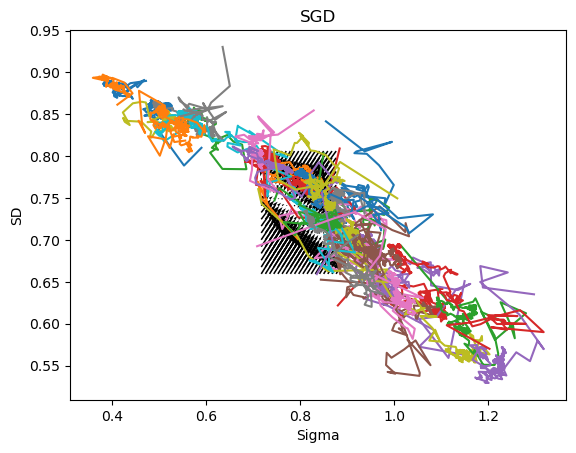

In [29]:
t=9
a=2**(t-7)
#a=0
c=0
e=-1
b=2**t
lev=0
#a=0
#b=2**8
print("pars_0 is: ")
print("sd is: ",sd_true)
#plt.plot(pars[a:b,x].T,pars[a:b,y].T)
plt.plot(pars_file[c:e,lev,a:b,x].T,pars_file[c:e,lev,a:b,y].T)
#plt.plot(pars_file[-1,:,0,a:,0].T,pars_file[-1,:,0,a:,1].T)
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])
plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
#print("The starting guesses are: ",theta_0,sigma_0)
#print("The actual parameters are: ",theta_true,sigma_true)
#max=np.max(Grads[:,:,0]**2+Grads[:,:,1]**2)
#min=np.min(Grads[:,:,0]**2+Grads[:,:,1]**2)
#print("The maximum gradient is: ",np.sqrt(max), "The minimum gradient is: ",np.sqrt(min))
labels=["Theta","Sigma","SD"]
plt.xlabel(labels[x])
plt.ylabel(labels[y])
plt.title("SGD")
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()


In [30]:
p_levels=np.array(range(int(np.log2(SGD_steps)+1)))
p_levels_0=np.array(range(int(np.log2(SGD_steps))))
S_plev_0=2**(p_levels_0)
S_plev=2**(p_levels)
print(S_plev)
pars_plev=pars_file[:,:,S_plev,:]
pars_plev_0=pars_file[:,:,int(SGD_steps/2):,:][:,:,S_plev_0,:]
print(np.mean(pars_file[:,1,-1],axis=0))
pars_or_plev=pars[S_plev]
pars_or_plev_0=pars[int(SGD_steps/2):][S_plev_0]

[   1    2    4    8   16   32   64  128  256  512 1024 2048 4096 8192]
[-1.3297605   0.79749895  0.75207495]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[[1.16289054e-02 4.69768464e-02 1.73681880e-02]
 [6.03009539e-03 1.84600837e-02 4.78489294e-03]
 [3.32428577e-03 1.35480904e-02 2.39546390e-03]
 [2.08251647e-03 3.20731493e-03 1.36193501e-03]
 [1.67984177e-03 3.71772903e-03 7.85488162e-04]
 [5.11330607e-04 1.29743794e-03 3.74087052e-04]
 [4.60621601e-04 7.90691018e-04 2.22184703e-04]
 [2.80466759e-04 2.39703248e-04 7.15933643e-05]
 [2.30708031e-04 1.86440288e-04 8.27410969e-05]
 [1.15779975e-04 6.68715690e-05 1.82418050e-05]
 [1.23420627e-04 5.54070306e-05 1.48439105e-05]
 [1.03901360e-04 2.02260749e-05 1.12969055e-05]
 [8.08985352e-05 1.50672397e-05 9.25083360e-06]]
[0.3313604  0.06171541 0.03789141]


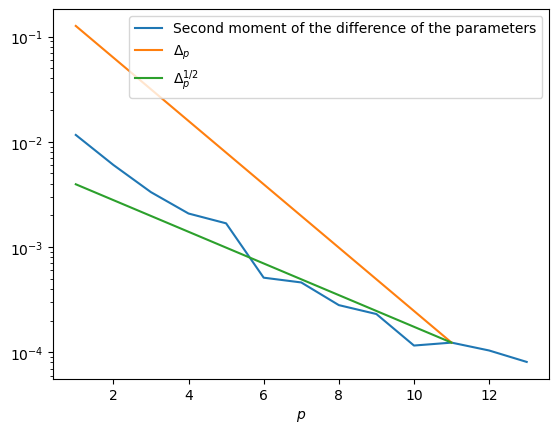

In [31]:
i=0
diff_or_square=(pars_or_plev[1:,i]-pars_or_plev[:-1,i])**2
diff_or_square_0=(pars_or_plev_0[1:,i]-pars_or_plev_0[:-1,i])**2
#print(diff_or_square)
sm_pars=np.mean((pars_plev[:,1,1:,i]-pars_plev[:,1,:-1,i])**2,axis=0)
#print(sm_pars[0])
sm_pars_0=np.mean((pars_plev_0[:,1,1:,i]-pars_plev_0[:,1,:-1,i])**2,axis=0) 
plt.plot(p_levels[1:],sm_pars,label="Second moment of the difference of the parameters")
#plt.plot(p_levels_0[1:],sm_pars_0,label="Sm 0")
#plt.plot(p_levels[1:],diff_or_square,label="GD")
#plt.plot(p_levels_0[1:],diff_or_square_0,label="GD 0")
plt.plot(p_levels[1:-2],2**(p_levels[-3])/2**(p_levels[1:-2])*sm_pars[-3],label="$\Delta_p$")
plt.plot(p_levels[1:-2],2**(p_levels[-3]/2)/2**(p_levels[1:-2]/2)*sm_pars[-3],label="$\Delta_p^{1/2}$")
#plt.plot(p_levels[1:],2**(p_levels[-1]*3)/2**(p_levels[1:]*3)*diff_or_square[-1],label="$\Delta_p^{3}$")
plt.legend()
#plt.title("\alpha=0.01,SGD_steps=gamma/(S_p)^{1/2}")
plt.xlabel("$p$")
plt.yscale("log")
print(p_levels)
print(np.mean((pars_plev[:,1,1:,:]-pars_plev[:,1,:-1,:])**2,axis=0))
print((2**(p_levels[-1])/2**(p_levels[1])*np.mean((pars_plev[:,1,1:]-pars_plev[:,1,:-1])**2,axis=0)[-1]))

We choose $s0=2**1$ and the $C_P$ to be the maximum between which is the maximum value that bounds all rates, $C_P=0.1$.

For the base level we have

In [171]:
#samples,2,p_levs,3
# volver a
sm_sing_pars=np.var((pars_plev[:,1]),axis=0)
print(sm_sing_pars)

[[0.02108155 0.06651353 0.01021472]
 [0.02597003 0.04565357 0.00999772]
 [0.02432586 0.04732138 0.00898664]
 [0.0218648  0.05186208 0.00830881]
 [0.0206999  0.04836694 0.00896641]
 [0.01719037 0.03923081 0.00757514]
 [0.01570422 0.03764687 0.00780581]
 [0.01352877 0.03822986 0.00708579]
 [0.0122418  0.03758275 0.00680395]
 [0.01097509 0.03625893 0.00626866]
 [0.01006087 0.03609479 0.00627068]
 [0.00877996 0.03497884 0.0059713 ]
 [0.00794354 0.03439536 0.00569358]
 [0.00718005 0.03344364 0.00540324]]


Similarly to $C_P$, we choose $C_P0$ to be the maximum of the three parameters 0.02108155 0.06651353 0.01021472 (s=0) . Making $C_{P0}=0.07$.

#### In this iteration we check the difference between the number of time steps

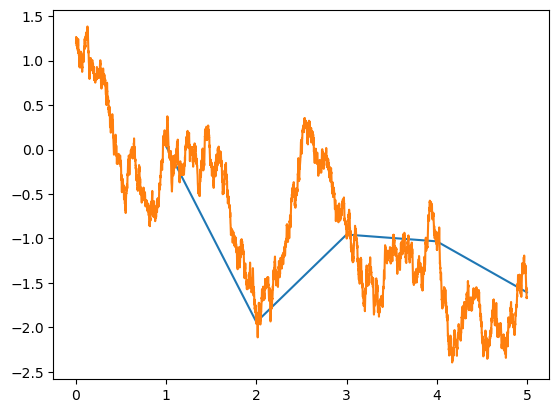

In [34]:
if True==True:
    
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=5
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=1.2
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    plt.plot(times[1:],x_reg,label="True signal")
    plt.plot(l_max_times,x_true[:-1],label="True complete signal")
    sd_true=0.6
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)

    resamp_coef=1
    N=50
    start=time.time()
    mcmc_links=100
    SGD_steps=64*2

    B=mcmc_links*SGD_steps

    fd=1e-4
    theta_in=theta_true-0.4
    theta_in_fd=theta_in+fd
    sigma_in=sigma_true-0.5
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    sd_in=sd_true+0.7

    samples=20
    gamma=0.05
    alpha=0.01
    seed=2393

    x0=x0_sca+np.zeros(N)

In [41]:
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
#pars_file=np.reshape(np.loadtxt(path+"Observationsdata/Prl_C_SGD_ou_bridge_pars_v24.txt",dtype=float),(samples,2,SGD_steps+1,3))   
#Grads_file=np.reshape(np.loadtxt("/Users/alvarem/MEGA/0KAUST/0Bridge/Observations&data/Prl_C_SGD_ou_bridge_Grads_v3.txt",dtype=float),(samples,2,B,3))

In [38]:
Grid_p=20
thetas=np.linspace(-1,1,Grid_p)*0.1+theta_true
sigmas=np.linspace(-1,1,Grid_p)*0.1+sigma_true
theta_aux=thetas+0.2
sigma_aux=sigmas
sds=np.linspace(-1,1,Grid_p)*0.1+ sd_true
fd_rate=1e-4
[theta_fd,sigma_fd,sd_fd]=np.array([thetas,sigmas,sds])+fd_rate*(np.zeros((3,Grid_p))+1)
print(thetas,sigmas)
#%%
# IN 2d
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
sd=sd_in
dim_o=1
for i in range(len(thetas)):
    theta=thetas[i]
    for j in range(len(sigmas)):
        sigma=sigmas[j]
        print(theta,sigma)
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

[-0.4        -0.38947368 -0.37894737 -0.36842105 -0.35789474 -0.34736842
 -0.33684211 -0.32631579 -0.31578947 -0.30526316 -0.29473684 -0.28421053
 -0.27368421 -0.26315789 -0.25263158 -0.24210526 -0.23157895 -0.22105263
 -0.21052632 -0.2       ] [1.1        1.11052632 1.12105263 1.13157895 1.14210526 1.15263158
 1.16315789 1.17368421 1.18421053 1.19473684 1.20526316 1.21578947
 1.22631579 1.23684211 1.24736842 1.25789474 1.26842105 1.27894737
 1.28947368 1.3       ]
-0.4 1.0999999999999999
-0.4 1.1105263157894736
-0.4 1.1210526315789473
-0.4 1.131578947368421
-0.4 1.1421052631578947
-0.4 1.1526315789473685
-0.4 1.163157894736842
-0.4 1.1736842105263157
-0.4 1.1842105263157894
-0.4 1.194736842105263
-0.4 1.2052631578947368
-0.4 1.2157894736842105
-0.4 1.2263157894736842
-0.4 1.2368421052631577
-0.4 1.2473684210526315
-0.4 1.2578947368421052
-0.4 1.268421052631579
-0.4 1.2789473684210526
-0.4 1.2894736842105263
-0.4 1.3
-0.3894736842105263 1.0999999999999999
-0.3894736842105263 1.11052631

In [39]:
[theta_0,sigma_0,sd_0]=[theta_in,sigma_in,sd_in]
SGD_steps=20
pars=np.zeros((SGD_steps+1,3))
Grads_test=np.zeros((SGD_steps+1,3))
gamma=0.01
alpha=0.01
theta=theta_0
sigma=sigma_0
sd=sd_0
pars[0,:]=np.array([theta,sigma,sd])

for b_ind in range(SGD_steps):
    #sigma=sigmas[j]
    print(theta,sigma)
    K=np.array([[np.exp(d*theta)]])
    G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
    H=np.array([[1]])
    D=np.array([[sd]])
    #print(K,G**2,H,D)
    Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
    Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
    Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
    Grad_R=np.zeros((3,1,1),dtype=float)
    Grad_R[0,0,0]=Grad_R_theta
    Grad_R[1,0,0]=Grad_R_sigma_s
    Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
    #print(Grad_K,Grad_R,Grad_S)
    x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
    Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
    Grads_test[b_ind]=Grad_log_lik[:,0,0]
    print(Grads_test[b_ind,:2])
    theta+=gamma*Grads_test[b_ind,0]/(b_ind+1)**(0.5+alpha)
    sigma+=gamma*Grads_test[b_ind,1]/(b_ind+1)**(0.5+alpha)
    #sd+=gamma*Grads_test[b_ind,2]/(b_ind+1)**(0.5+alpha)
    pars[b_ind+1]=np.array([theta,sigma,sd])


-0.7 0.7
[0.04638477 1.01235064]
-0.6995361522742952 0.7101235063748574
[0.06166076 0.99920663]
-0.6991031565843844 0.7171401595570412
[0.07187833 0.9899931 ]
-0.698692701019703 0.7227934373555982
[0.07989526 0.98249908]
-0.6982987244262985 0.7276383009792295
[0.08661491 0.97602341]
-0.6979175550883346 0.7319335221404123
[0.09245685 0.97023977]
-0.6975468043949101 0.7358241700764037
[0.0976556  0.96496546]
-0.6971848139102077 0.7394011109949186
[0.10235767 0.96008614]
-0.6968303724809012 0.7427256719851602
[0.10666171 0.95552468]
-0.6964825602515823 0.7458415340804814
[0.11063784 0.95122618]
-0.6961406566263427 0.748781103994118
[0.114338   0.94714991]
-0.6958040828222722 0.7515692046918804
[0.11780186 0.9432647 ]
-0.6954723643158803 0.7542253458309098
[0.12106056 0.93954604]
-0.6951451053323949 0.756765189331156
[0.12413907 0.93597426]
-0.694821970947505 0.7592015333148189
[0.12705772 0.93253328]
-0.6945026741805982 0.7615449946768198
[0.12983339 0.92920978]
-0.6941869664652718 0.7638

pars_0 is: 
sd is:  0.6
The starting guesses are:  -0.7 0.7
The actual parameters are:  -0.3 1.2
The maximum gradient is:  0.9740978207515081 The minimum gradient is:  0.11422567743591377


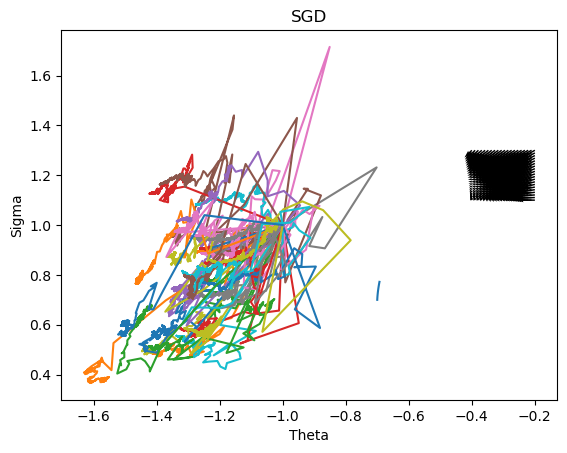

In [40]:
a=0
print("pars_0 is: ")
print("sd is: ",sd_true)
plt.plot(pars[a:,0].T,pars[a:,1].T)
plt.plot(pars_file[:,1,a:,0].T,pars_file[:,1,a:,1].T)
#plt.plot(pars_file[-1,:,0,a:,0].T,pars_file[-1,:,0,a:,1].T)
thetas_Grid,sigmas_Grid=np.meshgrid(thetas,sigmas)
plt.quiver(thetas_Grid,sigmas_Grid,Grads[:,:,0],Grads[:,:,1])
print("The starting guesses are: ",theta_0,sigma_0)
print("The actual parameters are: ",theta_true,sigma_true)
max=np.max(Grads[:,:,0]**2+Grads[:,:,1]**2)
min=np.min(Grads[:,:,0]**2+Grads[:,:,1]**2)
print("The maximum gradient is: ",np.sqrt(max), "The minimum gradient is: ",np.sqrt(min))
plt.xlabel("Theta")
plt.ylabel("Sigma")
plt.title("SGD")
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()

## Analytical Gradient for the OU process

In the following we check the gradient field for the OU process. We expect the field to be close to the actual parameters chosen given that the time we will use will be large.

In [42]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=10
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=0.8
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    sd_true=0.55
    np.random.seed(3)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    x0=x0_sca+np.zeros(N)

In [43]:
Grid_p=30
thetas=np.linspace(-1,1,Grid_p)*0.2-0.42
sigmas=np.linspace(-1,1,Grid_p)*0.2+ 0.73
sds=np.linspace(-1,1,Grid_p)*0.01+sd_true
Grid=np.stack((thetas,sigmas,sds))
print("The grid shape is:", Grid.shape)


The grid shape is: (3, 30)


In [60]:
x=0 # x is in {0,1,2}, representing theta, sigma, and sd respectively.
y=1 # y is in {0,1,2}, representing theta, sigma, and sd respectively.
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
dim_o=1
for i in range(len(Grid[x])):
    par_x=Grid[x][i]
    for j in range(len(sigmas)):
        #sigma=sigmas[j]
        par_y=Grid[y][j]
        theta=(y==0)*par_y+(x==0)*par_x+ (x!=0)*(y!=0)*theta_true
        sigma=(y==1)*par_y+(x==1)*par_x+ (x!=1)*(y!=1)*sigma_true
        sd=(y==2)*par_y+(x==2)*par_x+ (x!=2)*(y!=2)*sd_true
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

No handles with labels found to put in legend.


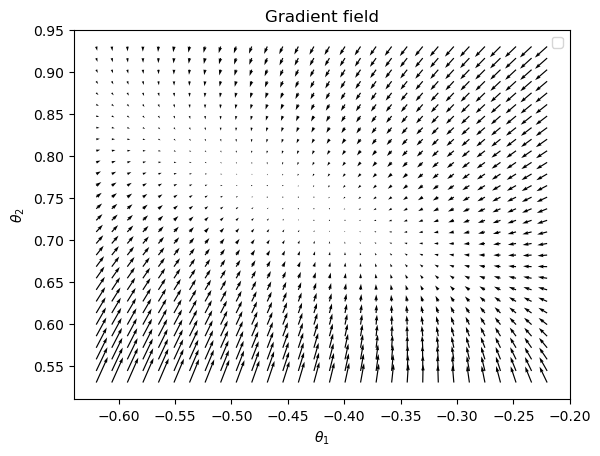

In [67]:
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])
plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
labels=[r"$\theta_1$",r"$\theta_2$","SD"]
plt.xlabel(labels[x])
plt.ylabel(labels[y])
plt.title("Gradient field")
plt.legend()
#plt.savefig("Gradiend_flow_&_SGD_1.pdf")
plt.show()

In the previous plot we can see that the maximum (gradient zero), is close to the actual values of the HMM $\theta$=-0.3, sd=0.55.

In [367]:
x=0 # x is in {0,1,2}, representing theta, sigma, and sd respectively.
y=1 # y is in {0,1,2}, representing theta, sigma, and sd respectively.
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
dim_o=1
for i in range(len(Grid[x])):
    par_x=Grid[x][i]
    for j in range(len(sigmas)):
        #sigma=sigmas[j]
        par_y=Grid[y][j]
        theta=(y==0)*par_y+(x==0)*par_x+ (x!=0)*(y!=0)*theta_true
        sigma=(y==1)*par_y+(x==1)*par_x+ (x!=1)*(y!=1)*sigma_true
        sd=(y==2)*par_y+(x==2)*par_x+ (x!=2)*(y!=2)*sd_true
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


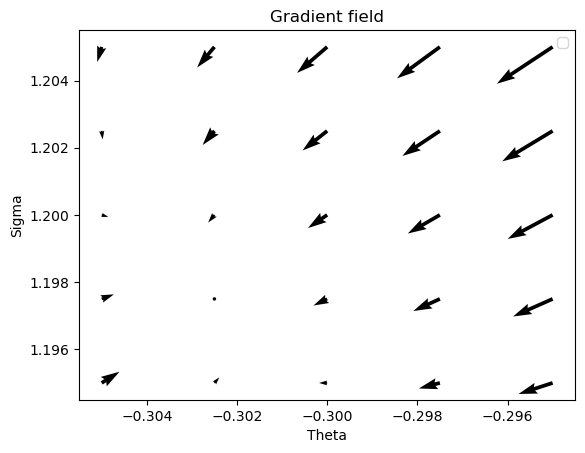

In [368]:
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])

plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
labels=["Theta","Sigma","SD"]
plt.xlabel(labels[x])
plt.ylabel(labels[y])
plt.title("Gradient field")
plt.legend()
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()

In [377]:
x=1 # x is in {0,1,2}, representing theta, sigma, and sd respectively.
y=2 # y is in {0,1,2}, representing theta, sigma, and sd respectively.
Grads=np.zeros((Grid_p,Grid_p,3))
dim=1
dim_o=1
for i in range(len(Grid[x])):
    par_x=Grid[x][i]
    for j in range(len(sigmas)):
        #sigma=sigmas[j]
        par_y=Grid[y][j]
        theta=(y==0)*par_y+(x==0)*par_x+ (x!=0)*(y!=0)*theta_true
        sigma=(y==1)*par_y+(x==1)*par_x+ (x!=1)*(y!=1)*sigma_true
        sd=(y==2)*par_y+(x==2)*par_x+ (x!=2)*(y!=2)*sd_true
        K=np.array([[np.exp(d*theta)]])
        G=np.array([[sigma*np.sqrt((np.exp(2*d*theta)-1)/(2*theta))]])
        H=np.array([[1]])
        D=np.array([[sd]])
        #print(K,G**2,H,D)
        Grad_S=np.array([[[0]],[[0]],[[1]]],dtype=float)
        Grad_R_sigma_s=(np.exp(2*theta*d)-1)/(2*theta)
        Grad_R_theta=(sigma**2/(2*theta**2))*(1-np.exp(2*theta*d)+2*d*theta*np.exp(2*theta*d))
        Grad_R=np.zeros((3,1,1),dtype=float)
        Grad_R[0,0,0]=Grad_R_theta
        Grad_R[1,0,0]=Grad_R_sigma_s
        Grad_K=np.array([[[d*np.exp(d*theta)]],[[0]],[[0]]],dtype=float)
        #print(Grad_K,Grad_R,Grad_S)
        x_kf,x_kf_smooth,Grad_log_lik=bdg.KF_Grad_lik(x0[0],dim,dim_o,K,G,H,D,obs,Grad_K,Grad_R,Grad_S)
        Grad_log_lik[1,0,0]=2*Grad_log_lik[1,0,0]*sigma
        Grads[j,i]=Grad_log_lik[:,0,0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


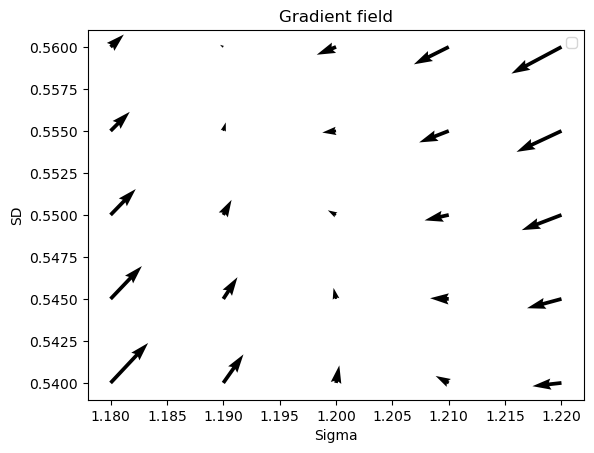

In [378]:
x_Grid,y_Grid=np.meshgrid(Grid[x],Grid[y])

plt.quiver(x_Grid,y_Grid,Grads[:,:,x],Grads[:,:,y])
labels=["Theta","Sigma","SD"]
plt.xlabel(labels[x])
plt.ylabel(labels[y])
plt.title("Gradient field")
plt.legend()
#plt.savefig("Gradiend_flow_&_SGD.pdf")
plt.show()

## Unbiased OU

In the following we present a the computation of the error-to-cost rates of the Unbiased estimator

In [2]:
if True:
    x0_sca=1.2
    x0=x0_sca
    l=10
    T=10
    t0=0
    l_d=0
    d=2**(l_d)
    theta_true=-0.3
    sigma_true=0.8
    sd_true=0.8
    np.random.seed(7)
    collection_input=[bdg.b_ou_1d,theta_true,bdg.Sig_ou_1d,sigma_true]
    resamp_coef=1
    l_max=10
    x_true= bdg.gen_gen_data_1d(T,x0_sca,l_max,collection_input)
    x_reg=bdg.cut(T,l_max,-l_d,x_true)[1:]
    times=np.array(range(t0,int(T/d)+1))*d
    l_times=np.arange(t0,T,2**(-l))
    l_max_times=np.arange(t0,T,2**(-l_max))
    np.random.seed(1007)
    d_times=np.array(range(t0+d,int(T/d)+1))*d
    obs=bdg.gen_obs(x_reg,bdg.g_normal_1d,sd_true)
    resamp_coef=1
    N=50
    start=time.time()
    mcmc_links=5 
    fd=1e-8
    theta_in=-1
    sigma_in=1
    sd_in=1
    theta_in_fd=theta_in+fd
    sigma_in_fd=sigma_in+fd
    sigma_in_aux=sigma_in
    theta_in_aux=theta_in+0.2
    sigma_in_aux_fd=sigma_in_aux+fd
    gamma=0.2
    alpha=0.5
    x0=x0_sca+np.zeros(N)
    inputs=[]
    pmax=14
    l0=4
    lmax=11  
    beta_l=1
    beta_p=1
    samples=3000
    
    #arg_cm=int(sys.argv[1])
    #arg_cm=32
    #seed=1+40*(3000*0)+samples*(arg_cm-1)
    pars=np.zeros((samples,2,2,3))
    levs=np.zeros((samples,2),dtype=int)
    CL=0.08
    CL0=0.08
    CP=0.2
    CP0=0.07
    s0=2**0

In [10]:
samples=3000
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
v="rcv4_unb_ip_i"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15", "16", "17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
pars_file=np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[0]+".txt",dtype=float),(samples,2,2,3)) 
levels_file=np.reshape(np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[0]+".txt",dtype=int),(samples,2))
#filename=path+f"Observationsdata/displays/test.{ids[0]}.{1}.out"
#times=np.array([np.loadtxt(filename, usecols=3)])
for i in range(len(labels[1:])):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i+1]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i+1]+".txt",dtype=int),(samples,2))),axis=0)  
    
# This version lacks sample 16
v="rcv4_unb_ip_ii"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15", "17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[1]+"."+labels[i]+".out", usecols=3)])),axis=0)

    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i]+".txt",dtype=int),(samples,2))),axis=0)  

# This version lacks sample 27
v="rcv4_unb_ip_iii"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "28", "29","30"])
for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[2]+"."+labels[i]+".out", usecols=3)])),axis=0)

    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i]+".txt",dtype=int),(samples,2))),axis=0)  
    # This version lacks sample 18
v="rcv4_unb_ip_iv"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27","28", "29","30"])
for i in range(len(labels)):

    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[3]+"."+labels[i]+".out", usecols=3)])),axis=0)

    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i]+".txt",dtype=int),(samples,2))),axis=0)  

# This version lacks sample 12 and 28
v="rcv4_unb_ip_vi"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "13", "14", "15","16","17", "18","19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "29","30"])
for i in range(len(labels)):

    #filename="Observationsdata/displays/test."+ids[5]+"."+labels[i]+".out"
    #with open(filename, 'r') as f:
    #    first_line = next(f).strip()  # "Parallelized processes time: 4227.7228899002075"
    #    float1 = float(first_line.split(":")[1])
        
    #times=np.concatenate((times,np.array([float1])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i]+".txt",dtype=int),(samples,2))),axis=0)  
    
# This version lacks sample 14
v="rcv4_unb_ip_vii"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11","12", "13", "15","16","17", "18","19", "20"\
    ,"21", "22", "23","25", "26","27","28","29","30"])
for i in range(len(labels)):

    #filename="Observationsdata/displays/test."+ids[6]+"."+labels[i]+".out"
    #with open(filename, 'r') as f:
    #    first_line = next(f).strip()  # "Parallelized processes time: 4227.7228899002075"
    #    float1 = float(first_line.split(":")[1])

    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,3)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+"Observationsdata/data6/Prl_Unbiased_levels_v"+v+labels[i]+".txt",dtype=int),(samples,2))),axis=0)  

In [11]:
eLes=np.arange(l0,lmax+1)
beta=beta_l
q=4
P0=(1+CL*np.sum((q+eLes[1:]-l0)*np.log(q+eLes[1:]-l0)**2/2**(beta*eLes[1:]))/\
(CL0*(q+1)*np.log(q+1)**2))**(-1)

l_cumu=bdg.P_l_cumu_gen(P0,lmax-l0+1,beta,l0)
l=eLes[bdg.sampling(l_cumu)]
l_den=np.zeros(len(eLes))
l_den[0]=P0
l_den[1:]=l_cumu[1:]-l_cumu[:-1]

# cumulative for the number of SGD steps
beta=beta_p
ePes=np.arange(0,pmax+1)
eSes=s0*2**ePes
P0=(1+CP*np.sum((ePes[1:]+q)*np.log(ePes[1:]+q)**2/eSes[1:]**(beta))\
/(CP0*(q+1)*np.log(1+q)**2))**(-1)

p_cumu=bdg.P_p_cumu_gen(P0,pmax,beta,s0)
p_den=np.zeros(len(ePes))
p_den[0]=P0
p_den[1:]=p_cumu[1:]-p_cumu[:-1]
print("The density of l is:",l_den)
print("The density of p is:",p_den)

The density of l is: [0.91420582 0.02856893 0.02124497 0.01461703 0.00953826 0.00599028
 0.00365474 0.00217996]
The density of p is: [0.18395997 0.26279996 0.19542832 0.13445918 0.08774053 0.05510338
 0.03361927 0.02005303 0.01174622 0.00677903 0.00386423 0.00217977
 0.00121862 0.00067601 0.00037247]


In [13]:
print("The parameters are:", pars[-1])
print(pars_file.shape)
unb_terms=pars_file/(l_den[levels_file[:,0]-l0,np.newaxis,np.newaxis,np.newaxis]\
*p_den[levels_file[:,1],np.newaxis,np.newaxis,np.newaxis])
#unb_terms=unb_terms[-200:]
a=0
b=-1
est=np.mean(unb_terms[:,1,1]-unb_terms[:,1,0]-(unb_terms[:,0,1]-unb_terms[:,0,0]),axis=0)
print(est)

The parameters are: [[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]
(519000, 2, 2, 3)
[-1.15853896  0.74446071  0.7601095 ]


In [14]:
np.random.seed(1)
an_mean= np.array([-1.0787,0.8027,0.7301])
print(unb_terms.shape)
samples=519000
print(np.log2(samples/10))
batches=2*60
a=13
ests=np.zeros((batches,3))
costs=np.zeros(batches)
m_costss=np.zeros((a -1))
mses=np.zeros((a -1,3))

for i in range(1,a):
    
        batch_samples=np.random.choice(samples,(2**i,batches),replace=False)
        costs=np.sum(2**(levels_file[batch_samples,0]+levels_file[batch_samples,1]),axis=0)        
        m_costss[i-1]=np.mean(costs)

        
        ests=np.mean(unb_terms[batch_samples,1,1]-unb_terms[batch_samples,1,0]-(unb_terms[batch_samples,0,1]-unb_terms[batch_samples,0,0]),axis=(0))
    
        mses[i-1]=np.mean((ests-an_mean)**2,axis=0)

(519000, 2, 2, 3)
15.663446918132605


10.329832156536423 -1.0947034758378988


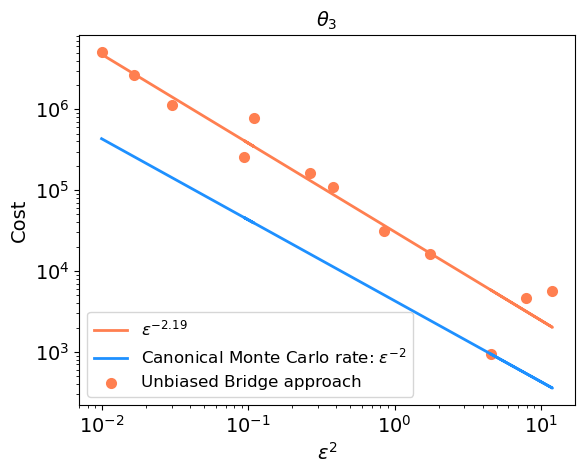

In [17]:
par_n=2
[b_0,b_1]= bdg.coef(np.log(mses[:,par_n]),np.log(m_costss))
print(b_0,b_1)  
plt.plot(mses[:,par_n],np.exp(b_0)*mses[:,par_n]**b_1,lw=2,label=rf'$\varepsilon^{{{2*b_1:.2f}}}$',c="coral")
plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]/mses[:,par_n],\
lw=2,label="Canonical Monte Carlo rate: "+rf'$\varepsilon^{{-2}}$',color="dodgerblue")    
#plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]**(3/2)/mses[:,par_n]**(3/2),lw=2,\
#label=rf'$\varepsilon^{{-3}}$',c="deepskyblue")
plt.scatter(mses[:,par_n],m_costss,label="Unbiased Bridge approach",lw=2,c="coral")
plt.xlabel(r"$\varepsilon^2$",size=14)
plt.ylabel("Cost",size=14)
plt.tick_params(axis="both",          # "x", "y", or "both"
                labelsize=14) 
pars_labels=[r"$\theta_1$",r"$\theta_2$",r"$\theta_3$"]
plt.title(pars_labels[par_n],size=14)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=12) 
#plt.savefig("OU_Cost_vs_MSE_theta_v2_3.pdf")
plt.show()

# Kangaroo example

The second part of this document is dedicated the computations presented in the paper for the logistic model and some minor tests. The test include but are not limited to:
- Test of the gradient for a noninformative observations.
- Comparison of the gradient to the Girsanov based approach.
- Comparison of the unbiased estimation to the Girsanov based approach.
- Computation of the rates of the Unbiased estimator. 
- Computation of the hyperparameters for the Unbiased estimators.

# Logistic model

In the following we show the results for the gradient of the logistic model with noninformative information (constant likelihood). The goal of this computation is to check that the gradient converges to zero. 

In [2]:
if True:
    the1,the2,the3,the4=2.397, 4.429e-3, 0.84, 17.36
    dist_params=[the1,the2,the3]
    fd=1e-10
    the1_fd=the1+fd
    the2_fd=the2+fd
    the3_fd=the3+fd

    dist_params_fd=np.array([[the1_fd,the2,the3],[the1,the2_fd,the3],[the1,the2,the3_fd]])
    w=the3**2/2+the1
    xi=the2
    sigma=the3
    alpha=2*w/sigma**2-1
    theta=sigma**2/(2*xi)
    
    rej_dist_params=[the1,the2,the3,the1,the2,the3]
    in_dist_pars=dist_params
    dist_params_0=dist_params
    dist_params_1=dist_params
    coup_in_dist_pars=[the1,the2,the3,the1,the2,the3]
    #t0=1.2
    #T=3.2
    A_til=dist_params
    fi_til=the3
    r_pars=1
    resamp_coef=1
    l=2
    d=1
    H_pars=1
    seed=6
    #obs=np.array([1.4,2,3,4.7,5.3,6.5])
    #obs_times=np.array([1.2,2,3.5,4.7,5.3,6.5])/3
    start=time.time()
    samples=40
    print("mean is: ",alpha*theta)
    #the4=1

mean is:  541.2056897719575


In [3]:
    
if True:
    rkdata= np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Kangaroo_data.txt")
    samples=40
    B=2000*7
    obs=rkdata[:3,:2]
    obs_times=rkdata[:3,2]
    #obs=np.array([1.4,2,3,4.7,5.3,6.5])
    #obs_times=np.array([1.2,2,3.5,4.7,5.3,6.5])/3
    inputs=[]
    start=time.time()
    l0=3
    Lmax=9
    #arg_cm=int(sys.argv[1])
    #arg_cm=32
    d=1
    T=len(obs_times)*d
    eLes=np.array(range(l0,Lmax+1))
    
    the1,the2,the3,the4=2.397, 4.429e-3, 0.84, 17.36
    dist_params=[the1,the2,the3]
    in_dist_pars=dist_params
    fd=1e-10
    the1_fd=the1+fd
    the2_fd=the2+fd
    the3_fd=the3+fd
    dist_params_fd=np.array([[the1_fd,the2,the3],[the1,the2_fd,the3],[the1,the2,the3_fd]])

In [4]:
pwd

'/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Tests results'

In [ ]:
v="GS_ip_xi"
labels=np.array(["1", "2", "3" ,"4" ,"5", "6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15", "16", "17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
print(labels.shape)
mcmcs=np.reshape(\
    np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata/data10/Prl_Grad_smooth_mcmc_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),int(T/d))) 
Grads=np.reshape(np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/\
Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/\
Observationsdata/data10/Prl_Grad_smooth_Grads_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),4))
for i in range(len(labels[1:])):
    mcmcs=np.concatenate((mcmcs,np.reshape(\
    np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata/data10/Prl_Grad_smooth_mcmc_v"+v+labels[i+1]+".txt",dtype=float),(samples,len(eLes),int(T/d))) ),axis=0)  
    Grads=np.concatenate((Grads,np.reshape(\
    np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/\
Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata/data10/Prl_Grad_smooth_Grads_v"+v+labels[i+1]+".txt",dtype=float),(samples,len(eLes),4))) ,axis=0)

(30,)


In [ ]:
par=2
print(Grads[:,2,par])
mask=np.isnan(Grads[:,2,par])
indices=np.where(mask==True)
print(indices)
#print(Grads[781,2,:])
#print(780/30)
Grads_mean=np.abs(np.mean(Grads,axis=0))
Grads_var=np.var(Grads,axis=0)
print(Grads_mean)
Grads_mean_ub=Grads_mean+np.sqrt(Grads_var)*1.96/np.sqrt(samples)
Grads_mean_lb=Grads_mean-np.sqrt(Grads_var)*1.96/np.sqrt(samples)
plt.plot(eLes,Grads_mean[:,par],label="Grad")
plt.plot(eLes,Grads_mean_ub[:,par],label="Grad UB")
plt.plot(eLes,Grads_mean_lb[:,par],label="Grad LB")
plt.plot(eLes,Grads_mean[-1,par]*np.sqrt(2**(eLes[-1]))/np.sqrt(2**(eLes)),label="$\Delta_l$")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
t=-1
lev=1
mean=np.mean(mcmcs,axis=(0))
print(mean[:,t])
var=np.var(mcmcs,axis=(0))
bias=np.abs(mean-theta*alpha)   
bias_ub=bias+np.sqrt(var)*1.96/np.sqrt(samples)
bias_lb=bias-np.sqrt(var)*1.96/np.sqrt(samples)
plt.plot(eLes,bias[:,t],label="Bias")
plt.plot(eLes,bias_ub[:,t],label="Bias UB")
plt.plot(eLes,bias_lb[:,t],label="Bias LB")
plt.plot(eLes,bias[0,t]*2**(eLes[0])/2**(eLes),label="$\Delta_l$")
plt.yscale("log")
plt.legend()

## Kangaroo example

In the following we compute a comparison between our approach and Elsiddigss' approach (Unbiased Parameter Estimation for Partially Observed Diffusions, uses Girsanov instead of Bridges). We compare quantities related to the score function, and since Elsiddigss's approach cannot compute the derivative w.r.t. parameters related to the diffusion coefficient we only compare the rest.  

### Unbiased estimator

The levels of the unbiased estimators will be $l=l_0+1$ and $p=1$, this way our unbiased estimator will have both a difference between time and SGD steps discreatizations. 

The rest of the parameters are as follow

In [ ]:
fd=1e-10 # Finite difference parameter
rkdata= np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Kangaroo_data.txt") 
obs=rkdata[:,:2] # Two columns series observations
obs_times=rkdata[:,2] # Observation times

# Static parameters of the model
the1,the2,the3,the4=2.397, 4.429e-3, 0.84, 17.631

# Treatment of the parameters to fit the functions
the3_fd=the3+fd
the3_fd_1=the3+fd/2
dist_params=np.array([the1,the2,the3])
dist_params_fd=np.array([[the1+fd,the2,the3],[the1,the2+fd,the3],[the1,the2,the3+fd]])
dist_params_fd_1=np.array([[the1+fd/2,the2,the3],[the1,the2+fd/2,the3],[the1,the2,the3+fd/2]])
rej_dist_params=[the1,the2,the3,the1,the2,the3]
in_dist_pars=dist_params
dist_params_0=dist_params
dist_params_fd_0=dist_params_fd
dist_params_1=dist_params
coup_in_dist_pars=[the1,the2,the3,the1,the2,the3]
A_til=dist_params
fi_til=the3
r_pars=1
resamp_coef=1
d=1
H_pars=1
# Number of independent samples of the unbiased estimator per core
samples=40
# level of time discretization
l=5
N=10 # number of particles, N=500 for the approximation fo the truth
mcmc_links=1 # nuber of links that form a SGD step (averaged estimation of the score)
SGD_steps=2 # Number of SGD steps
B=mcmc_links*SGD_steps
gamma=0.0005
gammas=[2,3,0.0,10] # gamma*gammas is the SGD step lenght
ast=0
K=2*(2**ast-1)

alpha=0.5 # alpha parametrizes the step size
d=1
T=len(obs_times)*d

For the results of the paper we use both paralellization with the multiprocess package and embarrasing paralellization with Ibex (30 parallel nodes), the additional files to perform the parallelization are in the Github repository (INSERT LINK), such files are "Bridge_parallelization.py" (search for id 40266109(approximated truth) and 40265156 for the low particle example) and "par_unb.slurm". The approximated truth with matlab is was computed with the file "Gir_matlab_truth_final.m" and the low particle example with "Gir_matlab_truth_final.m".

For a local computation of unbiased estimator run the following cell with the desired number of samples.

In [ ]:
samples=2 # Number of independent samples of the stochastic approximation.
seed=235
ch_paths_0=np.zeros((samples,B+K,int(T/d)))
ch_paths_1=np.zeros((samples,B+K,int(T/d)))
pars_0=np.zeros((samples,SGD_steps+1+ast,4))
pars_1=np.zeros((samples,SGD_steps+1+ast,4))

for i in range(samples):
            ch_path_0,ch_path_1,par_0,par_1 =bdg.Gen_C_SGD_bridge(bdg.rej_max_coup_gamma_in_dist,\
            coup_in_dist_pars,bdg.Grad_log_gamma_in_dist,\
            bdg.b_log, dist_params,bdg.Sig_gbm_1d,the3,bdg.b_log_aux,bdg.Sig_aux_gbm_1d,\
            bdg.r_log_normal,bdg.H_log_normal,bdg.update_log_functs,\
            bdg.rej_max_coup_log_normal_2,[the1,the2,the3,the1,the2,the3],\
            obs,obs_times,bdg.log_g_nbino_den,the4,bdg.trans_log_normal,\
            bdg.Grad_trans_log_normal, bdg.trans_prop_log_normal_2,[the1,the2,the3],\
            bdg.Grad_log_g_nbino, resamp_coef, l, d,N,seed,fd,mcmc_links,\
            SGD_steps,gamma,gammas, alpha, ast,bdg.update_pars_logis)
            ch_paths_0[i]=ch_path_0
            ch_paths_1[i]=ch_path_1
            pars_0[i]=par_0
            pars_1[i]=par_1


The computation of the unbiased estimator using the Girsanov approach is made in the file Gir_matlab.m. This file is slightly modified w.r.t. to the one used in "Unbiased Parameter Estimation for Partially Observed Diffusions" to fit the comparison, meaning that we use the original representation of the logistic SDE and we change the distribution of the process at time $t_0$. 

The time discretization used in Gir_matlab.m is different in two ways. The first one is that in our approach we fit the time discretization to match the observation times, this leads to slightly different time step lenghts; in the Girsanov approach an uniform time step lenght is used and the observation times are approximated to fit the time discretization. The other difference is the meaning of the base level $l_0$, there is an approximate difference of 3.5 in the levels, i.e., $2^{-l_{0, Back}}=2^{-(l_{0, Gir}-3.5)}$, where $l_{0, Back}$ is the base level of the backward approach and $l_{0, Gir}$ is the base level fo the Girsanov approaximation. The first difference decreases as we increase the levels, for the second difference we set $l_{0, Back}=l_{0, Gir}-4$ . ّIn order to make the comparison meaningful we average the truth computed with both algorithms and we use this average as the approaximate truth. 

For the truth we use a large chain "mcmc_step=500" and a large number of particles "N=500" in order to both reduce the burnout period of the chain and have a good mixing rate.

In the following we upload the data obtained from Ibex

In [ ]:
v="GCSb_comparison_ix"#+str(arg_cm)
N=10 # Number of particles
folder="data24"
eLes=[5]
SGD_steps=2
ast=0
samples=40
mcmc_links=500
B=mcmc_links*SGD_steps

labels=np.array(["1", "2", "3" ,"4","5","6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
pars_0=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
pars_1=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
Grads_0=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4)) 
Grads_1=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4))
ch_paths_0=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_0_v"+v+labels[0]+".txt",dtype=float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d))) 
ch_paths_1=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_1_v"+v+labels[0]+".txt",dtype     =float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d))) 

for i in range(len(labels[1:])):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_0=np.concatenate((pars_0,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+1+ast,4))),axis=0) 

    pars_1=np.concatenate((pars_1,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+1+ast,4))),axis=0) 

    Grads_0=np.concatenate((Grads_0,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+ast,4))),axis=0)
    Grads_1=np.concatenate((Grads_1,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+ast,4))),axis=0)

    ch_paths_0=np.concatenate((ch_paths_0,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),B+K,int(len(obs_times)/d))),),axis=0)

    ch_paths_1=np.concatenate((ch_paths_1,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),B+K,int(len(obs_times)/d))),),axis=0)

In [ ]:
v="GCSb_comparison_viii"#+str(arg_cm)
N=500 # Number of particles
folder="data24"
eLes=[5]
SGD_steps=2
ast=0
samples=40
mcmc_links=500
B=mcmc_links*SGD_steps
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"

labels=np.array(["1", "2", "3" ,"4","5","6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"

pars_0_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
pars_1_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
Grads_0_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4)) 
Grads_1_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4))
ch_paths_0_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_0_v"+v+labels[0]+".txt",dtype=float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d))) 
ch_paths_1_truth=np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_1_v"+v+labels[0]+".txt",dtype=float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d))) 

for i in range(len(labels[1:])):
    pars_0_truth=np.concatenate((pars_0_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+1+ast,4))),axis=0) 

    pars_1_truth=np.concatenate((pars_1_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_pars_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+1+ast,4))),axis=0) 

    Grads_0_truth=np.concatenate((Grads_0_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+ast,4))),axis=0)
    Grads_1_truth=np.concatenate((Grads_1_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_Grads_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),SGD_steps+ast,4))),axis=0)

    ch_paths_0_truth=np.concatenate((ch_paths_0_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_0_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),B+K,int(len(obs_times)/d))),),axis=0)

    ch_paths_1_truth=np.concatenate((ch_paths_1_truth,np.reshape(\
    np.loadtxt(path+"Observationsdata/"+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_1_v"+v+labels[i]+".txt",\
    dtype=float),(samples,len(eLes),B+K,int(len(obs_times)/d))),),axis=0) 

In the following cells we upload the data coming from the Girsanov approach for the approximate truth and the low particle example.

In [ ]:
number="31" # change to 28 to get 1200 iterCount
iterCount=500
# number of particle N=500
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
N_0=1000 # This parameters does not represent the number of particles but rather the B.
x1_matlab_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/X1_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,len(obs_times)))
x2_matlab_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/X2_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,len(obs_times)))

Grads2_matlab_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/Grads2_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,4))/np.array([the1,the2,the3,the4])
Grads1_matlab_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/Grads1_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,4))/np.array([the1,the2,the3,the4])

thetas_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/thetas_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0+1 ,4))
thetas_p_level_truth=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/thetas_p_level_"+number+".txt",dtype=float,delimiter=','),(iterCount ,4))

In [ ]:
number="30" # change to 30 to get 1200 iterCount
iterCount=1200
# number of particle N=10
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
N_0=1000 # This parameters does not represent the number of particles but rather the B.
x1_matlab=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/X1_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,len(obs_times)))
x2_matlab=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/X2_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,len(obs_times)))

Grads2_matlab=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/Grads2_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,4))/np.array([the1,the2,the3,the4])
Grads1_matlab=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/Grads1_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0 ,4))/np.array([the1,the2,the3,the4])

thetas=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/thetas_sm_"+number+".txt",dtype=float,delimiter=','),(iterCount,N_0+1 ,4))
thetas_p_level=np.reshape(np.loadtxt(path+"Girsanov approach matlab/Observationsdata_matlab/thetas_p_level_"+number+".txt",dtype=float,delimiter=','),(iterCount ,4))

In [ ]:
Grads_0_mean=np.mean(Grads_0_truth,axis=0)[0,0]
Grads_1_mean=np.mean(Grads_1_truth,axis=0)[0,0]
Grads_1_m_mean=np.mean(Grads1_matlab_truth[:,:int(N_0/2)],axis=(0,1))
Grads_2_m_mean=np.mean(Grads2_matlab_truth[:,:int(N_0/2)],axis=(0,1))
Grads_0_var=np.var(Grads_0_truth,axis=0)[0,0]
Grads_1_var=np.var(Grads_1_truth,axis=0)[0,0]
Grads_1_m_var=np.var(Grads1_matlab_truth[:,:int(N_0/2)],axis=(0,1)) # We only consider the first N_0/2 chain steps since
# these are the ones computed with the initial parameters.
Grads_2_m_var=np.var(Grads2_matlab_truth[:,:int(N_0/2)],axis=(0,1))
print((Grads_1_m_mean-Grads_1_mean)*100/np.minimum(np.abs(Grads_1_m_mean),np.abs(Grads_1_mean)))
Grads_1_truth_av=(Grads_1_mean+Grads_1_m_mean)/2 # level 0 in my algoritm means levels 2 in Siddig's algorithm

In the following we have the boxplots of the gradients 

(1200,)


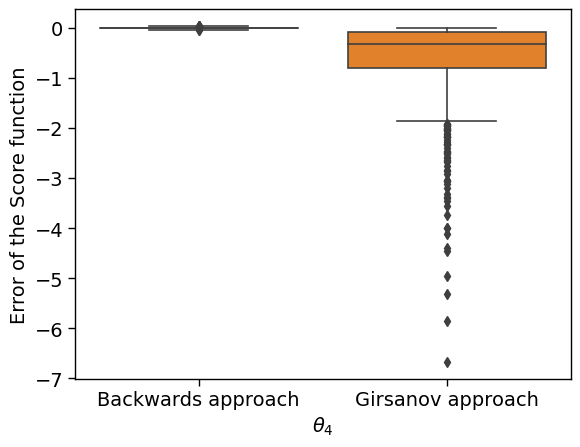

The variance of the Backward gradient is:  [3.31756246e-02 4.54148847e+03 4.95545095e+00 1.10918610e-04]
The variance of the Girsanov gradient is:  [1.68280645e+00 9.05807170e+05 0.00000000e+00 5.35660603e-02]
The ration of the variances is:  [0.01971446 0.00501375        inf 0.00207069]


/var/folders/s7/spn734tj7ds3vkl0g1djtdw0dd0y22/T/ipykernel_38525/3259244833.py:28: RuntimeWarning: divide by zero encountered in true_divide
  print("The ration of the variances is: ",Grads_1_var/Grads_1_m_var)


In [99]:
par=3
fontsize=14
lw=3

labels=np.array([r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"])
labels_str=np.array(["theta_1", "theta_2", "theta_3", "theta_4"])
print( ((np.mean(Grads1_matlab[:,:int(N_0/2),par],axis=1)- Grads_1_truth_av[par])**2).shape)
df = pd.DataFrame({
    labels[par]: np.repeat(["Backwards approach", "Girsanov approach"], 1200),
    "Error of the Score function": np.concatenate([
       (Grads_1[:,0,0,par]- Grads_1_truth_av[par]),
        (np.mean(Grads1_matlab[:,:int(N_0/2),par],axis=1)- Grads_1_truth_av[par])
    ])
})
#sns.set_context("paper", font_scale=1.5) # "paper", "notebook", "talk", "poster"
plt.rcParams['axes.labelsize'] = 14  # Axis labels
plt.rcParams['xtick.labelsize'] = 14  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick labels
plt.rcParams['axes.titlesize'] = 14  # Plot
sns.boxplot(x=labels[par], y="Error of the Score function", data=df)
#plt.title("Boxplot Example with Seaborn")
#plt.savefig("Boxplot_error_Score_function"+labels_str[par]+".pdf")

plt.show()

print("The variance of the Backward gradient is: ",Grads_1_var)
print("The variance of the Girsanov gradient is: ",Grads_1_m_var)
print("The ration of the variances is: ",Grads_1_var/Grads_1_m_var)

In [103]:
unb_est_truth=pars_1_truth[:,0,2,:]-pars_1_truth[:,0,1,:]-(pars_0_truth[:,0,2,:]-pars_0_truth[:,0,1,:])
unb_est_mean_truth=np.mean(unb_est_truth,axis=0)
unb_est_var_truth=np.var(unb_est_truth,axis=0)
thetas_p_level_mean_truth=np.mean(thetas_p_level_truth,axis=0)
thetas_p_level_var_truth=np.var(thetas_p_level_truth,axis=0)
print(unb_est_mean_truth)
print(thetas_p_level_mean_truth)
True_unbiased_av=(unb_est_mean_truth+thetas_p_level_mean_truth)/2
print(True_unbiased_av)

[-3.06553333e-04 -1.62500000e-07  0.00000000e+00  7.72691667e-05]
[-5.70400948e-05  5.66695230e-05  0.00000000e+00 -9.91826398e-05]
[-1.81796714e-04  2.82535115e-05  0.00000000e+00 -1.09567366e-05]


In [104]:
unb_est=pars_1[:,0,2,:]-pars_1[:,0,1,:]-(pars_0[:,0,2,:]-pars_0[:,0,1,:])
unb_est_mean=np.mean(unb_est,axis=0)
unb_est_var=np.var(unb_est,axis=0)
thetas_p_level_mean=np.mean(thetas_p_level,axis=0)
thetas_p_level_var=np.var(thetas_p_level,axis=0)
print(unb_est_mean)
print(thetas_p_level_mean)

[-2.82554167e-04 -2.25833333e-07  0.00000000e+00  6.73825000e-05]
[-4.16847959e-05  6.47588580e-05  0.00000000e+00 -1.95291263e-03]


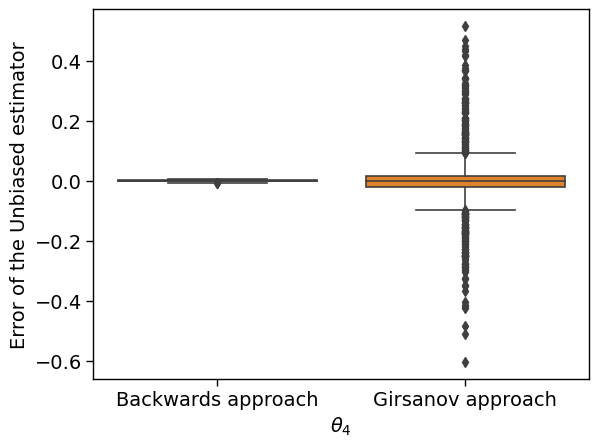

The variance of the Backward unbiased estimator is:  [3.50774629e-07 5.09832639e-13 0.00000000e+00 3.60432633e-06]
The variance of the Girsanov unbiased estimator is:  [1.18387639e-05 1.96815880e-05 0.00000000e+00 1.10585127e-02]
The ration of the variances is:  [2.96293289e-02 2.59040398e-08            nan 3.25932285e-04]


/var/folders/s7/spn734tj7ds3vkl0g1djtdw0dd0y22/T/ipykernel_38525/3076075420.py:25: RuntimeWarning: invalid value encountered in true_divide
  print("The ration of the variances is: ",unb_est_var/thetas_p_level_var)


In [109]:
par=3
labels_str=np.array(["theta_1", "theta_2", "theta_3", "theta_4"])
labels=np.array([r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"])
#True_unbiased=[-1.52047046e-04 , 1.46149812e-05 , 0.00000000e+00 ,-8.83667375e-05] # obtaiend with Grads1_sm_27 and GCSb_comparison_ix

df = pd.DataFrame({
    labels[par]: np.repeat(["Backwards approach", "Girsanov approach"], 1200),
    "Error of the Unbiased estimator": np.concatenate([
       (unb_est[:,par]- True_unbiased_av[par]),
        (thetas_p_level[:,par]- True_unbiased_av[par])
    ])
})
plt.rcParams['axes.labelsize'] = 14  # Axis labels
plt.rcParams['xtick.labelsize'] = 14  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick labels
plt.rcParams['axes.titlesize'] = 14  # Plot

sns.boxplot(x=labels[par], y="Error of the Unbiased estimator", data=df,whis=2.0)
#plt.title("Boxplot Example with Seaborn")

plt.savefig("Boxplot_error_unb_estimator"+labels_str[par]+".pdf")
plt.show()
print("The variance of the Backward unbiased estimator is: ",unb_est_var)
print("The variance of the Girsanov unbiased estimator is: ",thetas_p_level_var)
print("The ration of the variances is: ",unb_est_var/thetas_p_level_var)

# Unbiased estimator rate for the logistic diffusion

#### In the following we load the results of the computation of the Unbiased estimator, process them and get the error-to-cost rates.

In [356]:
# Parameters of the system
if True:
    fd=1e-10
    rkdata= np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Kangaroo_data.txt") 
    obs=rkdata[:,:2] # Two columns series observations
    obs_times=rkdata[:,2] # Observation times

    smean=np.mean(obs)  
    svar=np.var(obs)
    smean=np.mean(obs)  
    svar=np.var(obs)
    the1=2
    the2=the1/smean
    the3=0.8
    the4=np.sqrt(smean+the3**2/(2*the2))/np.sqrt(svar/smean-1-the3**2/(2*the2))    
    the4=10
    #the1,the2,the3,the4 =1.45742747e+00 ,2.74535000e-03, 6.71387000e-01, 1.86269606e+01
    #the1,the2,the3,the4=2.397, 4.429e-3, 0.84, 17.631
    the3_fd=the3+fd
    the3_fd_1=the3+fd/2
    w=the3**2/2+the1
    xi=the2
    sigma=the3
    alpha=2*w/sigma**2-1
    theta=sigma**2/(2*xi)
    dist_params=np.array([the1,the2,the3])
    dist_params_fd=np.array([[the1+fd,the2,the3],[the1,the2+fd,the3],[the1,the2,the3+fd]])
    dist_params_fd_1=np.array([[the1+fd/2,the2,the3],[the1,the2+fd/2,the3],[the1,the2,the3+fd/2]])
    rej_dist_params=[the1,the2,the3,the1,the2,the3]
    in_dist_pars=dist_params
    dist_params_0=dist_params
    dist_params_fd_0=dist_params_fd
    dist_params_1=dist_params
    
    coup_in_dist_pars=[the1,the2,the3,the1,the2,the3]
    #t0=1.2
    #T=3.2
    A_til=dist_params
    fi_til=the3
    r_pars=1
    resamp_coef=1
    d=1
    H_pars=1

    samples=100
    l0=3
    Lmax=8
    N=50
    mcmc_links=1
    SGD_steps=2**2
    B=mcmc_links*SGD_steps
    gamma=0.005
    gammas=[2,3,0.6,6]
    ast=0
    K=2*(2**ast-1)
    alpha=0.5
    #arg_cm=int(sys.argv[1])
    arg_cm=1
    d=1
    T=len(obs_times)*d
    eLes=np.array(range(l0,Lmax+1))

In [358]:
# we load the files with the unbiased estimators
v="GU8_ip_i"
folder="data25"
labels=np.array(["1", "2", "3" ,"4","5","6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
pars_file=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[0]+".txt",dtype=float),(samples,2,2,4)) 
levels_file=np.reshape(np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[0]+".txt",dtype=float),(samples,2))
#filename=f"Observationsdata/displays/test.{ids[0]}.{1}.out"
#times=np.array([np.loadtxt(filename, usecols=3)])
for i in range(len(labels[1:])):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i+1]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i+1]+".txt",dtype=float),(samples,2))),axis=0)  

v="GU8_ip_ii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0)  

v="GU8_ip_iii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_iv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_v"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_vi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 
v="GU8_ip_vii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_viii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_ix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_x"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xvix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_xxi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxvi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 




v="GU8_ip_xxix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxvi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

levels_file=levels_file.astype(int)
print(pars_file.shape)

(117000, 2, 2, 4)


In [359]:
# compute the distriubtions of the levels
if True:
    samples=100
    N=50
    mcmc_links=1
    #SGD_steps=10000
    #B=SGD_steps*mcmc_links
    gamma=0.005
    gammas=[2,3,0.6,6]
    alpha=0.5
    ast=2
    K=2*(2**ast-1)  
    CL=1.5e-7
    CL0=3e-8
    CP=3e-8
    CP0=3.28e-8
    s0=2**0
    
    l0=3
    lmax=8

    pmax=lmax+3
    beta_l=1/2
    beta_p=1
    #arg_cm=int(sys.argv[1])
    #arg_cm=32
    d=1
    T=len(obs_times)*d
eLes=np.arange(l0,lmax+1)
beta=beta_l
q=4
P0=(1+CL*np.sum((q+eLes[1:]-l0)*np.log(q+eLes[1:]-l0)**2/2**(beta*eLes[1:]))/\
(CL0*(q+1)*np.log(q+1)**2))**(-1)

l_cumu=bdg.P_l_cumu_gen(P0,lmax-l0+1,beta,l0)
l=eLes[bdg.sampling(l_cumu)]
l_den=np.zeros(len(eLes))
l_den[0]=P0
l_den[1:]=l_cumu[1:]-l_cumu[:-1]

# cumulative for the number of SGD steps
beta=beta_p
ePes=np.arange(0,pmax+1)
eSes=s0*2**ePes
P0=(1+CP*np.sum((ePes[1:]+q)*np.log(ePes[1:]+q)**2/eSes[1:]**(beta))\
/(CP0*(q+1)*np.log(1+q)**2))**(-1)

p_cumu=bdg.P_p_cumu_gen(P0,pmax,beta,s0)
p_den=np.zeros(len(ePes))
p_den[0]=P0
p_den[1:]=p_cumu[1:]-p_cumu[:-1]
print("The levels are: ",eSes,eLes )
print("The density of l is:",l_den)
print("The density of p is:",p_den)

The levels are:  [   1    2    4    8   16   32   64  128  256  512 1024 2048] [3 4 5 6 7 8]
The density of l is: [0.14139322 0.17674152 0.18587279 0.18085634 0.16690086 0.14823527]
The density of p is: [0.41388935 0.18927867 0.14075502 0.09684269 0.06319412 0.03968758
 0.02421389 0.01444296 0.00846008 0.00488252 0.00278316 0.00156996]


In [352]:
print(pars_file.shape)
unb_terms=pars_file/(l_den[levels_file[:,0]-l0,np.newaxis,np.newaxis,np.newaxis]\
*p_den[levels_file[:,1],np.newaxis,np.newaxis,np.newaxis])
#unb_terms=unb_terms[-200:]
a=0
b=-1
est=np.mean(unb_terms[:,1,1]-unb_terms[:,1,0]-(unb_terms[:,0,1]-unb_terms[:,0,0]),axis=0)
print(est)


(117000, 2, 2, 4)
[1.88232309e+00 3.68818684e-03 7.76121969e-01 1.92397813e+01]


In [360]:
# compute the unbiased estimators for different number of averages
if True:
    seed=125
    np.random.seed(seed)
    print("The seed is: ",seed)
    an_mean=[1.82678073e+00, 3.55565000e-03, 7.57901675e-01 ,1.93363930e+01]
    samples_total=pars_file.shape[0]   
    print(np.log2(samples_total/10))
    #print(np.log2(samples_total))
    z=11
    batches=14*4
    ests=np.zeros((batches,4))
    costs=np.zeros(batches)
    times=np.zeros(batches)
    m_times=np.zeros((z-1))
    v_times=np.zeros((z-1))
    m_costss=np.zeros((z -1))
    mses=np.zeros((z -1,4))
    biases=np.zeros((z -1,4))
    vars=np.zeros((z -1,4))
    for i in range(1,z):

        batch_samples=np.random.choice(samples_total,(2**(i+1),batches),replace=False)
        costs=np.sum(2**(levels_file[batch_samples,0]+levels_file[batch_samples,1]),axis=0)        
        ests=np.mean(unb_terms[batch_samples,1,1]-unb_terms[batch_samples,1,0]-(unb_terms[batch_samples,0,1]-unb_terms[batch_samples,0,0]),axis=0)
        
        #print("The
        """for j in range(batches):
            batch_samples=np.random.choice(samples_total,2**(i+1),replace=False)
            costs[j]=np.sum(2**(levels_file[batch_samples,0]+levels_file[batch_samples,1]))        
            ests[j]=np.mean(unb_terms[batch_samples,1,1]-unb_terms[batch_samples,1,0]-(unb_terms[batch_samples,0,1]-unb_terms[batch_samples,0,0]),axis=0)
            #print("The times are: ",ct_hours[batch_samples//samples])
            #times[j]=np.max(ct_hours[batch_samples//samples])
        #m_times[i-1]= np.mean(times)
        #v_times[i-1]= np.var(times)"""
        m_costss[i-1]=np.mean(costs)
        mses[i-1]=np.mean((ests-an_mean)**2,axis=0)
        biases[i-1]=np.mean(ests,axis=0)-an_mean
        vars[i-1]=np.var(ests,axis=0)

The seed is:  125
13.51422090935813


11.393776934717367 -1.0753335235972745


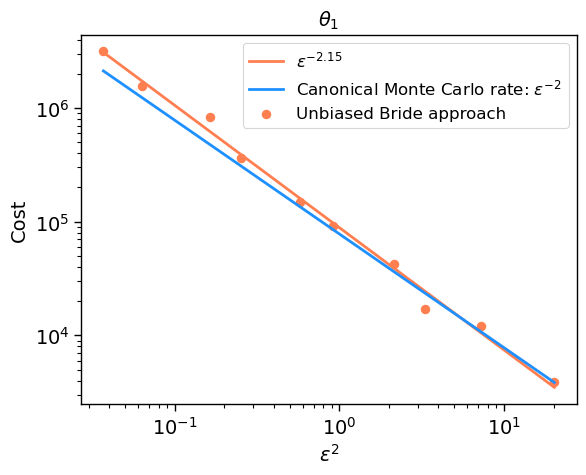

In [361]:
if True:
    par_n=0
    [b_0,b_1]= bdg.coef(np.log(mses[:,par_n]),np.log(m_costss))
    print(b_0,b_1)  
    #print(b_0,b_1)
    #print(mses[:,par_n])
    #plt.plot(biases[:,par_n]**2,m_costss,label="Unbiased Bride approach",ls='--',lw=2,marker='o',markersize=5)
    #plt.plot(vars[:,par_n],m_costss,label="vars",ls='--',lw=2,marker='o',markersize=5)
    plt.plot(mses[:,par_n],np.exp(b_0)*mses[:,par_n]**b_1,lw=2,\
    label=rf'$\varepsilon^{{{2*b_1:.2f}}}$',color="coral")
    plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]/mses[:,par_n],lw=2,\
    label="Canonical Monte Carlo rate: "+rf'$\varepsilon^{{-2}}$',color="dodgerblue")    
    #plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]**(3/2)/mses[:,par_n]**(3/2),\
    #lw=2,label=rf'$\varepsilon^{{-3}}$',color="deepskyblue")
    plt.scatter(mses[:,par_n],m_costss,label="Unbiased Bride approach",lw=2,marker='o',color="coral")
    plt.xlabel(r"$\varepsilon^2$",size=14)
    plt.ylabel("Cost",size=14)
    plt.tick_params(axis="both",   # "x", "y", or "both"
                    labelsize=14)
    plt.yscale("log")
    plt.xscale("log")
    plt.legend(fontsize=12)
    var_labs= [r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"]
    plt.title(var_labs[par_n],size=14)
    #plt.savefig("Logistic_Cost_vs_MSE_theta4.pdf")
    plt.show()

### Unbiased estimator vs single estimator

In the following we compare the computation times of the unbiased estimator (in an embarrasinly parallel way) vs the computation time of the single estimator. 

The relation between $l$ and the number of SA steps is chosen to minimise the computational work. Let us assume the following relations. 1) The time discretization has a bias $\propto \Delta_l$. B) Both the bias^2 (seting aside the time discretization bias we also have a bias given the SA steps we use) and the variance are bounded by a quantity $\propto \sqrt(\operatorname{SGDsteps})^{-1}$.

In [362]:
if True:
    fd=1e-10
    rkdata= np.loadtxt("/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Kangaroo_data.txt") 
    obs=rkdata[:,:2] # Two columns series observations
    obs_times=rkdata[:,2] # Observation times

    smean=np.mean(obs)  
    svar=np.var(obs)
    smean=np.mean(obs)  
    svar=np.var(obs)
    the1=2
    the2=the1/smean
    the3=0.8
    the4=np.sqrt(smean+the3**2/(2*the2))/np.sqrt(svar/smean-1-the3**2/(2*the2))    
    the4=10
    #the1,the2,the3,the4 =1.45742747e+00 ,2.74535000e-03, 6.71387000e-01, 1.86269606e+01
    #the1,the2,the3,the4=2.397, 4.429e-3, 0.84, 17.631
    the3_fd=the3+fd
    the3_fd_1=the3+fd/2
    w=the3**2/2+the1
    xi=the2
    sigma=the3
    alpha=2*w/sigma**2-1
    theta=sigma**2/(2*xi)
    dist_params=np.array([the1,the2,the3])
    dist_params_fd=np.array([[the1+fd,the2,the3],[the1,the2+fd,the3],[the1,the2,the3+fd]])
    dist_params_fd_1=np.array([[the1+fd/2,the2,the3],[the1,the2+fd/2,the3],[the1,the2,the3+fd/2]])
    rej_dist_params=[the1,the2,the3,the1,the2,the3]
    in_dist_pars=dist_params
    dist_params_0=dist_params
    dist_params_fd_0=dist_params_fd
    dist_params_1=dist_params
    
    coup_in_dist_pars=[the1,the2,the3,the1,the2,the3]
    #t0=1.2
    #T=3.2
    A_til=dist_params
    fi_til=the3
    r_pars=1
    resamp_coef=1
    
    d=1
    H_pars=1

    samples=500
    l0=5
    Lmax=9
    N=50
    mcmc_links=1
    SGD_steps=2**2
    B=mcmc_links*SGD_steps
    gamma=0.005
    gammas=[2,3,0.6,6]
    ast=0
    K=2*(2**ast-1)
    alpha=0.5
    #arg_cm=int(sys.argv[1])
    arg_cm=1
    d=1
    T=len(obs_times)*d
    eLes=np.array(range(l0,Lmax+1))

In the following we estimate the rates for discretization errors

In [365]:

v="GCSb_comparison_xii"#+str(arg_cm)
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata/"
folder="data26"

labels=[""]
pars_0=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_pars_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
pars_1=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_pars_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+1+ast,4)) 
Grads_0=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_Grads_0_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4)) 
Grads_1=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_Grads_1_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast,4))
ch_paths_0=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_0_v"+v+labels[0]+".txt",dtype=float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d))) 
ch_paths_1=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_C_SGD_bridge_ch_paths_1_v"+v+labels[0]+".txt",dtype     =float),\
    (samples,len(eLes),B+K,int(len(obs_times)/d)))    
par=0

-3.011897594409218 -0.7723583091066928
0.5854596672339815


Text(0.5, 0, 'Level')

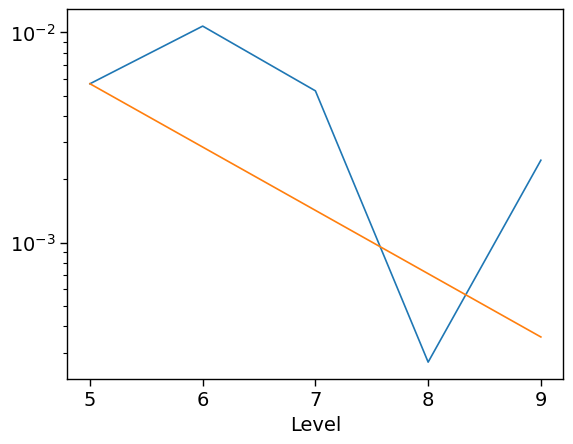

In [366]:
e=3
error=np.abs(np.mean(pars_1[:,:,e,:]-pars_0[:,:,e,:],axis=0))[:,par]
plt.plot(eLes,error,label="Error")
[b_0,b_1]= bdg.coef(eLes,np.log2(error))
print(b_0,b_1)
print(2**b_1)
plt.plot(eLes,error[0]*2**(eLes[0])/2**(eLes),label="$2^{-l}$")
plt.yscale("log")
plt.xlabel("Level")



Using the previous plot we loosely estimate $C=0.58$, where bias=$C\Delta_l$.

In [367]:
samples=100
SGD_steps=2**10
K=0
v="GSbVan10_ePes_i"
l0=5
Lmax=5
eLes=np.array(range(l0,Lmax+1))
labels=np.array(["1", "2", "3" ,"4","5","6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])

parss=np.reshape(\
    np.loadtxt(path+"data26/Prl_Gen_SGD_bridge_pars_v"+v+labels[0]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast+1,4)) 
for i in range(len(labels[1:])):
    parss=np.concatenate((parss,np.reshape(\
    np.loadtxt(path+"data26/Prl_Gen_SGD_bridge_pars_v"+v+labels[i+1]+".txt",dtype=float),(samples,len(eLes),SGD_steps+ast+1,4)) ),axis=0)  

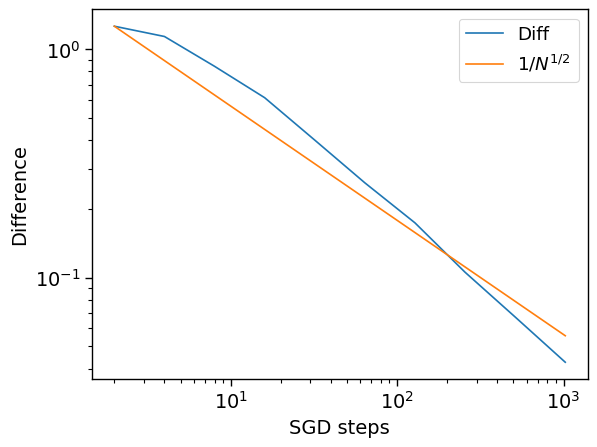

In [368]:
eNes=2**(np.array(range(0,int(np.log2(SGD_steps)+1))))
par=3
par_eNes=np.mean(parss[:,0,eNes,:],axis=0)
diffs=np.abs(par_eNes[1:,par]-par_eNes[:-1,par])
plt.plot(eNes[1:],diffs,label="Diff")
plt.plot(eNes[1:],diffs[0]*np.sqrt((eNes[1]))/np.sqrt((eNes[1:])),label="$1/N^{1/2}$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SGD steps")
plt.ylabel("Difference")
plt.legend()

The rate is:  1.2654762254415455 2.4040655364754935


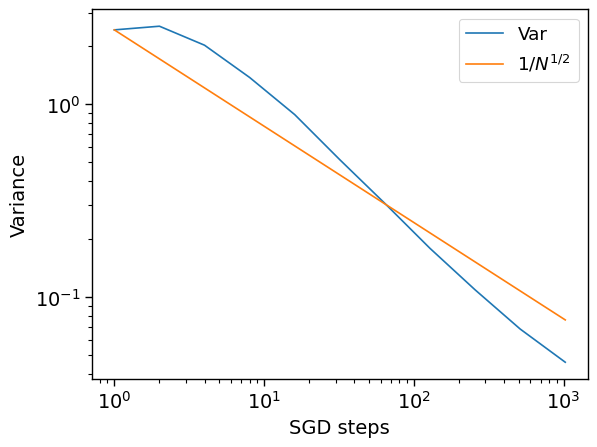

In [369]:
var_eNes=np.var(parss[:,0,eNes,:],axis=0)
par=3
plt.plot(eNes,var_eNes[:,par],label="Var")
plt.plot(eNes,var_eNes[0,par]*np.sqrt(eNes[0])/np.sqrt(eNes),label="$1/N^{1/2}$")
[b_0,b_1]=bdg.coef(np.log2(1/np.sqrt(eNes[:])),np.log2(var_eNes[:,par]))
print("The rate is: ",b_1,2**(b_1))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SGD steps")
plt.ylabel("Variance")
plt.legend()

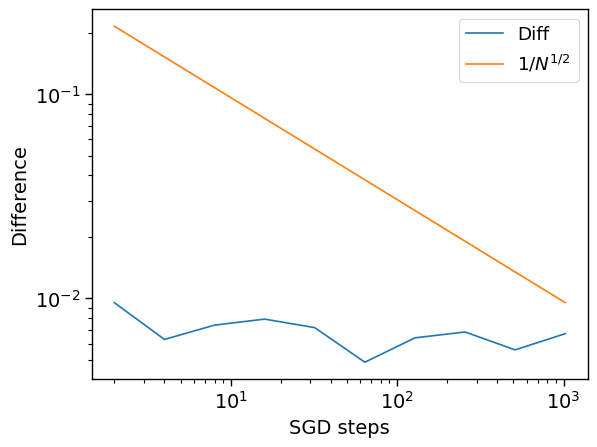

In [370]:
eNes=2**(np.array(range(0,int(np.log2(SGD_steps)+1))))
par=0
par_eNes=np.mean(parss[:,0,eNes,:],axis=0)
diffs=np.abs(par_eNes[1:,par]-par_eNes[:-1,par])
plt.plot(eNes[1:],diffs,label="Diff")
plt.plot(eNes[1:],diffs[0]*np.sqrt((eNes[-1]))/np.sqrt((eNes[1:])),label="$1/N^{1/2}$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SGD steps")
plt.ylabel("Difference")
plt.legend()

The rate is:  0.33095880119129995 1.257849051131431


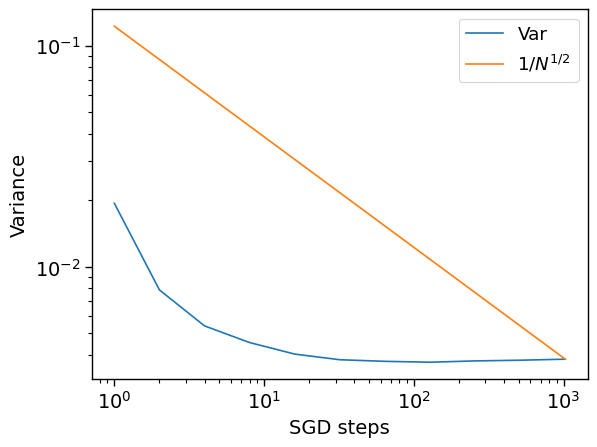

In [371]:
var_eNes=np.var(parss[:,0,eNes,:],axis=0)
par=0
plt.plot(eNes,var_eNes[:,par],label="Var")
plt.plot(eNes,var_eNes[-1,par]*np.sqrt(eNes[-1])/np.sqrt(eNes),label="$1/N^{1/2}$")
[b_0,b_1]=bdg.coef(np.log2(1/np.sqrt(eNes[:])),np.log2(var_eNes[:,par]))
print("The rate is: ",b_1,2**(b_1))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SGD steps")
plt.ylabel("Variance")
plt.legend()

Now we compute the single level estimator for different levels of discretization considering an equilibrium between the time discretization bias and the error of the SA.

In [376]:
ids_van=[40538093,40538165, 40538213,  40538261]

✓ Extracted 4 values → parallel_times.csv
⚠ Skipped 0 files (see 'missing' list)
The last computation time in hours is:  146.1890907737944


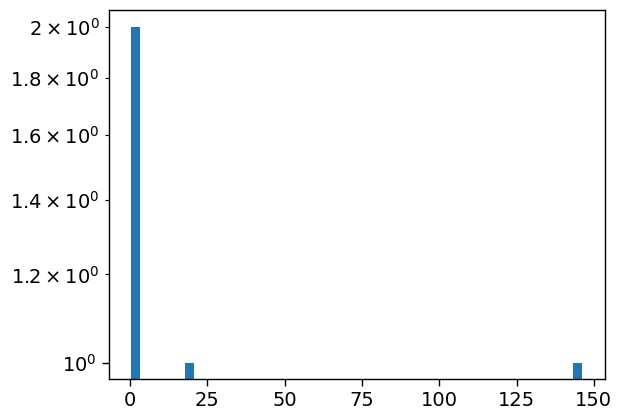

In [385]:
from pathlib import Path
import re
import csv

# ---------------------------------------------------------------------
# customise these
                        # files per ID (1..30)
root="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/displays/"
root = Path(root)    # local parent directory
outfile = Path("parallel_times.csv")        # CSV output
# ---------------------------------------------------------------------

pat = re.compile(r"Parallelized processes time:\s*([-+]?\d+(?:\.\d+)?)")

results, missing = [], []

for job_id in ids_van:
    
        f = root / f"test.{job_id}.out"
        if not f.exists():
            missing.append((f, "file not found"))
            continue

        try:
            lines = f.read_text(errors="ignore").splitlines()
            # guard against empty files
            for line in reversed(lines):
                m = pat.search(line)
                if m:
                    results.append((f.name, float(m.group(1))))
                    break
            else:
                missing.append((f, "phrase not found"))
        except Exception as e:
            missing.append((f, f"read error: {e}"))

# -------- write CSV ---------------------------------------------------
with outfile.open("w", newline="") as csvf:
    csv.writer(csvf).writerows([["file", "parallel_time"], *results])

print(f"✓ Extracted {len(results)} values → {outfile}")
print(f"⚠ Skipped {len(missing)} files (see 'missing' list)")

# optional: inspect a few problems
for f, reason in missing[:10]:
    print(f"  {f}  [{reason}]")
if len(missing) > 10:
    print("  …")
computation_times_van=np.array(results)[:,1]
computation_times_van = np.asarray(computation_times_van, dtype=float)
ct_hours_van= computation_times_van / 3600
print("The last computation time in hours is: ",ct_hours_van[-1])

plt.hist(ct_hours_van, bins=50)
plt.yscale("log")


Single estimators 

In [387]:
eLes=[0]
v="GSbVan12_i"
folder="data27"
path="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/Observationsdata/"

pars_file_van=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_SGD_bridge_pars_v"+v+".txt",dtype=float),\
    (samples,len(eLes),4)) 


v="GSbVan12_ii"

pars_file_van=np.concatenate((pars_file_van,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_SGD_bridge_pars_v"+v+".txt",dtype=float),\
    (samples,len(eLes),4))),axis=1) 

v="GSbVan12_iii"

pars_file_van=np.concatenate((pars_file_van,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_SGD_bridge_pars_v"+v+".txt",dtype=float),\
    (samples,len(eLes),4))),axis=1) 

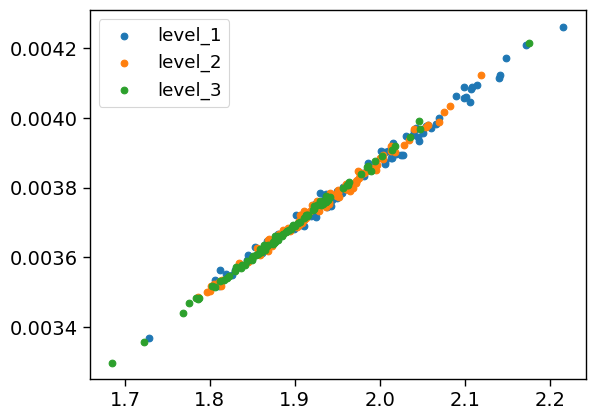

In [388]:
ele=-1
par1=0
par2=1
for i in range(pars_file_van.shape[1]):
    plt.scatter(pars_file_van[:,i,par1],pars_file_van[:,i,par2],label="level_"+str(i+1))
plt.legend()

Finally the estimation of the MSE depending on the levels

In [401]:

l0=3
Lmax=5
eLes=np.array(range(l0,Lmax+1))
labels=np.array(["\theta_1", "\theta_2", "\theta_3", "\theta_4"])
par=0


pars_true=[1.82678073e+00, 3.55565000e-03, 7.57901675e-01 ,1.93363930e+01]
MSEs=np.mean((pars_file_van-pars_true)**2,axis=0)
var=np.var(pars_file_van,axis=0)
bias=np.abs( np.mean(pars_file_van,axis=0)-pars_true)
#print("The mean is: ",np.mean(pars_file_van,axis=0))
print("The MSEs are: ",MSEs[-1,:])
print("The mses sum is: ",np.sum(MSEs[-1,:]))


The MSEs are:  [9.60942751e-03 3.44447355e-08 5.80245736e-04 1.90965643e-02]
The mses sum is:  0.029286271978879376


In the following we recompute the unbiased estimator and estimate its MSE, additionally we load the time of computation of the unbiased estimators

In [403]:

v="GU8_ip_i"
folder="data25"
labels=np.array(["1", "2", "3" ,"4","5","6", "7", "8", "9", "10", \
"11", "12", "13", "14", "15","16","17", "18", "19", "20"\
    ,"21", "22", "23", "24", "25", "26", "27", "28", "29","30"])
pars_file=np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[0]+".txt",dtype=float),(samples,2,2,4)) 
levels_file=np.reshape(np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[0]+".txt",dtype=float),(samples,2))
#filename=f"Observationsdata/displays/test.{ids[0]}.{1}.out"
#times=np.array([np.loadtxt(filename, usecols=3)])
for i in range(len(labels[1:])):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i+1]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i+1]+".txt",dtype=float),(samples,2))),axis=0)  

v="GU8_ip_ii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0)  

v="GU8_ip_iii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_iv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_v"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_vi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 
v="GU8_ip_vii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_viii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_ix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_x"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xvix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 



v="GU8_ip_xxi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxvi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 




v="GU8_ip_xxix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxiii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxiv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxv"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 


v="GU8_ip_xxxvi"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxvii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxviii"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxix"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

v="GU8_ip_xxxx"

for i in range(len(labels)):
    #times=np.concatenate((times,np.array([np.loadtxt(\
    #"Observationsdata/displays/test."+ids[0]+"."+labels[i+1]+".out", usecols=3)])),axis=0)
    pars_file=np.concatenate((pars_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_pars_v"+v+labels[i]+".txt",dtype=float),(samples,2,2,4)) ),axis=0)  
    levels_file=np.concatenate((levels_file,np.reshape(\
    np.loadtxt(path+folder+"/Prl_Gen_Unbiased_levels_v"+v+labels[i]+".txt",dtype=float),(samples,2))),axis=0) 

levels_file=levels_file.astype(int)
print(pars_file.shape)

(117000, 2, 2, 4)


In [404]:
levels_file

array([[5, 1],
       [5, 1],
       [4, 0],
       ...,
       [7, 4],
       [7, 0],
       [5, 1]])

In the following we compute the probabilities of the levels, these are necessary for the comptuation of the single unbiased estimators.

In [405]:
if True:
    samples=100
    N=50
    mcmc_links=1
    #SGD_steps=10000
    #B=SGD_steps*mcmc_links
    gamma=0.005
    gammas=[2,3,0.6,6]
    alpha=0.5
    ast=2
    K=2*(2**ast-1)  
    CL=1.5e-7
    CL0=3e-8
    CP=3e-8
    CP0=3.28e-8
    s0=2**0
    
    l0=3
    lmax=8

    pmax=lmax+3
    beta_l=1/2
    beta_p=1
    #arg_cm=int(sys.argv[1])
    #arg_cm=32
    d=1
    T=len(obs_times)*d
eLes=np.arange(l0,lmax+1)
beta=beta_l
q=4
P0=(1+CL*np.sum((q+eLes[1:]-l0)*np.log(q+eLes[1:]-l0)**2/2**(beta*eLes[1:]))/\
(CL0*(q+1)*np.log(q+1)**2))**(-1)

l_cumu=bdg.P_l_cumu_gen(P0,lmax-l0+1,beta,l0)
l=eLes[bdg.sampling(l_cumu)]
l_den=np.zeros(len(eLes))
l_den[0]=P0
l_den[1:]=l_cumu[1:]-l_cumu[:-1]

# cumulative for the number of SGD steps
beta=beta_p
ePes=np.arange(0,pmax+1)
eSes=s0*2**ePes
P0=(1+CP*np.sum((ePes[1:]+q)*np.log(ePes[1:]+q)**2/eSes[1:]**(beta))\
/(CP0*(q+1)*np.log(1+q)**2))**(-1)

p_cumu=bdg.P_p_cumu_gen(P0,pmax,beta,s0)
p_den=np.zeros(len(ePes))
p_den[0]=P0
p_den[1:]=p_cumu[1:]-p_cumu[:-1]
print("The levels are: ",eSes,eLes )
print("The density of l is:",l_den)
print("The density of p is:",p_den)

The levels are:  [   1    2    4    8   16   32   64  128  256  512 1024 2048] [3 4 5 6 7 8]
The density of l is: [0.14139322 0.17674152 0.18587279 0.18085634 0.16690086 0.14823527]
The density of p is: [0.41388935 0.18927867 0.14075502 0.09684269 0.06319412 0.03968758
 0.02421389 0.01444296 0.00846008 0.00488252 0.00278316 0.00156996]


In the following we load the computational times of the unbiased estimators

✓ Extracted 1170 values → parallel_times.csv
⚠ Skipped 0 files (see 'missing' list)
[ 5534.76784849  2598.95993137  9419.53967118 ... 10645.57535291
 10428.67380047  4134.65036106]
Maximum time of computation:  25.556317164235644


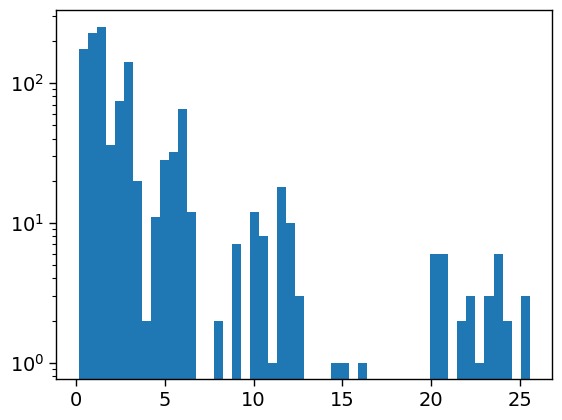

In [416]:
from pathlib import Path
import re
import csv
ids=[40320129,40320173,40346075,40346114,40377126,40377128,40377139,40424523, 40424526, 40424528,\
     40424529, 40424530, 40424533,40452640,40452671,40452702, 40452706, 40452708,    40452711,\
        40537035, 40538369,  40538485, 40538486, 40538494, 40538496, 40538543, 40538548, 40538553,\
    40538557, 40538610,  40538613,  40538619,40538640, 40538642, 40538645, 40538650, 40538654,40538736,\
    40538742]
 # These are the ids of the processes that computed the 
# unbiased estimators

# ---------------------------------------------------------------------
# customise these
n_per_id = 30                               # files per ID (1..30)
path2="/Users/alvarem/Library/CloudStorage/GoogleDrive-miguelangel.alvarezballesteros@kaust.edu.sa/Other computers/My MacBook Pro/MEGA/0KAUST/0Bridge/"
root = Path(path2+"displays")    # local parent directory
outfile = Path("parallel_times.csv")        # CSV output
# ---------------------------------------------------------------------

pat = re.compile(r"Parallelized processes time:\s*([-+]?\d+(?:\.\d+)?)")

results, missing = [], []

for job_id in ids:
    for j in range(1, n_per_id + 1):
        f = root / f"test.{job_id}.{j}.out"
        if not f.exists():
            missing.append((f, "file not found"))
            continue

        try:
            lines = f.read_text(errors="ignore").splitlines()
            # guard against empty files
            for line in reversed(lines):
                m = pat.search(line)
                if m:
                    results.append((f.name, float(m.group(1))))
                    break
            else:
                missing.append((f, "phrase not found"))
        except Exception as e:
            missing.append((f, f"read error: {e}"))

# -------- write CSV ---------------------------------------------------
with outfile.open("w", newline="") as csvf:
    csv.writer(csvf).writerows([["file", "parallel_time"], *results])

print(f"✓ Extracted {len(results)} values → {outfile}")
print(f"⚠ Skipped {len(missing)} files (see 'missing' list)")

# optional: inspect a few problems
for f, reason in missing[:10]:
    print(f"  {f}  [{reason}]")
if len(missing) > 10:
    print("  …")
#
computation_times=np.array(results)[:,1]
computation_times = np.asarray(computation_times, dtype=float)
print(computation_times)
ct_hours= computation_times / 3600
plt.hist(ct_hours, bins=50)
plt.yscale("log")
print("Maximum time of computation: ", np.max(ct_hours))


In the following we display the number of computations of single unbiased estimators per levels. 

In [417]:
sample_levels_f=np.zeros((len(eLes),len(ePes)))
for i in range(levels_file.shape[0]):
    if (levels_file[i,0]-l0== 7 and levels_file[i,1]==11):# or\
        #(levels_file[i,0]-l0== 7 and levels_file[i,1]==8)or\
        #(levels_file[i,0]-l0== 6 and levels_file[i,1]==9):
        print("Found a sample with",levels_file[i,0]-l0,levels_file[i,1])
        print("The sample is: ",pars_file[i])
    sample_levels_f[levels_file[i,0]-l0,levels_file[i,1]]+=1
print("The sample levels frequencies are: ",sample_levels_f)


The sample levels frequencies are:  [[6854. 2992. 2365. 1639. 1049.  666.  405.  251.  140.   75.   43.   23.]
 [8675. 4038. 2911. 2084. 1326.  797.  492.  301.  177.  113.   55.   28.]
 [8803. 4206. 3019. 2102. 1424.  871.  519.  364.  202.  116.   79.   31.]
 [8663. 3844. 3028. 2003. 1325.  895.  479.  275.  199.  103.   72.   33.]
 [8130. 3788. 2799. 1836. 1243.  767.  497.  274.  177.  108.   58.   26.]
 [7137. 3231. 2328. 1728. 1037.  708.  420.  236.  149.   93.   41.   35.]]


In [420]:
print(pars_file.shape)
unb_terms=pars_file/(l_den[levels_file[:,0]-l0,np.newaxis,np.newaxis,np.newaxis]\
*p_den[levels_file[:,1],np.newaxis,np.newaxis,np.newaxis])
#unb_terms=unb_terms[-200:]
a=0
b=-1
est=np.mean(unb_terms[:,1,1]-unb_terms[:,1,0]-(unb_terms[:,0,1]-unb_terms[:,0,0]),axis=0)
print(est)
var_est=np.var(unb_terms[:,1,1]-unb_terms[:,1,0]-(unb_terms[:,0,1]-unb_terms[:,0,0]),axis=0)
print("variance estimator is:",var_est)
print(pars_file.shape[0])
print("Variance of the averaged unbiased estimator: ",var_est/((pars_file.shape[0])))
an_mean=[1.82678073e+00, 3.55565000e-03, 7.57901675e-01 ,1.93363930e+01]
bias=est-an_mean
var=var_est/(pars_file.shape[0])
mse=bias**2+var
print("The mse is: ",mse)   

(117000, 2, 2, 4)
[1.88232309e+00 3.68818684e-03 7.76121969e-01 1.92397813e+01]
variance estimator is: [6.98970966e+01 2.60046006e-04 1.19775541e+01 3.97957562e+03]
117000
Variance of the averaged unbiased estimator:  [5.97411082e-04 2.22261543e-09 1.02372257e-04 3.40134668e-02]
The mse is:  [3.68236523e-03 1.97886304e-08 4.34351363e-04 4.33472902e-02]


In [409]:
if True:
    seed=125
    np.random.seed(seed)
    print("The seed is: ",seed)
    an_mean=[1.82678073e+00, 3.55565000e-03, 7.57901675e-01 ,1.93363930e+01]
    samples_total=pars_file.shape[0]   
    print(np.log2(samples_total/10))
    #print(np.log2(samples_total))
    z=11
    batches=14*4
    ests=np.zeros((batches,4))
    costs=np.zeros(batches)
    times=np.zeros(batches)
    m_times=np.zeros((z-1))
    v_times=np.zeros((z-1))
    m_costss=np.zeros((z -1))
    mses=np.zeros((z -1,4))
    biases=np.zeros((z -1,4))
    vars=np.zeros((z -1,4))
    for i in range(1,z):
        batch_samples=np.random.choice(samples_total,(2**(i+1),batches),replace=False)
        costs=np.sum(2**(levels_file[batch_samples,0]+levels_file[batch_samples,1]),axis=0)        
        ests=np.mean(unb_terms[batch_samples,1,1]-unb_terms[batch_samples,1,0]-(unb_terms[batch_samples,0,1]-unb_terms[batch_samples,0,0]),axis=0)
        
        #print("The
        """for j in range(batches):
            batch_samples=np.random.choice(samples_total,2**(i+1),replace=False)
            costs[j]=np.sum(2**(levels_file[batch_samples,0]+levels_file[batch_samples,1]))        
            ests[j]=np.mean(unb_terms[batch_samples,1,1]-unb_terms[batch_samples,1,0]-(unb_terms[batch_samples,0,1]-unb_terms[batch_samples,0,0]),axis=0)
            #print("The times are: ",ct_hours[batch_samples//samples])
            #times[j]=np.max(ct_hours[batch_samples//samples])
        #m_times[i-1]= np.mean(times)
        #v_times[i-1]= np.var(times)"""
        m_costss[i-1]=np.mean(costs)
        mses[i-1]=np.mean((ests-an_mean)**2,axis=0)
        biases[i-1]=np.mean(ests,axis=0)-an_mean
        vars[i-1]=np.var(ests,axis=0)

The seed is:  125
13.51422090935813


11.393776934717367 -1.0753335235972745


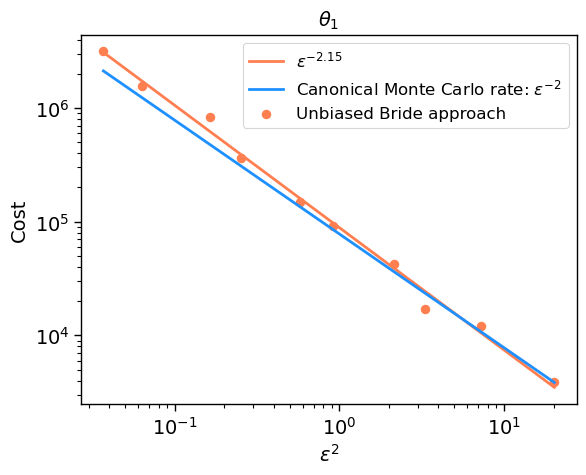

In [338]:
if True:
    par_n=0
    [b_0,b_1]= bdg.coef(np.log(mses[:,par_n]),np.log(m_costss))
    print(b_0,b_1)  
    #print(b_0,b_1)
    #print(mses[:,par_n])
    #plt.plot(biases[:,par_n]**2,m_costss,label="Unbiased Bride approach",ls='--',lw=2,marker='o',markersize=5)
    #plt.plot(vars[:,par_n],m_costss,label="vars",ls='--',lw=2,marker='o',markersize=5)
    plt.plot(mses[:,par_n],np.exp(b_0)*mses[:,par_n]**b_1,lw=2,\
    label=rf'$\varepsilon^{{{2*b_1:.2f}}}$',color="coral")
    plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]/mses[:,par_n],lw=2,\
    label="Canonical Monte Carlo rate: "+rf'$\varepsilon^{{-2}}$',color="dodgerblue")    
    #plt.plot(mses[:,par_n],m_costss[0]*mses[0,par_n]**(3/2)/mses[:,par_n]**(3/2),\
    #lw=2,label=rf'$\varepsilon^{{-3}}$',color="deepskyblue")
    plt.scatter(mses[:,par_n],m_costss,label="Unbiased Bride approach",lw=2,marker='o',color="coral")
    plt.xlabel(r"$\varepsilon^2$",size=14)
    plt.ylabel("Cost",size=14)
    plt.tick_params(axis="both",   # "x", "y", or "both"
                    labelsize=14)
    plt.yscale("log")
    plt.xscale("log")
    plt.legend(fontsize=12)
    var_labs= [r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"]
    plt.title(var_labs[par_n],size=14)
    #plt.savefig("Logistic_Cost_vs_MSE_theta4.pdf")
    plt.show()